In [7]:
import os
import pandas as pd
import numpy as np
import random
from numpy import array
from typing import Tuple
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
## Loading MD data --------------------------------------------------------------------

#Read name to gene
def name2gene(name):
    genename=name.split(',')
    gene = [int(i) for i in genename]
    gene.pop(0)
    return gene    
    
# Load in Data --------------------------------------
data_folders = ['E:/BuehlerLab/superhoneycomb/datafiles_0803/','E:/BuehlerLab/superhoneycomb/datafiles_0817/','E:/BuehlerLab/superhoneycomb/datafiles_0817b/']
genes = []
stresses = []

for data_location in data_folders:
    subfolders = [f.name for f in os.scandir(data_location) if f.is_dir() and f.name != 'model']
    for f in subfolders: #for folder in MD
        df = pd.read_csv(data_location+f+'/ss.dat', sep=" ")
        stressestemp = list(df.loc[:,'stresstot'])     #extract stress log from datafile
        if len(stressestemp) >= 40:
            stresses.append(stressestemp[:40])  #put stress in dataframe
            genes.append(name2gene(f))     #put folder name as new dataframe entry

genes_stresses = pd.DataFrame(list(zip(genes, stresses)), columns =['genes', 'stresses'])
print(genes_stresses)

                                       genes  \
0       [10, 10, 8, 3, 13, 13, 14, 7, 3, 10]   
1          [10, 15, 6, 6, 7, 8, 8, 4, 2, 15]   
2        [10, 3, 15, 11, 2, 9, 13, 8, 2, 13]   
3       [10, 4, 10, 3, 14, 2, 14, 11, 14, 4]   
4         [10, 6, 12, 5, 5, 6, 3, 10, 14, 8]   
...                                      ...   
1440     [9, 15, 10, 9, 9, 13, 10, 11, 9, 0]   
1441  [9, 15, 11, 11, 11, 14, 14, 15, 10, 0]   
1442  [9, 15, 13, 11, 12, 11, 12, 13, 12, 0]   
1443    [9, 15, 14, 14, 9, 10, 12, 9, 11, 0]   
1444      [9, 9, 9, 15, 13, 9, 14, 14, 9, 0]   

                                               stresses  
0     [-7.1850525033075e-05, 0.0549642980977509, 0.0...  
1     [0.0002366108955228, 0.0600615730445836, 0.094...  
2     [-0.00034059152781, 0.0356566047983451, 0.0576...  
3     [0.0011265488161814, 0.0408652524957321, 0.075...  
4     [-6.7327319878842e-05, 0.0765737304987789, 0.0...  
...                                                 ...  
1440  [-0.0002055

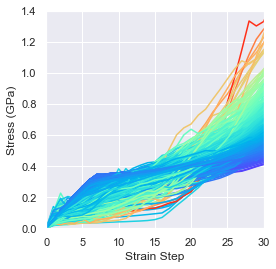

In [39]:
#Visualize Stress Strain Curves
import seaborn as sns
sns.set_theme(color_codes=True)

f, ax = plt.subplots()
ax.set_box_aspect(1)
plt.axis(xmin=0, xmax=30)
plt.axis(ymin=0, ymax=1.4)
plt.xlabel('Strain Step', fontsize=12)
plt.ylabel('Stress (GPa)', fontsize=12)
colors = plt.cm.rainbow(np.linspace(0, 1, 1100))

for i in range(len(genes_stresses.loc[:,'stresses'])):
    scale = np.int(np.max(genes_stresses.loc[:,'stresses'][i][:30])*1000-300)
    plt.plot(genes_stresses.loc[:,'stresses'][i], color=colors[scale])


,genes,stresses,pos_stresses
0,"[10, 10, 8, 3, 13, 13, 14, 7, 3, 10]","[-7.1850525033075e-05, 0.0549642980977509, 0.0...","[0, 0.0549642980977509, 0.06514270796857, 0.07..."
1,"[10, 15, 6, 6, 7, 8, 8, 4, 2, 15]","[0.0002366108955228, 0.0600615730445836, 0.094...","[0.0002366108955228, 0.0600615730445836, 0.094..."
2,"[10, 3, 15, 11, 2, 9, 13, 8, 2, 13]","[-0.00034059152781, 0.0356566047983451, 0.0576...","[0, 0.0356566047983451, 0.0576399738281383, 0...."
3,"[10, 4, 10, 3, 14, 2, 14, 11, 14, 4]","[0.0011265488161814, 0.0408652524957321, 0.075...","[0.0011265488161814, 0.0408652524957321, 0.075..."
4,"[10, 6, 12, 5, 5, 6, 3, 10, 14, 8]","[-6.7327319878842e-05, 0.0765737304987789, 0.0...","[0, 0.0765737304987789, 0.0849777066410047, 0...."
...,...,...,...
1440,"[9, 15, 10, 9, 9, 13, 10, 11, 9, 0]","[-0.000205551283419, 0.0571718507377183, 0.111...","[0, 0.0571718507377183, 0.111983023082937, 0.1..."
1441,"[9, 15, 11, 11, 11, 14, 14, 15, 10, 0]","[0.0001033313720726, 0.055264792229467, 0.1089...","[0.0001033313720726, 0.055264792229467, 0.1089..."
1442,"[9, 15, 13, 11, 12, 11, 12, 13, 12, 0]","[0.0005940116967141, 0.0536387929355757, 0.108...","[0.0005940116967141, 0.0536387929355757, 0.108..."
1443,"[9, 15, 14, 14, 9, 10, 12, 9, 11, 0]","[0.0006604287414922, 0.0514220271987031, 0.102...","[0.0006604287414922, 0.0514220271987031, 0.102..."


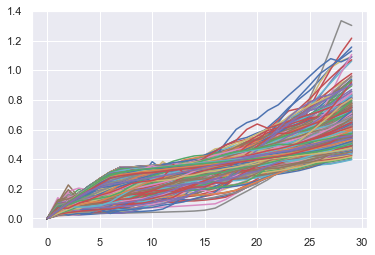

In [40]:
#Strip away negative values
genes_positive = []
for i in genes_stresses.loc[:,'stresses']:
    genes_temp = []
    for j in range(30):
        try:
            if i[j]>0:
                genes_temp.append(i[j])
            else:
                genes_temp.append(0)
        except:
            genes_temp.append(0)
    genes_positive.append(genes_temp)
genes_stresses['pos_stresses']=genes_positive

for i in range(len(genes_stresses.loc[:,'pos_stresses'])):
    plt.plot(genes_stresses.loc[:,'pos_stresses'][i])

genes_stresses

In [43]:
genes_positive = pd.DataFrame()
genes_positive['genes']=genes_stresses['genes']
genes_positive['stresses']=genes_stresses['pos_stresses']

# Data Slicing - State to Stress (with timestep) -------------------------------------------------
pred_lengt = 4
random.seed(1234)
init_state = []
proj_stres = []
for i in range(len(genes_positive.loc[:,'stresses'])):
    for index in range(len(genes_positive.loc[0][1])-pred_lengt-2):
        init_temp = genes_positive.loc[i][0] + [genes_positive.loc[i][1][index]] + [genes_positive.loc[i][1][index+1]] + [index] #+ [index+1]
        proj_temp = genes_positive.loc[i][1][index+2:index+2+pred_lengt] #+list(range(index+2,index+2+pred_lengt))   
        init_state.append(init_temp)
        proj_stres.append(proj_temp)
print(len(init_state))
print(len(proj_stres))
augmented_data = pd.DataFrame(list(zip(init_state, proj_stres)), columns =['init', 'proj'])
augmented_data.to_csv('shc_0817_sliced.csv')

#Split into training and test sets
x_train, x_valid, y_train, y_valid = train_test_split(init_state, proj_stres, test_size=0.25, random_state=1)


34680
34680


In [44]:
## Creating LSTM Model -------------------------------------------------------

from numpy import array, hstack
from tensorflow import Tensor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, TimeDistributed, Conv1D, MaxPooling1D, Dropout, Dense, Flatten, Reshape, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers, losses, metrics
os.environ['KERAS_BACKEND']='tensorflow'

# Parameters for training ML model -------------------------------------------------------------------------
batch_size = 32
epochs = 10000
pat = 100
loss= losses.MeanSquaredError()
opt = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay = 0.001)

# Defining ML model -------------------------------------------------------------------------
model = Sequential()
model.add(Dense(len(init_state[0]), activation = 'sigmoid', input_shape=(len(init_state[0]),)))
model.add(Dense(100, activation = 'sigmoid'))
model.add(Reshape((25,4)))
model.add(Conv1D(kernel_size = 3, strides = 1, filters = 4, padding = "same"))
model.add(BatchNormalization())
model.add(Conv1D(kernel_size = 3, strides = 1, filters = 16, padding = "same"))
model.add(BatchNormalization())
model.add(Conv1D(kernel_size = 3, strides = 1, filters = 64, padding = "same"))
model.add(BatchNormalization())
model.add(Conv1D(kernel_size = 3, strides = 1, filters = 128, padding = "same"))
model.add(BatchNormalization())
model.add(Conv1D(kernel_size = 3, strides = 1, filters = 64, padding = "same"))
model.add(BatchNormalization())
model.add(Conv1D(kernel_size = 3, strides = 1, filters = 16, padding = "same"))
model.add(BatchNormalization())
model.add(Conv1D(kernel_size = 3, strides = 1, filters = 4, padding = "same"))
model.add(BatchNormalization())
model.add(LSTM(512))
model.add(Dense(pred_lengt, activation = 'linear')) 

model.compile(optimizer=opt, loss=loss, metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1400      
_________________________________________________________________
reshape (Reshape)            (None, 25, 4)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 25, 4)             52        
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 4)             16        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 16)            208       
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 16)            6

In [68]:
%%time

# Model Training -------------------------------------------------------------------------

from time import strftime
stamp = strftime("%m_%d_%H_%M")#+'_'+data_location # stamp of a model for saving and reloading
print('stamp:', stamp) # month_day_hour_minute
if not os.path.exists('model/'+stamp):
    os.mkdir('model/'+stamp)

x_train_arr = np.asarray(x_train)    
y_train_arr = np.asarray(y_train)  

print(x_train_arr.shape, y_train_arr.shape)

validation_split=0.25
if validation_split !=0:
    target = 'val_'
else:
    target = ''

chkp = ModelCheckpoint('model/'+stamp+'/Model.h5', monitor=target+'loss', verbose=1, save_best_only=True)
es_l = EarlyStopping(monitor=target+'loss', patience=pat, verbose=0, restore_best_weights=True)

print('\n', flush=True)

history = model.fit(x_train_arr, y_train_arr, validation_split=validation_split
        , epochs = epochs, verbose=2, callbacks=[chkp, es_l]
        , batch_size = batch_size
         )
print('training has finished')

stamp: 10_12_17_27
(26010, 13) (26010, 4)


Epoch 1/10000

Epoch 00001: val_loss improved from inf to 0.00516, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0081 - acc: 0.8802 - val_loss: 0.0052 - val_acc: 0.9588
Epoch 2/10000

Epoch 00002: val_loss improved from 0.00516 to 0.00480, saving model to model/10_12_17_27\Model.h5
610/610 - 5s - loss: 0.0047 - acc: 0.9645 - val_loss: 0.0048 - val_acc: 0.9631
Epoch 3/10000

Epoch 00003: val_loss improved from 0.00480 to 0.00423, saving model to model/10_12_17_27\Model.h5
610/610 - 5s - loss: 0.0041 - acc: 0.9670 - val_loss: 0.0042 - val_acc: 0.9631
Epoch 4/10000

Epoch 00004: val_loss improved from 0.00423 to 0.00389, saving model to model/10_12_17_27\Model.h5
610/610 - 5s - loss: 0.0038 - acc: 0.9676 - val_loss: 0.0039 - val_acc: 0.9631
Epoch 5/10000

Epoch 00005: val_loss improved from 0.00389 to 0.00345, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0036 - acc: 0.9678 - val_loss: 0.0035 - val_acc: 0.

Epoch 47/10000

Epoch 00047: val_loss improved from 0.00193 to 0.00191, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0021 - acc: 0.9678 - val_loss: 0.0019 - val_acc: 0.9631
Epoch 48/10000

Epoch 00048: val_loss did not improve from 0.00191
610/610 - 6s - loss: 0.0020 - acc: 0.9674 - val_loss: 0.0020 - val_acc: 0.9631
Epoch 49/10000

Epoch 00049: val_loss improved from 0.00191 to 0.00188, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0021 - acc: 0.9677 - val_loss: 0.0019 - val_acc: 0.9631
Epoch 50/10000

Epoch 00050: val_loss did not improve from 0.00188
610/610 - 6s - loss: 0.0021 - acc: 0.9675 - val_loss: 0.0019 - val_acc: 0.9631
Epoch 51/10000

Epoch 00051: val_loss improved from 0.00188 to 0.00186, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0020 - acc: 0.9676 - val_loss: 0.0019 - val_acc: 0.9631
Epoch 52/10000

Epoch 00052: val_loss did not improve from 0.00186
610/610 - 6s - loss: 0.0020 - acc: 0.9672 - val_loss: 0.001

Epoch 93/10000

Epoch 00093: val_loss improved from 0.00159 to 0.00159, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 0.0018 - acc: 0.9678 - val_loss: 0.0016 - val_acc: 0.9631
Epoch 94/10000

Epoch 00094: val_loss did not improve from 0.00159
610/610 - 7s - loss: 0.0017 - acc: 0.9674 - val_loss: 0.0016 - val_acc: 0.9631
Epoch 95/10000

Epoch 00095: val_loss did not improve from 0.00159
610/610 - 6s - loss: 0.0018 - acc: 0.9675 - val_loss: 0.0016 - val_acc: 0.9631
Epoch 96/10000

Epoch 00096: val_loss improved from 0.00159 to 0.00158, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0018 - acc: 0.9676 - val_loss: 0.0016 - val_acc: 0.9631
Epoch 97/10000

Epoch 00097: val_loss improved from 0.00158 to 0.00157, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 0.0017 - acc: 0.9678 - val_loss: 0.0016 - val_acc: 0.9631
Epoch 98/10000

Epoch 00098: val_loss improved from 0.00157 to 0.00156, saving model to model/10_12_17_27\Model.h5
610/610 - 7

Epoch 139/10000

Epoch 00139: val_loss did not improve from 0.00143
610/610 - 6s - loss: 0.0016 - acc: 0.9677 - val_loss: 0.0014 - val_acc: 0.9631
Epoch 140/10000

Epoch 00140: val_loss improved from 0.00143 to 0.00143, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0016 - acc: 0.9677 - val_loss: 0.0014 - val_acc: 0.9631
Epoch 141/10000

Epoch 00141: val_loss improved from 0.00143 to 0.00142, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0016 - acc: 0.9677 - val_loss: 0.0014 - val_acc: 0.9631
Epoch 142/10000

Epoch 00142: val_loss did not improve from 0.00142
610/610 - 6s - loss: 0.0016 - acc: 0.9677 - val_loss: 0.0014 - val_acc: 0.9631
Epoch 143/10000

Epoch 00143: val_loss improved from 0.00142 to 0.00142, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0016 - acc: 0.9678 - val_loss: 0.0014 - val_acc: 0.9631
Epoch 144/10000

Epoch 00144: val_loss improved from 0.00142 to 0.00142, saving model to model/10_12_17_27\Model.h5
610/6

Epoch 186/10000

Epoch 00186: val_loss did not improve from 0.00134
610/610 - 6s - loss: 0.0015 - acc: 0.9674 - val_loss: 0.0013 - val_acc: 0.9631
Epoch 187/10000

Epoch 00187: val_loss did not improve from 0.00134
610/610 - 6s - loss: 0.0015 - acc: 0.9675 - val_loss: 0.0013 - val_acc: 0.9631
Epoch 188/10000

Epoch 00188: val_loss did not improve from 0.00134
610/610 - 7s - loss: 0.0015 - acc: 0.9678 - val_loss: 0.0013 - val_acc: 0.9631
Epoch 189/10000

Epoch 00189: val_loss improved from 0.00134 to 0.00133, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 0.0015 - acc: 0.9678 - val_loss: 0.0013 - val_acc: 0.9631
Epoch 190/10000

Epoch 00190: val_loss did not improve from 0.00133
610/610 - 7s - loss: 0.0015 - acc: 0.9678 - val_loss: 0.0013 - val_acc: 0.9631
Epoch 191/10000

Epoch 00191: val_loss improved from 0.00133 to 0.00133, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 0.0015 - acc: 0.9677 - val_loss: 0.0013 - val_acc: 0.9631
Epoch 192/10000

Epoch

Epoch 235/10000

Epoch 00235: val_loss did not improve from 0.00127
610/610 - 7s - loss: 0.0014 - acc: 0.9678 - val_loss: 0.0013 - val_acc: 0.9631
Epoch 236/10000

Epoch 00236: val_loss did not improve from 0.00127
610/610 - 7s - loss: 0.0014 - acc: 0.9676 - val_loss: 0.0013 - val_acc: 0.9631
Epoch 237/10000

Epoch 00237: val_loss did not improve from 0.00127
610/610 - 7s - loss: 0.0014 - acc: 0.9675 - val_loss: 0.0013 - val_acc: 0.9631
Epoch 238/10000

Epoch 00238: val_loss did not improve from 0.00127
610/610 - 6s - loss: 0.0014 - acc: 0.9673 - val_loss: 0.0013 - val_acc: 0.9631
Epoch 239/10000

Epoch 00239: val_loss improved from 0.00127 to 0.00126, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0014 - acc: 0.9676 - val_loss: 0.0013 - val_acc: 0.9629
Epoch 240/10000

Epoch 00240: val_loss did not improve from 0.00126
610/610 - 6s - loss: 0.0014 - acc: 0.9674 - val_loss: 0.0013 - val_acc: 0.9629
Epoch 241/10000

Epoch 00241: val_loss did not improve from 0.00126
61

Epoch 285/10000

Epoch 00285: val_loss improved from 0.00122 to 0.00122, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0014 - acc: 0.9676 - val_loss: 0.0012 - val_acc: 0.9629
Epoch 286/10000

Epoch 00286: val_loss did not improve from 0.00122
610/610 - 6s - loss: 0.0014 - acc: 0.9674 - val_loss: 0.0012 - val_acc: 0.9631
Epoch 287/10000

Epoch 00287: val_loss improved from 0.00122 to 0.00121, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0014 - acc: 0.9674 - val_loss: 0.0012 - val_acc: 0.9631
Epoch 288/10000

Epoch 00288: val_loss did not improve from 0.00121
610/610 - 6s - loss: 0.0014 - acc: 0.9676 - val_loss: 0.0012 - val_acc: 0.9631
Epoch 289/10000

Epoch 00289: val_loss improved from 0.00121 to 0.00121, saving model to model/10_12_17_27\Model.h5
610/610 - 8s - loss: 0.0014 - acc: 0.9673 - val_loss: 0.0012 - val_acc: 0.9631
Epoch 290/10000

Epoch 00290: val_loss did not improve from 0.00121
610/610 - 1718s - loss: 0.0014 - acc: 0.9675 - val_lo

Epoch 333/10000

Epoch 00333: val_loss did not improve from 0.00118
610/610 - 6s - loss: 0.0013 - acc: 0.9673 - val_loss: 0.0012 - val_acc: 0.9629
Epoch 334/10000

Epoch 00334: val_loss did not improve from 0.00118
610/610 - 6s - loss: 0.0013 - acc: 0.9673 - val_loss: 0.0012 - val_acc: 0.9629
Epoch 335/10000

Epoch 00335: val_loss did not improve from 0.00118
610/610 - 6s - loss: 0.0013 - acc: 0.9670 - val_loss: 0.0012 - val_acc: 0.9629
Epoch 336/10000

Epoch 00336: val_loss improved from 0.00118 to 0.00118, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0013 - acc: 0.9673 - val_loss: 0.0012 - val_acc: 0.9629
Epoch 337/10000

Epoch 00337: val_loss improved from 0.00118 to 0.00117, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0013 - acc: 0.9673 - val_loss: 0.0012 - val_acc: 0.9629
Epoch 338/10000

Epoch 00338: val_loss improved from 0.00117 to 0.00117, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0013 - acc: 0.9672 - val_loss:

Epoch 383/10000

Epoch 00383: val_loss improved from 0.00114 to 0.00114, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0013 - acc: 0.9668 - val_loss: 0.0011 - val_acc: 0.9629
Epoch 384/10000

Epoch 00384: val_loss improved from 0.00114 to 0.00114, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0013 - acc: 0.9671 - val_loss: 0.0011 - val_acc: 0.9629
Epoch 385/10000

Epoch 00385: val_loss did not improve from 0.00114
610/610 - 6s - loss: 0.0013 - acc: 0.9668 - val_loss: 0.0011 - val_acc: 0.9629
Epoch 386/10000

Epoch 00386: val_loss improved from 0.00114 to 0.00114, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0013 - acc: 0.9668 - val_loss: 0.0011 - val_acc: 0.9629
Epoch 387/10000

Epoch 00387: val_loss did not improve from 0.00114
610/610 - 6s - loss: 0.0013 - acc: 0.9669 - val_loss: 0.0011 - val_acc: 0.9629
Epoch 388/10000

Epoch 00388: val_loss improved from 0.00114 to 0.00114, saving model to model/10_12_17_27\Model.h5
610/6

Epoch 433/10000

Epoch 00433: val_loss did not improve from 0.00112
610/610 - 6s - loss: 0.0012 - acc: 0.9671 - val_loss: 0.0011 - val_acc: 0.9628
Epoch 434/10000

Epoch 00434: val_loss did not improve from 0.00112
610/610 - 6s - loss: 0.0012 - acc: 0.9672 - val_loss: 0.0011 - val_acc: 0.9628
Epoch 435/10000

Epoch 00435: val_loss improved from 0.00112 to 0.00111, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0013 - acc: 0.9664 - val_loss: 0.0011 - val_acc: 0.9628
Epoch 436/10000

Epoch 00436: val_loss improved from 0.00111 to 0.00111, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0013 - acc: 0.9668 - val_loss: 0.0011 - val_acc: 0.9628
Epoch 437/10000

Epoch 00437: val_loss did not improve from 0.00111
610/610 - 6s - loss: 0.0013 - acc: 0.9668 - val_loss: 0.0011 - val_acc: 0.9628
Epoch 438/10000

Epoch 00438: val_loss improved from 0.00111 to 0.00111, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0013 - acc: 0.9669 - val_loss:

Epoch 482/10000

Epoch 00482: val_loss did not improve from 0.00109
610/610 - 6s - loss: 0.0012 - acc: 0.9663 - val_loss: 0.0011 - val_acc: 0.9625
Epoch 483/10000

Epoch 00483: val_loss did not improve from 0.00109
610/610 - 6s - loss: 0.0012 - acc: 0.9665 - val_loss: 0.0011 - val_acc: 0.9628
Epoch 484/10000

Epoch 00484: val_loss improved from 0.00109 to 0.00109, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0012 - acc: 0.9664 - val_loss: 0.0011 - val_acc: 0.9628
Epoch 485/10000

Epoch 00485: val_loss improved from 0.00109 to 0.00109, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0012 - acc: 0.9666 - val_loss: 0.0011 - val_acc: 0.9625
Epoch 486/10000

Epoch 00486: val_loss did not improve from 0.00109
610/610 - 6s - loss: 0.0012 - acc: 0.9667 - val_loss: 0.0011 - val_acc: 0.9628
Epoch 487/10000

Epoch 00487: val_loss did not improve from 0.00109
610/610 - 6s - loss: 0.0012 - acc: 0.9662 - val_loss: 0.0011 - val_acc: 0.9628
Epoch 488/10000

Epoch

Epoch 533/10000

Epoch 00533: val_loss did not improve from 0.00107
610/610 - 6s - loss: 0.0012 - acc: 0.9661 - val_loss: 0.0011 - val_acc: 0.9622
Epoch 534/10000

Epoch 00534: val_loss improved from 0.00107 to 0.00107, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0012 - acc: 0.9660 - val_loss: 0.0011 - val_acc: 0.9620
Epoch 535/10000

Epoch 00535: val_loss did not improve from 0.00107
610/610 - 6s - loss: 0.0012 - acc: 0.9666 - val_loss: 0.0011 - val_acc: 0.9622
Epoch 536/10000

Epoch 00536: val_loss improved from 0.00107 to 0.00107, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0012 - acc: 0.9660 - val_loss: 0.0011 - val_acc: 0.9622
Epoch 537/10000

Epoch 00537: val_loss improved from 0.00107 to 0.00107, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0012 - acc: 0.9662 - val_loss: 0.0011 - val_acc: 0.9622
Epoch 538/10000

Epoch 00538: val_loss did not improve from 0.00107
610/610 - 6s - loss: 0.0012 - acc: 0.9665 - val_loss:

Epoch 583/10000

Epoch 00583: val_loss did not improve from 0.00105
610/610 - 6s - loss: 0.0012 - acc: 0.9663 - val_loss: 0.0011 - val_acc: 0.9622
Epoch 584/10000

Epoch 00584: val_loss did not improve from 0.00105
610/610 - 6s - loss: 0.0012 - acc: 0.9658 - val_loss: 0.0011 - val_acc: 0.9620
Epoch 585/10000

Epoch 00585: val_loss did not improve from 0.00105
610/610 - 6s - loss: 0.0012 - acc: 0.9659 - val_loss: 0.0011 - val_acc: 0.9622
Epoch 586/10000

Epoch 00586: val_loss improved from 0.00105 to 0.00105, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0012 - acc: 0.9659 - val_loss: 0.0010 - val_acc: 0.9619
Epoch 587/10000

Epoch 00587: val_loss improved from 0.00105 to 0.00105, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0012 - acc: 0.9661 - val_loss: 0.0010 - val_acc: 0.9619
Epoch 588/10000

Epoch 00588: val_loss did not improve from 0.00105
610/610 - 6s - loss: 0.0012 - acc: 0.9660 - val_loss: 0.0011 - val_acc: 0.9620
Epoch 589/10000

Epoch

Epoch 634/10000

Epoch 00634: val_loss did not improve from 0.00103
610/610 - 6s - loss: 0.0011 - acc: 0.9656 - val_loss: 0.0010 - val_acc: 0.9617
Epoch 635/10000

Epoch 00635: val_loss improved from 0.00103 to 0.00103, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0012 - acc: 0.9656 - val_loss: 0.0010 - val_acc: 0.9614
Epoch 636/10000

Epoch 00636: val_loss did not improve from 0.00103
610/610 - 6s - loss: 0.0011 - acc: 0.9656 - val_loss: 0.0010 - val_acc: 0.9614
Epoch 637/10000

Epoch 00637: val_loss did not improve from 0.00103
610/610 - 6s - loss: 0.0011 - acc: 0.9655 - val_loss: 0.0010 - val_acc: 0.9612
Epoch 638/10000

Epoch 00638: val_loss did not improve from 0.00103
610/610 - 6s - loss: 0.0011 - acc: 0.9653 - val_loss: 0.0010 - val_acc: 0.9611
Epoch 639/10000

Epoch 00639: val_loss did not improve from 0.00103
610/610 - 6s - loss: 0.0011 - acc: 0.9656 - val_loss: 0.0010 - val_acc: 0.9614
Epoch 640/10000

Epoch 00640: val_loss did not improve from 0.00103
61

Epoch 684/10000

Epoch 00684: val_loss improved from 0.00102 to 0.00102, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0011 - acc: 0.9653 - val_loss: 0.0010 - val_acc: 0.9614
Epoch 685/10000

Epoch 00685: val_loss did not improve from 0.00102
610/610 - 6s - loss: 0.0011 - acc: 0.9650 - val_loss: 0.0010 - val_acc: 0.9612
Epoch 686/10000

Epoch 00686: val_loss did not improve from 0.00102
610/610 - 6s - loss: 0.0011 - acc: 0.9653 - val_loss: 0.0010 - val_acc: 0.9609
Epoch 687/10000

Epoch 00687: val_loss did not improve from 0.00102
610/610 - 6s - loss: 0.0011 - acc: 0.9654 - val_loss: 0.0010 - val_acc: 0.9612
Epoch 688/10000

Epoch 00688: val_loss did not improve from 0.00102
610/610 - 6s - loss: 0.0011 - acc: 0.9652 - val_loss: 0.0010 - val_acc: 0.9616
Epoch 689/10000

Epoch 00689: val_loss improved from 0.00102 to 0.00101, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0011 - acc: 0.9651 - val_loss: 0.0010 - val_acc: 0.9608
Epoch 690/10000

Epoch

Epoch 736/10000

Epoch 00736: val_loss did not improve from 0.00100
610/610 - 6s - loss: 0.0011 - acc: 0.9654 - val_loss: 0.0010 - val_acc: 0.9612
Epoch 737/10000

Epoch 00737: val_loss did not improve from 0.00100
610/610 - 6s - loss: 0.0011 - acc: 0.9652 - val_loss: 0.0010 - val_acc: 0.9606
Epoch 738/10000

Epoch 00738: val_loss did not improve from 0.00100
610/610 - 6s - loss: 0.0011 - acc: 0.9649 - val_loss: 0.0010 - val_acc: 0.9609
Epoch 739/10000

Epoch 00739: val_loss did not improve from 0.00100
610/610 - 6s - loss: 0.0011 - acc: 0.9655 - val_loss: 0.0010 - val_acc: 0.9609
Epoch 740/10000

Epoch 00740: val_loss did not improve from 0.00100
610/610 - 6s - loss: 0.0011 - acc: 0.9651 - val_loss: 0.0010 - val_acc: 0.9612
Epoch 741/10000

Epoch 00741: val_loss did not improve from 0.00100
610/610 - 6s - loss: 0.0011 - acc: 0.9649 - val_loss: 9.9997e-04 - val_acc: 0.9608
Epoch 742/10000

Epoch 00742: val_loss did not improve from 0.00100
610/610 - 6s - loss: 0.0011 - acc: 0.9649 - va


Epoch 00787: val_loss did not improve from 0.00099
610/610 - 6s - loss: 0.0011 - acc: 0.9648 - val_loss: 9.9030e-04 - val_acc: 0.9606
Epoch 788/10000

Epoch 00788: val_loss improved from 0.00099 to 0.00099, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0011 - acc: 0.9647 - val_loss: 9.8694e-04 - val_acc: 0.9606
Epoch 789/10000

Epoch 00789: val_loss did not improve from 0.00099
610/610 - 6s - loss: 0.0011 - acc: 0.9647 - val_loss: 9.8981e-04 - val_acc: 0.9605
Epoch 790/10000

Epoch 00790: val_loss did not improve from 0.00099
610/610 - 6s - loss: 0.0011 - acc: 0.9649 - val_loss: 9.8898e-04 - val_acc: 0.9606
Epoch 791/10000

Epoch 00791: val_loss improved from 0.00099 to 0.00098, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0011 - acc: 0.9656 - val_loss: 9.8480e-04 - val_acc: 0.9599
Epoch 792/10000

Epoch 00792: val_loss did not improve from 0.00098
610/610 - 6s - loss: 0.0011 - acc: 0.9648 - val_loss: 9.8765e-04 - val_acc: 0.9608
Epoch 793/1000

Epoch 837/10000

Epoch 00837: val_loss did not improve from 0.00097
610/610 - 6s - loss: 0.0011 - acc: 0.9645 - val_loss: 9.7355e-04 - val_acc: 0.9606
Epoch 838/10000

Epoch 00838: val_loss did not improve from 0.00097
610/610 - 6s - loss: 0.0011 - acc: 0.9646 - val_loss: 9.7722e-04 - val_acc: 0.9605
Epoch 839/10000

Epoch 00839: val_loss did not improve from 0.00097
610/610 - 6s - loss: 0.0011 - acc: 0.9651 - val_loss: 9.7702e-04 - val_acc: 0.9606
Epoch 840/10000

Epoch 00840: val_loss improved from 0.00097 to 0.00097, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0011 - acc: 0.9647 - val_loss: 9.7325e-04 - val_acc: 0.9605
Epoch 841/10000

Epoch 00841: val_loss improved from 0.00097 to 0.00097, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0011 - acc: 0.9644 - val_loss: 9.7299e-04 - val_acc: 0.9605
Epoch 842/10000

Epoch 00842: val_loss did not improve from 0.00097
610/610 - 6s - loss: 0.0011 - acc: 0.9648 - val_loss: 9.7597e-04 - val_acc: 0.960

Epoch 888/10000

Epoch 00888: val_loss did not improve from 0.00096
610/610 - 6s - loss: 0.0011 - acc: 0.9644 - val_loss: 9.6569e-04 - val_acc: 0.9605
Epoch 889/10000

Epoch 00889: val_loss improved from 0.00096 to 0.00096, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0011 - acc: 0.9642 - val_loss: 9.6271e-04 - val_acc: 0.9603
Epoch 890/10000

Epoch 00890: val_loss improved from 0.00096 to 0.00096, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0011 - acc: 0.9645 - val_loss: 9.6101e-04 - val_acc: 0.9602
Epoch 891/10000

Epoch 00891: val_loss did not improve from 0.00096
610/610 - 6s - loss: 0.0011 - acc: 0.9646 - val_loss: 9.6179e-04 - val_acc: 0.9608
Epoch 892/10000

Epoch 00892: val_loss did not improve from 0.00096
610/610 - 6s - loss: 0.0011 - acc: 0.9650 - val_loss: 9.6159e-04 - val_acc: 0.9600
Epoch 893/10000

Epoch 00893: val_loss did not improve from 0.00096
610/610 - 6s - loss: 0.0011 - acc: 0.9644 - val_loss: 9.6294e-04 - val_acc: 0.960

Epoch 938/10000

Epoch 00938: val_loss did not improve from 0.00095
610/610 - 6s - loss: 0.0011 - acc: 0.9641 - val_loss: 9.5127e-04 - val_acc: 0.9599
Epoch 939/10000

Epoch 00939: val_loss did not improve from 0.00095
610/610 - 6s - loss: 0.0011 - acc: 0.9647 - val_loss: 9.5055e-04 - val_acc: 0.9603
Epoch 940/10000

Epoch 00940: val_loss improved from 0.00095 to 0.00095, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0011 - acc: 0.9640 - val_loss: 9.4953e-04 - val_acc: 0.9600
Epoch 941/10000

Epoch 00941: val_loss did not improve from 0.00095
610/610 - 6s - loss: 0.0011 - acc: 0.9641 - val_loss: 9.5044e-04 - val_acc: 0.9603
Epoch 942/10000

Epoch 00942: val_loss improved from 0.00095 to 0.00095, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0010 - acc: 0.9644 - val_loss: 9.4888e-04 - val_acc: 0.9599
Epoch 943/10000

Epoch 00943: val_loss did not improve from 0.00095
610/610 - 6s - loss: 0.0011 - acc: 0.9640 - val_loss: 9.5115e-04 - val_acc: 0.959

Epoch 989/10000

Epoch 00989: val_loss improved from 0.00094 to 0.00094, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0010 - acc: 0.9637 - val_loss: 9.3989e-04 - val_acc: 0.9599
Epoch 990/10000

Epoch 00990: val_loss did not improve from 0.00094
610/610 - 6s - loss: 0.0010 - acc: 0.9642 - val_loss: 9.4003e-04 - val_acc: 0.9599
Epoch 991/10000

Epoch 00991: val_loss did not improve from 0.00094
610/610 - 6s - loss: 0.0010 - acc: 0.9644 - val_loss: 9.4007e-04 - val_acc: 0.9599
Epoch 992/10000

Epoch 00992: val_loss did not improve from 0.00094
610/610 - 6s - loss: 0.0010 - acc: 0.9634 - val_loss: 9.4227e-04 - val_acc: 0.9600
Epoch 993/10000

Epoch 00993: val_loss improved from 0.00094 to 0.00094, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0010 - acc: 0.9643 - val_loss: 9.3783e-04 - val_acc: 0.9599
Epoch 994/10000

Epoch 00994: val_loss did not improve from 0.00094
610/610 - 6s - loss: 0.0010 - acc: 0.9640 - val_loss: 9.4156e-04 - val_acc: 0.960

Epoch 1039/10000

Epoch 01039: val_loss did not improve from 0.00093
610/610 - 6s - loss: 0.0010 - acc: 0.9642 - val_loss: 9.3426e-04 - val_acc: 0.9602
Epoch 1040/10000

Epoch 01040: val_loss did not improve from 0.00093
610/610 - 6s - loss: 0.0010 - acc: 0.9636 - val_loss: 9.3179e-04 - val_acc: 0.9608
Epoch 1041/10000

Epoch 01041: val_loss did not improve from 0.00093
610/610 - 6s - loss: 0.0010 - acc: 0.9648 - val_loss: 9.3108e-04 - val_acc: 0.9592
Epoch 1042/10000

Epoch 01042: val_loss did not improve from 0.00093
610/610 - 6s - loss: 0.0010 - acc: 0.9643 - val_loss: 9.3185e-04 - val_acc: 0.9594
Epoch 1043/10000

Epoch 01043: val_loss did not improve from 0.00093
610/610 - 6s - loss: 0.0010 - acc: 0.9641 - val_loss: 9.3129e-04 - val_acc: 0.9592
Epoch 1044/10000

Epoch 01044: val_loss improved from 0.00093 to 0.00093, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 0.0010 - acc: 0.9642 - val_loss: 9.2930e-04 - val_acc: 0.9594
Epoch 1045/10000

Epoch 01045: val_loss 

Epoch 1089/10000

Epoch 01089: val_loss improved from 0.00092 to 0.00092, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0010 - acc: 0.9639 - val_loss: 9.1950e-04 - val_acc: 0.9592
Epoch 1090/10000

Epoch 01090: val_loss did not improve from 0.00092
610/610 - 6s - loss: 0.0010 - acc: 0.9641 - val_loss: 9.2052e-04 - val_acc: 0.9596
Epoch 1091/10000

Epoch 01091: val_loss did not improve from 0.00092
610/610 - 6s - loss: 0.0010 - acc: 0.9640 - val_loss: 9.2120e-04 - val_acc: 0.9597
Epoch 1092/10000

Epoch 01092: val_loss improved from 0.00092 to 0.00092, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0010 - acc: 0.9639 - val_loss: 9.1917e-04 - val_acc: 0.9599
Epoch 1093/10000

Epoch 01093: val_loss did not improve from 0.00092
610/610 - 6s - loss: 0.0010 - acc: 0.9642 - val_loss: 9.1939e-04 - val_acc: 0.9599
Epoch 1094/10000

Epoch 01094: val_loss improved from 0.00092 to 0.00092, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0010

Epoch 1138/10000

Epoch 01138: val_loss did not improve from 0.00091
610/610 - 6s - loss: 0.0010 - acc: 0.9639 - val_loss: 9.1091e-04 - val_acc: 0.9591
Epoch 1139/10000

Epoch 01139: val_loss did not improve from 0.00091
610/610 - 6s - loss: 0.0010 - acc: 0.9637 - val_loss: 9.1175e-04 - val_acc: 0.9591
Epoch 1140/10000

Epoch 01140: val_loss did not improve from 0.00091
610/610 - 6s - loss: 0.0010 - acc: 0.9634 - val_loss: 9.1146e-04 - val_acc: 0.9588
Epoch 1141/10000

Epoch 01141: val_loss improved from 0.00091 to 0.00091, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.8937e-04 - acc: 0.9636 - val_loss: 9.1058e-04 - val_acc: 0.9592
Epoch 1142/10000

Epoch 01142: val_loss did not improve from 0.00091
610/610 - 6s - loss: 0.0010 - acc: 0.9633 - val_loss: 9.1204e-04 - val_acc: 0.9594
Epoch 1143/10000

Epoch 01143: val_loss did not improve from 0.00091
610/610 - 6s - loss: 0.0010 - acc: 0.9642 - val_loss: 9.1128e-04 - val_acc: 0.9594
Epoch 1144/10000

Epoch 01144: val_l

Epoch 1189/10000

Epoch 01189: val_loss did not improve from 0.00090
610/610 - 6s - loss: 9.9422e-04 - acc: 0.9639 - val_loss: 9.0232e-04 - val_acc: 0.9591
Epoch 1190/10000

Epoch 01190: val_loss did not improve from 0.00090
610/610 - 6s - loss: 9.9784e-04 - acc: 0.9639 - val_loss: 9.0418e-04 - val_acc: 0.9588
Epoch 1191/10000

Epoch 01191: val_loss did not improve from 0.00090
610/610 - 6s - loss: 9.8933e-04 - acc: 0.9635 - val_loss: 9.0341e-04 - val_acc: 0.9588
Epoch 1192/10000

Epoch 01192: val_loss did not improve from 0.00090
610/610 - 6s - loss: 9.9297e-04 - acc: 0.9636 - val_loss: 9.0317e-04 - val_acc: 0.9589
Epoch 1193/10000

Epoch 01193: val_loss did not improve from 0.00090
610/610 - 6s - loss: 9.9349e-04 - acc: 0.9640 - val_loss: 9.0655e-04 - val_acc: 0.9592
Epoch 1194/10000

Epoch 01194: val_loss improved from 0.00090 to 0.00090, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 0.0010 - acc: 0.9634 - val_loss: 9.0081e-04 - val_acc: 0.9589
Epoch 1195/10000

Ep

Epoch 1239/10000

Epoch 01239: val_loss improved from 0.00089 to 0.00089, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.8373e-04 - acc: 0.9634 - val_loss: 8.9366e-04 - val_acc: 0.9588
Epoch 1240/10000

Epoch 01240: val_loss improved from 0.00089 to 0.00089, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.8384e-04 - acc: 0.9640 - val_loss: 8.9317e-04 - val_acc: 0.9589
Epoch 1241/10000

Epoch 01241: val_loss did not improve from 0.00089
610/610 - 6s - loss: 9.8403e-04 - acc: 0.9625 - val_loss: 8.9647e-04 - val_acc: 0.9594
Epoch 1242/10000

Epoch 01242: val_loss did not improve from 0.00089
610/610 - 6s - loss: 9.8436e-04 - acc: 0.9633 - val_loss: 8.9500e-04 - val_acc: 0.9592
Epoch 1243/10000

Epoch 01243: val_loss did not improve from 0.00089
610/610 - 6s - loss: 9.8593e-04 - acc: 0.9640 - val_loss: 8.9388e-04 - val_acc: 0.9588
Epoch 1244/10000

Epoch 01244: val_loss improved from 0.00089 to 0.00089, saving model to model/10_12_17_27\Model.h5
610/610

Epoch 1287/10000

Epoch 01287: val_loss improved from 0.00089 to 0.00089, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.7853e-04 - acc: 0.9635 - val_loss: 8.8677e-04 - val_acc: 0.9588
Epoch 1288/10000

Epoch 01288: val_loss did not improve from 0.00089
610/610 - 6s - loss: 9.7490e-04 - acc: 0.9634 - val_loss: 8.8754e-04 - val_acc: 0.9591
Epoch 1289/10000

Epoch 01289: val_loss did not improve from 0.00089
610/610 - 6s - loss: 9.7883e-04 - acc: 0.9634 - val_loss: 8.8708e-04 - val_acc: 0.9589
Epoch 1290/10000

Epoch 01290: val_loss improved from 0.00089 to 0.00089, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.6833e-04 - acc: 0.9629 - val_loss: 8.8586e-04 - val_acc: 0.9589
Epoch 1291/10000

Epoch 01291: val_loss did not improve from 0.00089
610/610 - 6s - loss: 9.8308e-04 - acc: 0.9641 - val_loss: 8.8618e-04 - val_acc: 0.9586
Epoch 1292/10000

Epoch 01292: val_loss improved from 0.00089 to 0.00089, saving model to model/10_12_17_27\Model.h5
610/610

Epoch 1336/10000

Epoch 01336: val_loss did not improve from 0.00088
610/610 - 6s - loss: 9.6962e-04 - acc: 0.9636 - val_loss: 8.8380e-04 - val_acc: 0.9594
Epoch 1337/10000

Epoch 01337: val_loss did not improve from 0.00088
610/610 - 6s - loss: 9.7034e-04 - acc: 0.9632 - val_loss: 8.7917e-04 - val_acc: 0.9591
Epoch 1338/10000

Epoch 01338: val_loss improved from 0.00088 to 0.00088, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 9.6849e-04 - acc: 0.9638 - val_loss: 8.7877e-04 - val_acc: 0.9591
Epoch 1339/10000

Epoch 01339: val_loss did not improve from 0.00088
610/610 - 6s - loss: 9.6638e-04 - acc: 0.9631 - val_loss: 8.8138e-04 - val_acc: 0.9594
Epoch 1340/10000

Epoch 01340: val_loss did not improve from 0.00088
610/610 - 6s - loss: 9.6315e-04 - acc: 0.9629 - val_loss: 8.8016e-04 - val_acc: 0.9591
Epoch 1341/10000

Epoch 01341: val_loss did not improve from 0.00088
610/610 - 6s - loss: 9.7239e-04 - acc: 0.9636 - val_loss: 8.7887e-04 - val_acc: 0.9591
Epoch 1342/10000

Epoch 1385/10000

Epoch 01385: val_loss did not improve from 0.00087
610/610 - 6s - loss: 9.6628e-04 - acc: 0.9629 - val_loss: 8.7317e-04 - val_acc: 0.9589
Epoch 1386/10000

Epoch 01386: val_loss did not improve from 0.00087
610/610 - 6s - loss: 9.5523e-04 - acc: 0.9632 - val_loss: 8.7191e-04 - val_acc: 0.9588
Epoch 1387/10000

Epoch 01387: val_loss improved from 0.00087 to 0.00087, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.5615e-04 - acc: 0.9636 - val_loss: 8.7067e-04 - val_acc: 0.9588
Epoch 1388/10000

Epoch 01388: val_loss did not improve from 0.00087
610/610 - 6s - loss: 9.6701e-04 - acc: 0.9627 - val_loss: 8.7266e-04 - val_acc: 0.9592
Epoch 1389/10000

Epoch 01389: val_loss did not improve from 0.00087
610/610 - 6s - loss: 9.5456e-04 - acc: 0.9636 - val_loss: 8.7174e-04 - val_acc: 0.9589
Epoch 1390/10000

Epoch 01390: val_loss did not improve from 0.00087
610/610 - 6s - loss: 9.5566e-04 - acc: 0.9631 - val_loss: 8.7077e-04 - val_acc: 0.9588
Epoch 1391/10000

Epoch 1435/10000

Epoch 01435: val_loss did not improve from 0.00086
610/610 - 6s - loss: 9.5577e-04 - acc: 0.9629 - val_loss: 8.6407e-04 - val_acc: 0.9588
Epoch 1436/10000

Epoch 01436: val_loss did not improve from 0.00086
610/610 - 6s - loss: 9.5664e-04 - acc: 0.9628 - val_loss: 8.6456e-04 - val_acc: 0.9589
Epoch 1437/10000

Epoch 01437: val_loss did not improve from 0.00086
610/610 - 6s - loss: 9.4634e-04 - acc: 0.9630 - val_loss: 8.6535e-04 - val_acc: 0.9594
Epoch 1438/10000

Epoch 01438: val_loss did not improve from 0.00086
610/610 - 6s - loss: 9.4959e-04 - acc: 0.9637 - val_loss: 8.6432e-04 - val_acc: 0.9589
Epoch 1439/10000

Epoch 01439: val_loss improved from 0.00086 to 0.00086, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.5289e-04 - acc: 0.9631 - val_loss: 8.6372e-04 - val_acc: 0.9588
Epoch 1440/10000

Epoch 01440: val_loss did not improve from 0.00086
610/610 - 6s - loss: 9.5511e-04 - acc: 0.9640 - val_loss: 8.6498e-04 - val_acc: 0.9585
Epoch 1441/10000

Epoch 1485/10000

Epoch 01485: val_loss did not improve from 0.00086
610/610 - 6s - loss: 9.4464e-04 - acc: 0.9633 - val_loss: 8.5747e-04 - val_acc: 0.9585
Epoch 1486/10000

Epoch 01486: val_loss did not improve from 0.00086
610/610 - 6s - loss: 9.4740e-04 - acc: 0.9633 - val_loss: 8.6059e-04 - val_acc: 0.9591
Epoch 1487/10000

Epoch 01487: val_loss did not improve from 0.00086
610/610 - 6s - loss: 9.5012e-04 - acc: 0.9633 - val_loss: 8.5861e-04 - val_acc: 0.9589
Epoch 1488/10000

Epoch 01488: val_loss improved from 0.00086 to 0.00086, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.4455e-04 - acc: 0.9633 - val_loss: 8.5677e-04 - val_acc: 0.9586
Epoch 1489/10000

Epoch 01489: val_loss did not improve from 0.00086
610/610 - 6s - loss: 9.4030e-04 - acc: 0.9628 - val_loss: 8.5745e-04 - val_acc: 0.9586
Epoch 1490/10000

Epoch 01490: val_loss did not improve from 0.00086
610/610 - 6s - loss: 9.5231e-04 - acc: 0.9638 - val_loss: 8.5784e-04 - val_acc: 0.9592
Epoch 1491/10000

Epoch 1535/10000

Epoch 01535: val_loss did not improve from 0.00085
610/610 - 6s - loss: 9.4041e-04 - acc: 0.9628 - val_loss: 8.5325e-04 - val_acc: 0.9594
Epoch 1536/10000

Epoch 01536: val_loss did not improve from 0.00085
610/610 - 6s - loss: 9.4418e-04 - acc: 0.9632 - val_loss: 8.5150e-04 - val_acc: 0.9588
Epoch 1537/10000

Epoch 01537: val_loss did not improve from 0.00085
610/610 - 6s - loss: 9.4161e-04 - acc: 0.9631 - val_loss: 8.5570e-04 - val_acc: 0.9596
Epoch 1538/10000

Epoch 01538: val_loss did not improve from 0.00085
610/610 - 6s - loss: 9.3856e-04 - acc: 0.9633 - val_loss: 8.5272e-04 - val_acc: 0.9594
Epoch 1539/10000

Epoch 01539: val_loss did not improve from 0.00085
610/610 - 6s - loss: 9.4477e-04 - acc: 0.9627 - val_loss: 8.5265e-04 - val_acc: 0.9589
Epoch 1540/10000

Epoch 01540: val_loss did not improve from 0.00085
610/610 - 6s - loss: 9.4348e-04 - acc: 0.9637 - val_loss: 8.5108e-04 - val_acc: 0.9597
Epoch 1541/10000

Epoch 01541: val_loss did not improve from 0.0

Epoch 1585/10000

Epoch 01585: val_loss improved from 0.00085 to 0.00084, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.3536e-04 - acc: 0.9633 - val_loss: 8.4496e-04 - val_acc: 0.9592
Epoch 1586/10000

Epoch 01586: val_loss did not improve from 0.00084
610/610 - 6s - loss: 9.3347e-04 - acc: 0.9638 - val_loss: 8.4593e-04 - val_acc: 0.9592
Epoch 1587/10000

Epoch 01587: val_loss did not improve from 0.00084
610/610 - 6s - loss: 9.3000e-04 - acc: 0.9630 - val_loss: 8.4700e-04 - val_acc: 0.9585
Epoch 1588/10000

Epoch 01588: val_loss improved from 0.00084 to 0.00084, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.3316e-04 - acc: 0.9633 - val_loss: 8.4444e-04 - val_acc: 0.9588
Epoch 1589/10000

Epoch 01589: val_loss did not improve from 0.00084
610/610 - 6s - loss: 9.2789e-04 - acc: 0.9625 - val_loss: 8.4677e-04 - val_acc: 0.9599
Epoch 1590/10000

Epoch 01590: val_loss did not improve from 0.00084
610/610 - 6s - loss: 9.3228e-04 - acc: 0.9629 - val_los

Epoch 1634/10000

Epoch 01634: val_loss did not improve from 0.00084
610/610 - 6s - loss: 9.1647e-04 - acc: 0.9627 - val_loss: 8.3980e-04 - val_acc: 0.9596
Epoch 1635/10000

Epoch 01635: val_loss did not improve from 0.00084
610/610 - 6s - loss: 9.2483e-04 - acc: 0.9626 - val_loss: 8.3931e-04 - val_acc: 0.9594
Epoch 1636/10000

Epoch 01636: val_loss did not improve from 0.00084
610/610 - 6s - loss: 9.2594e-04 - acc: 0.9632 - val_loss: 8.4131e-04 - val_acc: 0.9597
Epoch 1637/10000

Epoch 01637: val_loss did not improve from 0.00084
610/610 - 6s - loss: 9.1794e-04 - acc: 0.9628 - val_loss: 8.3922e-04 - val_acc: 0.9591
Epoch 1638/10000

Epoch 01638: val_loss improved from 0.00084 to 0.00084, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.3374e-04 - acc: 0.9628 - val_loss: 8.3845e-04 - val_acc: 0.9589
Epoch 1639/10000

Epoch 01639: val_loss improved from 0.00084 to 0.00084, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.2018e-04 - acc: 0.9631 - val_los

Epoch 1685/10000

Epoch 01685: val_loss did not improve from 0.00083
610/610 - 6s - loss: 9.1496e-04 - acc: 0.9630 - val_loss: 8.3325e-04 - val_acc: 0.9592
Epoch 1686/10000

Epoch 01686: val_loss improved from 0.00083 to 0.00083, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.2627e-04 - acc: 0.9631 - val_loss: 8.3262e-04 - val_acc: 0.9588
Epoch 1687/10000

Epoch 01687: val_loss did not improve from 0.00083
610/610 - 6s - loss: 9.1116e-04 - acc: 0.9624 - val_loss: 8.3471e-04 - val_acc: 0.9586
Epoch 1688/10000

Epoch 01688: val_loss did not improve from 0.00083
610/610 - 6s - loss: 9.1380e-04 - acc: 0.9625 - val_loss: 8.3455e-04 - val_acc: 0.9592
Epoch 1689/10000

Epoch 01689: val_loss did not improve from 0.00083
610/610 - 6s - loss: 9.1534e-04 - acc: 0.9619 - val_loss: 8.3362e-04 - val_acc: 0.9592
Epoch 1690/10000

Epoch 01690: val_loss did not improve from 0.00083
610/610 - 6s - loss: 9.1387e-04 - acc: 0.9627 - val_loss: 8.3686e-04 - val_acc: 0.9599
Epoch 1691/10000

Epoch 1734/10000

Epoch 01734: val_loss did not improve from 0.00083
610/610 - 6s - loss: 9.0905e-04 - acc: 0.9631 - val_loss: 8.2956e-04 - val_acc: 0.9592
Epoch 1735/10000

Epoch 01735: val_loss did not improve from 0.00083
610/610 - 6s - loss: 9.1878e-04 - acc: 0.9625 - val_loss: 8.2770e-04 - val_acc: 0.9589
Epoch 1736/10000

Epoch 01736: val_loss did not improve from 0.00083
610/610 - 6s - loss: 9.1739e-04 - acc: 0.9625 - val_loss: 8.2942e-04 - val_acc: 0.9592
Epoch 1737/10000

Epoch 01737: val_loss did not improve from 0.00083
610/610 - 6s - loss: 9.1232e-04 - acc: 0.9626 - val_loss: 8.2729e-04 - val_acc: 0.9588
Epoch 1738/10000

Epoch 01738: val_loss did not improve from 0.00083
610/610 - 6s - loss: 9.0558e-04 - acc: 0.9630 - val_loss: 8.2886e-04 - val_acc: 0.9597
Epoch 1739/10000

Epoch 01739: val_loss improved from 0.00083 to 0.00083, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.1185e-04 - acc: 0.9626 - val_loss: 8.2620e-04 - val_acc: 0.9599
Epoch 1740/10000

Epoch 1785/10000

Epoch 01785: val_loss did not improve from 0.00082
610/610 - 6s - loss: 9.0276e-04 - acc: 0.9627 - val_loss: 8.2228e-04 - val_acc: 0.9594
Epoch 1786/10000

Epoch 01786: val_loss improved from 0.00082 to 0.00082, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.0631e-04 - acc: 0.9622 - val_loss: 8.2195e-04 - val_acc: 0.9588
Epoch 1787/10000

Epoch 01787: val_loss did not improve from 0.00082
610/610 - 6s - loss: 9.1032e-04 - acc: 0.9632 - val_loss: 8.2222e-04 - val_acc: 0.9591
Epoch 1788/10000

Epoch 01788: val_loss did not improve from 0.00082
610/610 - 6s - loss: 9.0704e-04 - acc: 0.9623 - val_loss: 8.2337e-04 - val_acc: 0.9594
Epoch 1789/10000

Epoch 01789: val_loss did not improve from 0.00082
610/610 - 6s - loss: 9.0238e-04 - acc: 0.9634 - val_loss: 8.2477e-04 - val_acc: 0.9596
Epoch 1790/10000

Epoch 01790: val_loss did not improve from 0.00082
610/610 - 6s - loss: 9.0558e-04 - acc: 0.9622 - val_loss: 8.2262e-04 - val_acc: 0.9597
Epoch 1791/10000


Epoch 01835: val_loss did not improve from 0.00082
610/610 - 6s - loss: 9.0170e-04 - acc: 0.9633 - val_loss: 8.1966e-04 - val_acc: 0.9599
Epoch 1836/10000

Epoch 01836: val_loss did not improve from 0.00082
610/610 - 6s - loss: 8.9825e-04 - acc: 0.9623 - val_loss: 8.1744e-04 - val_acc: 0.9588
Epoch 1837/10000

Epoch 01837: val_loss did not improve from 0.00082
610/610 - 6s - loss: 8.9914e-04 - acc: 0.9623 - val_loss: 8.1752e-04 - val_acc: 0.9588
Epoch 1838/10000

Epoch 01838: val_loss did not improve from 0.00082
610/610 - 6s - loss: 8.9430e-04 - acc: 0.9619 - val_loss: 8.1853e-04 - val_acc: 0.9591
Epoch 1839/10000

Epoch 01839: val_loss improved from 0.00082 to 0.00082, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 9.0015e-04 - acc: 0.9629 - val_loss: 8.1629e-04 - val_acc: 0.9594
Epoch 1840/10000

Epoch 01840: val_loss did not improve from 0.00082
610/610 - 6s - loss: 9.0861e-04 - acc: 0.9631 - val_loss: 8.1668e-04 - val_acc: 0.9592
Epoch 1841/10000

Epoch 01841: va

Epoch 1885/10000

Epoch 01885: val_loss did not improve from 0.00081
610/610 - 6s - loss: 8.9594e-04 - acc: 0.9621 - val_loss: 8.1278e-04 - val_acc: 0.9594
Epoch 1886/10000

Epoch 01886: val_loss improved from 0.00081 to 0.00081, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.8992e-04 - acc: 0.9630 - val_loss: 8.1172e-04 - val_acc: 0.9594
Epoch 1887/10000

Epoch 01887: val_loss did not improve from 0.00081
610/610 - 6s - loss: 9.0092e-04 - acc: 0.9629 - val_loss: 8.1275e-04 - val_acc: 0.9597
Epoch 1888/10000

Epoch 01888: val_loss improved from 0.00081 to 0.00081, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 8.9445e-04 - acc: 0.9628 - val_loss: 8.1102e-04 - val_acc: 0.9588
Epoch 1889/10000

Epoch 01889: val_loss did not improve from 0.00081
610/610 - 6s - loss: 8.9461e-04 - acc: 0.9626 - val_loss: 8.1218e-04 - val_acc: 0.9596
Epoch 1890/10000

Epoch 01890: val_loss did not improve from 0.00081
610/610 - 6s - loss: 8.9162e-04 - acc: 0.9628 - val_los

Epoch 1935/10000

Epoch 01935: val_loss improved from 0.00081 to 0.00081, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.9024e-04 - acc: 0.9626 - val_loss: 8.0701e-04 - val_acc: 0.9597
Epoch 1936/10000

Epoch 01936: val_loss did not improve from 0.00081
610/610 - 6s - loss: 8.8814e-04 - acc: 0.9627 - val_loss: 8.0900e-04 - val_acc: 0.9591
Epoch 1937/10000

Epoch 01937: val_loss did not improve from 0.00081
610/610 - 6s - loss: 8.8485e-04 - acc: 0.9622 - val_loss: 8.0705e-04 - val_acc: 0.9597
Epoch 1938/10000

Epoch 01938: val_loss improved from 0.00081 to 0.00081, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.8388e-04 - acc: 0.9626 - val_loss: 8.0656e-04 - val_acc: 0.9600
Epoch 1939/10000

Epoch 01939: val_loss improved from 0.00081 to 0.00081, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.9319e-04 - acc: 0.9632 - val_loss: 8.0615e-04 - val_acc: 0.9596
Epoch 1940/10000

Epoch 01940: val_loss did not improve from 0.00081
610/610

Epoch 1985/10000

Epoch 01985: val_loss did not improve from 0.00080
610/610 - 6s - loss: 8.7830e-04 - acc: 0.9633 - val_loss: 8.0375e-04 - val_acc: 0.9597
Epoch 1986/10000

Epoch 01986: val_loss improved from 0.00080 to 0.00080, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.7520e-04 - acc: 0.9624 - val_loss: 8.0200e-04 - val_acc: 0.9599
Epoch 1987/10000

Epoch 01987: val_loss did not improve from 0.00080
610/610 - 6s - loss: 8.7509e-04 - acc: 0.9633 - val_loss: 8.0378e-04 - val_acc: 0.9597
Epoch 1988/10000

Epoch 01988: val_loss did not improve from 0.00080
610/610 - 6s - loss: 8.8127e-04 - acc: 0.9626 - val_loss: 8.0315e-04 - val_acc: 0.9592
Epoch 1989/10000

Epoch 01989: val_loss did not improve from 0.00080
610/610 - 6s - loss: 8.9661e-04 - acc: 0.9627 - val_loss: 8.0325e-04 - val_acc: 0.9591
Epoch 1990/10000

Epoch 01990: val_loss did not improve from 0.00080
610/610 - 6s - loss: 8.8538e-04 - acc: 0.9623 - val_loss: 8.0263e-04 - val_acc: 0.9596
Epoch 1991/10000

Epoch 2035/10000

Epoch 02035: val_loss did not improve from 0.00080
610/610 - 6s - loss: 8.7214e-04 - acc: 0.9626 - val_loss: 7.9940e-04 - val_acc: 0.9596
Epoch 2036/10000

Epoch 02036: val_loss improved from 0.00080 to 0.00080, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.7603e-04 - acc: 0.9630 - val_loss: 7.9744e-04 - val_acc: 0.9597
Epoch 2037/10000

Epoch 02037: val_loss did not improve from 0.00080
610/610 - 6s - loss: 8.8084e-04 - acc: 0.9620 - val_loss: 7.9899e-04 - val_acc: 0.9597
Epoch 2038/10000

Epoch 02038: val_loss did not improve from 0.00080
610/610 - 6s - loss: 8.7171e-04 - acc: 0.9615 - val_loss: 7.9810e-04 - val_acc: 0.9599
Epoch 2039/10000

Epoch 02039: val_loss improved from 0.00080 to 0.00080, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.7899e-04 - acc: 0.9631 - val_loss: 7.9666e-04 - val_acc: 0.9597
Epoch 2040/10000

Epoch 02040: val_loss did not improve from 0.00080
610/610 - 6s - loss: 8.7730e-04 - acc: 0.9634 - val_los

Epoch 2085/10000

Epoch 02085: val_loss did not improve from 0.00079
610/610 - 6s - loss: 8.7225e-04 - acc: 0.9624 - val_loss: 7.9658e-04 - val_acc: 0.9599
Epoch 2086/10000

Epoch 02086: val_loss did not improve from 0.00079
610/610 - 6s - loss: 8.6689e-04 - acc: 0.9630 - val_loss: 7.9536e-04 - val_acc: 0.9597
Epoch 2087/10000

Epoch 02087: val_loss improved from 0.00079 to 0.00079, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.7760e-04 - acc: 0.9628 - val_loss: 7.9365e-04 - val_acc: 0.9599
Epoch 2088/10000

Epoch 02088: val_loss improved from 0.00079 to 0.00079, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 8.7349e-04 - acc: 0.9624 - val_loss: 7.9347e-04 - val_acc: 0.9599
Epoch 2089/10000

Epoch 02089: val_loss improved from 0.00079 to 0.00079, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.7077e-04 - acc: 0.9628 - val_loss: 7.9197e-04 - val_acc: 0.9597
Epoch 2090/10000

Epoch 02090: val_loss did not improve from 0.00079
610/610


Epoch 02135: val_loss improved from 0.00079 to 0.00079, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.7229e-04 - acc: 0.9629 - val_loss: 7.8859e-04 - val_acc: 0.9599
Epoch 2136/10000

Epoch 02136: val_loss did not improve from 0.00079
610/610 - 6s - loss: 8.6440e-04 - acc: 0.9628 - val_loss: 7.8964e-04 - val_acc: 0.9599
Epoch 2137/10000

Epoch 02137: val_loss did not improve from 0.00079
610/610 - 6s - loss: 8.6554e-04 - acc: 0.9627 - val_loss: 7.8991e-04 - val_acc: 0.9597
Epoch 2138/10000

Epoch 02138: val_loss did not improve from 0.00079
610/610 - 6s - loss: 8.7294e-04 - acc: 0.9623 - val_loss: 7.8952e-04 - val_acc: 0.9597
Epoch 2139/10000

Epoch 02139: val_loss did not improve from 0.00079
610/610 - 6s - loss: 8.6232e-04 - acc: 0.9625 - val_loss: 7.8931e-04 - val_acc: 0.9599
Epoch 2140/10000

Epoch 02140: val_loss improved from 0.00079 to 0.00079, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.6193e-04 - acc: 0.9623 - val_loss: 7.8854e-04 - v

Epoch 2184/10000

Epoch 02184: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.6850e-04 - acc: 0.9631 - val_loss: 7.8658e-04 - val_acc: 0.9599
Epoch 2185/10000

Epoch 02185: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.6310e-04 - acc: 0.9626 - val_loss: 7.8477e-04 - val_acc: 0.9599
Epoch 2186/10000

Epoch 02186: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.6629e-04 - acc: 0.9626 - val_loss: 7.8512e-04 - val_acc: 0.9599
Epoch 2187/10000

Epoch 02187: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.6611e-04 - acc: 0.9625 - val_loss: 7.8603e-04 - val_acc: 0.9596
Epoch 2188/10000

Epoch 02188: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.6585e-04 - acc: 0.9627 - val_loss: 7.8485e-04 - val_acc: 0.9599
Epoch 2189/10000

Epoch 02189: val_loss improved from 0.00078 to 0.00078, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 8.6967e-04 - acc: 0.9624 - val_loss: 7.8372e-04 - val_acc: 0.9599
Epoch 2190/10000

Epoch 2234/10000

Epoch 02234: val_loss improved from 0.00078 to 0.00078, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.5566e-04 - acc: 0.9623 - val_loss: 7.8044e-04 - val_acc: 0.9599
Epoch 2235/10000

Epoch 02235: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.5898e-04 - acc: 0.9625 - val_loss: 7.8215e-04 - val_acc: 0.9596
Epoch 2236/10000

Epoch 02236: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.5892e-04 - acc: 0.9624 - val_loss: 7.8093e-04 - val_acc: 0.9599
Epoch 2237/10000

Epoch 02237: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.6358e-04 - acc: 0.9625 - val_loss: 7.8124e-04 - val_acc: 0.9602
Epoch 2238/10000

Epoch 02238: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.5358e-04 - acc: 0.9631 - val_loss: 7.8184e-04 - val_acc: 0.9599
Epoch 2239/10000

Epoch 02239: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.5988e-04 - acc: 0.9629 - val_loss: 7.8063e-04 - val_acc: 0.9599
Epoch 2240/10000

Epoch 2284/10000

Epoch 02284: val_loss improved from 0.00078 to 0.00078, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 8.5219e-04 - acc: 0.9626 - val_loss: 7.7648e-04 - val_acc: 0.9599
Epoch 2285/10000

Epoch 02285: val_loss improved from 0.00078 to 0.00078, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 8.5108e-04 - acc: 0.9620 - val_loss: 7.7643e-04 - val_acc: 0.9599
Epoch 2286/10000

Epoch 02286: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.4823e-04 - acc: 0.9629 - val_loss: 7.7728e-04 - val_acc: 0.9597
Epoch 2287/10000

Epoch 02287: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.4951e-04 - acc: 0.9632 - val_loss: 7.7885e-04 - val_acc: 0.9599
Epoch 2288/10000

Epoch 02288: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.5093e-04 - acc: 0.9624 - val_loss: 7.7695e-04 - val_acc: 0.9599
Epoch 2289/10000

Epoch 02289: val_loss did not improve from 0.00078
610/610 - 6s - loss: 8.5035e-04 - acc: 0.9627 - val_los

Epoch 2334/10000

Epoch 02334: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.4088e-04 - acc: 0.9631 - val_loss: 7.7372e-04 - val_acc: 0.9600
Epoch 2335/10000

Epoch 02335: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.5163e-04 - acc: 0.9631 - val_loss: 7.7366e-04 - val_acc: 0.9599
Epoch 2336/10000

Epoch 02336: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.5090e-04 - acc: 0.9628 - val_loss: 7.7365e-04 - val_acc: 0.9599
Epoch 2337/10000

Epoch 02337: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.4774e-04 - acc: 0.9626 - val_loss: 7.7348e-04 - val_acc: 0.9597
Epoch 2338/10000

Epoch 02338: val_loss improved from 0.00077 to 0.00077, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 8.5269e-04 - acc: 0.9624 - val_loss: 7.7304e-04 - val_acc: 0.9597
Epoch 2339/10000

Epoch 02339: val_loss improved from 0.00077 to 0.00077, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.4685e-04 - acc: 0.9632 - val_los

Epoch 2384/10000

Epoch 02384: val_loss improved from 0.00077 to 0.00077, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.4470e-04 - acc: 0.9627 - val_loss: 7.7009e-04 - val_acc: 0.9599
Epoch 2385/10000

Epoch 02385: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.4300e-04 - acc: 0.9627 - val_loss: 7.7081e-04 - val_acc: 0.9599
Epoch 2386/10000

Epoch 02386: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.4997e-04 - acc: 0.9630 - val_loss: 7.7093e-04 - val_acc: 0.9600
Epoch 2387/10000

Epoch 02387: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.5315e-04 - acc: 0.9631 - val_loss: 7.7090e-04 - val_acc: 0.9600
Epoch 2388/10000

Epoch 02388: val_loss improved from 0.00077 to 0.00077, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.3460e-04 - acc: 0.9619 - val_loss: 7.6941e-04 - val_acc: 0.9599
Epoch 2389/10000

Epoch 02389: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.4804e-04 - acc: 0.9631 - val_los

Epoch 2435/10000

Epoch 02435: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.4245e-04 - acc: 0.9626 - val_loss: 7.6732e-04 - val_acc: 0.9599
Epoch 2436/10000

Epoch 02436: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.4266e-04 - acc: 0.9626 - val_loss: 7.6790e-04 - val_acc: 0.9602
Epoch 2437/10000

Epoch 02437: val_loss improved from 0.00077 to 0.00077, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.3765e-04 - acc: 0.9624 - val_loss: 7.6539e-04 - val_acc: 0.9600
Epoch 2438/10000

Epoch 02438: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.4408e-04 - acc: 0.9630 - val_loss: 7.6615e-04 - val_acc: 0.9599
Epoch 2439/10000

Epoch 02439: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.4525e-04 - acc: 0.9624 - val_loss: 7.6552e-04 - val_acc: 0.9597
Epoch 2440/10000

Epoch 02440: val_loss did not improve from 0.00077
610/610 - 6s - loss: 8.5015e-04 - acc: 0.9626 - val_loss: 7.6562e-04 - val_acc: 0.9600
Epoch 2441/10000


Epoch 02485: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.3183e-04 - acc: 0.9622 - val_loss: 7.6407e-04 - val_acc: 0.9600
Epoch 2486/10000

Epoch 02486: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.3697e-04 - acc: 0.9628 - val_loss: 7.6454e-04 - val_acc: 0.9599
Epoch 2487/10000

Epoch 02487: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.3708e-04 - acc: 0.9626 - val_loss: 7.6348e-04 - val_acc: 0.9597
Epoch 2488/10000

Epoch 02488: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.3886e-04 - acc: 0.9627 - val_loss: 7.6396e-04 - val_acc: 0.9600
Epoch 2489/10000

Epoch 02489: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.3351e-04 - acc: 0.9624 - val_loss: 7.6302e-04 - val_acc: 0.9602
Epoch 2490/10000

Epoch 02490: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.3758e-04 - acc: 0.9628 - val_loss: 7.6301e-04 - val_acc: 0.9599
Epoch 2491/10000

Epoch 02491: val_loss did not improve from 0.00076
610/610 - 6s

Epoch 2536/10000

Epoch 02536: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.3152e-04 - acc: 0.9628 - val_loss: 7.5985e-04 - val_acc: 0.9597
Epoch 2537/10000

Epoch 02537: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.3021e-04 - acc: 0.9632 - val_loss: 7.6038e-04 - val_acc: 0.9600
Epoch 2538/10000

Epoch 02538: val_loss improved from 0.00076 to 0.00076, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.2847e-04 - acc: 0.9624 - val_loss: 7.5936e-04 - val_acc: 0.9600
Epoch 2539/10000

Epoch 02539: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.4248e-04 - acc: 0.9625 - val_loss: 7.6032e-04 - val_acc: 0.9600
Epoch 2540/10000

Epoch 02540: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.3387e-04 - acc: 0.9626 - val_loss: 7.5942e-04 - val_acc: 0.9597
Epoch 2541/10000

Epoch 02541: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.3417e-04 - acc: 0.9630 - val_loss: 7.5957e-04 - val_acc: 0.9597
Epoch 2542/10000

Epoch 2586/10000

Epoch 02586: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.2807e-04 - acc: 0.9629 - val_loss: 7.5766e-04 - val_acc: 0.9597
Epoch 2587/10000

Epoch 02587: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.2978e-04 - acc: 0.9627 - val_loss: 7.5694e-04 - val_acc: 0.9596
Epoch 2588/10000

Epoch 02588: val_loss did not improve from 0.00076
610/610 - 7s - loss: 8.3514e-04 - acc: 0.9627 - val_loss: 7.5679e-04 - val_acc: 0.9602
Epoch 2589/10000

Epoch 02589: val_loss did not improve from 0.00076
610/610 - 7s - loss: 8.3240e-04 - acc: 0.9627 - val_loss: 7.5689e-04 - val_acc: 0.9600
Epoch 2590/10000

Epoch 02590: val_loss did not improve from 0.00076
610/610 - 7s - loss: 8.3096e-04 - acc: 0.9629 - val_loss: 7.5657e-04 - val_acc: 0.9602
Epoch 2591/10000

Epoch 02591: val_loss did not improve from 0.00076
610/610 - 6s - loss: 8.2658e-04 - acc: 0.9622 - val_loss: 7.5560e-04 - val_acc: 0.9602
Epoch 2592/10000

Epoch 02592: val_loss did not improve from 0.0

Epoch 2637/10000

Epoch 02637: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2864e-04 - acc: 0.9620 - val_loss: 7.5376e-04 - val_acc: 0.9600
Epoch 2638/10000

Epoch 02638: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2395e-04 - acc: 0.9623 - val_loss: 7.5321e-04 - val_acc: 0.9600
Epoch 2639/10000

Epoch 02639: val_loss improved from 0.00075 to 0.00075, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.2030e-04 - acc: 0.9624 - val_loss: 7.5195e-04 - val_acc: 0.9600
Epoch 2640/10000

Epoch 02640: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2638e-04 - acc: 0.9630 - val_loss: 7.5277e-04 - val_acc: 0.9602
Epoch 2641/10000

Epoch 02641: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2381e-04 - acc: 0.9633 - val_loss: 7.5354e-04 - val_acc: 0.9602
Epoch 2642/10000

Epoch 02642: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2866e-04 - acc: 0.9622 - val_loss: 7.5349e-04 - val_acc: 0.9600
Epoch 2643/10000

Epoch 2687/10000

Epoch 02687: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2426e-04 - acc: 0.9626 - val_loss: 7.5040e-04 - val_acc: 0.9600
Epoch 2688/10000

Epoch 02688: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2505e-04 - acc: 0.9622 - val_loss: 7.4938e-04 - val_acc: 0.9599
Epoch 2689/10000

Epoch 02689: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2547e-04 - acc: 0.9619 - val_loss: 7.4973e-04 - val_acc: 0.9600
Epoch 2690/10000

Epoch 02690: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2036e-04 - acc: 0.9627 - val_loss: 7.5114e-04 - val_acc: 0.9594
Epoch 2691/10000

Epoch 02691: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2427e-04 - acc: 0.9621 - val_loss: 7.4979e-04 - val_acc: 0.9600
Epoch 2692/10000

Epoch 02692: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2200e-04 - acc: 0.9634 - val_loss: 7.4996e-04 - val_acc: 0.9600
Epoch 2693/10000

Epoch 02693: val_loss did not improve from 0.0

Epoch 2738/10000

Epoch 02738: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.1345e-04 - acc: 0.9625 - val_loss: 7.4787e-04 - val_acc: 0.9602
Epoch 2739/10000

Epoch 02739: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2168e-04 - acc: 0.9624 - val_loss: 7.4784e-04 - val_acc: 0.9597
Epoch 2740/10000

Epoch 02740: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.3027e-04 - acc: 0.9630 - val_loss: 7.4737e-04 - val_acc: 0.9594
Epoch 2741/10000

Epoch 02741: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2508e-04 - acc: 0.9637 - val_loss: 7.4741e-04 - val_acc: 0.9597
Epoch 2742/10000

Epoch 02742: val_loss did not improve from 0.00075
610/610 - 6s - loss: 8.2035e-04 - acc: 0.9632 - val_loss: 7.4684e-04 - val_acc: 0.9596
Epoch 2743/10000

Epoch 02743: val_loss improved from 0.00075 to 0.00075, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.2323e-04 - acc: 0.9632 - val_loss: 7.4646e-04 - val_acc: 0.9599
Epoch 2744/10000

Epoch 2788/10000

Epoch 02788: val_loss improved from 0.00074 to 0.00074, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.2410e-04 - acc: 0.9630 - val_loss: 7.4331e-04 - val_acc: 0.9594
Epoch 2789/10000

Epoch 02789: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.1356e-04 - acc: 0.9628 - val_loss: 7.4404e-04 - val_acc: 0.9599
Epoch 2790/10000

Epoch 02790: val_loss did not improve from 0.00074
610/610 - 7s - loss: 8.1274e-04 - acc: 0.9626 - val_loss: 7.4512e-04 - val_acc: 0.9606
Epoch 2791/10000

Epoch 02791: val_loss did not improve from 0.00074
610/610 - 7s - loss: 8.1383e-04 - acc: 0.9627 - val_loss: 7.4351e-04 - val_acc: 0.9596
Epoch 2792/10000

Epoch 02792: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.1160e-04 - acc: 0.9630 - val_loss: 7.4397e-04 - val_acc: 0.9591
Epoch 2793/10000

Epoch 02793: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.1997e-04 - acc: 0.9632 - val_loss: 7.4397e-04 - val_acc: 0.9589
Epoch 2794/10000

Epoch 2838/10000

Epoch 02838: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.0806e-04 - acc: 0.9622 - val_loss: 7.4203e-04 - val_acc: 0.9606
Epoch 2839/10000

Epoch 02839: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.1550e-04 - acc: 0.9626 - val_loss: 7.4151e-04 - val_acc: 0.9591
Epoch 2840/10000

Epoch 02840: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.1242e-04 - acc: 0.9623 - val_loss: 7.4128e-04 - val_acc: 0.9603
Epoch 2841/10000

Epoch 02841: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.1275e-04 - acc: 0.9634 - val_loss: 7.4179e-04 - val_acc: 0.9594
Epoch 2842/10000

Epoch 02842: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.1259e-04 - acc: 0.9623 - val_loss: 7.4091e-04 - val_acc: 0.9592
Epoch 2843/10000

Epoch 02843: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.1068e-04 - acc: 0.9617 - val_loss: 7.4101e-04 - val_acc: 0.9599
Epoch 2844/10000

Epoch 02844: val_loss improved from 0.00074 to

Epoch 2888/10000

Epoch 02888: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.0359e-04 - acc: 0.9629 - val_loss: 7.3834e-04 - val_acc: 0.9596
Epoch 2889/10000

Epoch 02889: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.0971e-04 - acc: 0.9627 - val_loss: 7.3928e-04 - val_acc: 0.9596
Epoch 2890/10000

Epoch 02890: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.0989e-04 - acc: 0.9630 - val_loss: 7.3915e-04 - val_acc: 0.9589
Epoch 2891/10000

Epoch 02891: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.0059e-04 - acc: 0.9625 - val_loss: 7.3905e-04 - val_acc: 0.9599
Epoch 2892/10000

Epoch 02892: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.0786e-04 - acc: 0.9624 - val_loss: 7.3884e-04 - val_acc: 0.9592
Epoch 2893/10000

Epoch 02893: val_loss did not improve from 0.00074
610/610 - 6s - loss: 8.1328e-04 - acc: 0.9626 - val_loss: 7.3800e-04 - val_acc: 0.9602
Epoch 2894/10000

Epoch 02894: val_loss did not improve from 0.0

Epoch 2939/10000

Epoch 02939: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0912e-04 - acc: 0.9631 - val_loss: 7.3568e-04 - val_acc: 0.9596
Epoch 2940/10000

Epoch 02940: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0532e-04 - acc: 0.9628 - val_loss: 7.3666e-04 - val_acc: 0.9592
Epoch 2941/10000

Epoch 02941: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0614e-04 - acc: 0.9630 - val_loss: 7.3574e-04 - val_acc: 0.9599
Epoch 2942/10000

Epoch 02942: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.1421e-04 - acc: 0.9633 - val_loss: 7.3530e-04 - val_acc: 0.9600
Epoch 2943/10000

Epoch 02943: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0439e-04 - acc: 0.9631 - val_loss: 7.3552e-04 - val_acc: 0.9588
Epoch 2944/10000

Epoch 02944: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0568e-04 - acc: 0.9632 - val_loss: 7.3544e-04 - val_acc: 0.9592
Epoch 2945/10000

Epoch 02945: val_loss did not improve from 0.0


Epoch 02989: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0496e-04 - acc: 0.9627 - val_loss: 7.3392e-04 - val_acc: 0.9597
Epoch 2990/10000

Epoch 02990: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0446e-04 - acc: 0.9631 - val_loss: 7.3366e-04 - val_acc: 0.9597
Epoch 2991/10000

Epoch 02991: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0569e-04 - acc: 0.9622 - val_loss: 7.3337e-04 - val_acc: 0.9599
Epoch 2992/10000

Epoch 02992: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0399e-04 - acc: 0.9625 - val_loss: 7.3331e-04 - val_acc: 0.9599
Epoch 2993/10000

Epoch 02993: val_loss improved from 0.00073 to 0.00073, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 8.0534e-04 - acc: 0.9625 - val_loss: 7.3239e-04 - val_acc: 0.9599
Epoch 2994/10000

Epoch 02994: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0525e-04 - acc: 0.9631 - val_loss: 7.3254e-04 - val_acc: 0.9591
Epoch 2995/10000

Epoch 02995: va

Epoch 3040/10000

Epoch 03040: val_loss did not improve from 0.00073
610/610 - 8s - loss: 7.9821e-04 - acc: 0.9624 - val_loss: 7.3122e-04 - val_acc: 0.9599
Epoch 3041/10000

Epoch 03041: val_loss did not improve from 0.00073
610/610 - 9s - loss: 8.0410e-04 - acc: 0.9628 - val_loss: 7.3032e-04 - val_acc: 0.9602
Epoch 3042/10000

Epoch 03042: val_loss did not improve from 0.00073
610/610 - 7s - loss: 8.0808e-04 - acc: 0.9626 - val_loss: 7.3090e-04 - val_acc: 0.9594
Epoch 3043/10000

Epoch 03043: val_loss did not improve from 0.00073
610/610 - 6s - loss: 7.9112e-04 - acc: 0.9630 - val_loss: 7.3148e-04 - val_acc: 0.9597
Epoch 3044/10000

Epoch 03044: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0441e-04 - acc: 0.9632 - val_loss: 7.3010e-04 - val_acc: 0.9600
Epoch 3045/10000

Epoch 03045: val_loss did not improve from 0.00073
610/610 - 6s - loss: 8.0292e-04 - acc: 0.9633 - val_loss: 7.3013e-04 - val_acc: 0.9599
Epoch 3046/10000

Epoch 03046: val_loss improved from 0.00073 to

Epoch 3091/10000

Epoch 03091: val_loss did not improve from 0.00073
610/610 - 7s - loss: 7.9780e-04 - acc: 0.9627 - val_loss: 7.2856e-04 - val_acc: 0.9596
Epoch 3092/10000

Epoch 03092: val_loss did not improve from 0.00073
610/610 - 6s - loss: 7.9520e-04 - acc: 0.9633 - val_loss: 7.2808e-04 - val_acc: 0.9603
Epoch 3093/10000

Epoch 03093: val_loss did not improve from 0.00073
610/610 - 6s - loss: 7.9562e-04 - acc: 0.9629 - val_loss: 7.2771e-04 - val_acc: 0.9599
Epoch 3094/10000

Epoch 03094: val_loss did not improve from 0.00073
610/610 - 6s - loss: 7.9164e-04 - acc: 0.9628 - val_loss: 7.2727e-04 - val_acc: 0.9594
Epoch 3095/10000

Epoch 03095: val_loss did not improve from 0.00073
610/610 - 6s - loss: 7.9509e-04 - acc: 0.9621 - val_loss: 7.2739e-04 - val_acc: 0.9599
Epoch 3096/10000

Epoch 03096: val_loss improved from 0.00073 to 0.00073, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.9647e-04 - acc: 0.9629 - val_loss: 7.2680e-04 - val_acc: 0.9596
Epoch 3097/10000

Epoch 3142/10000

Epoch 03142: val_loss did not improve from 0.00073
610/610 - 6s - loss: 7.9305e-04 - acc: 0.9632 - val_loss: 7.2602e-04 - val_acc: 0.9599
Epoch 3143/10000

Epoch 03143: val_loss improved from 0.00073 to 0.00073, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.9963e-04 - acc: 0.9629 - val_loss: 7.2516e-04 - val_acc: 0.9591
Epoch 3144/10000

Epoch 03144: val_loss did not improve from 0.00073
610/610 - 6s - loss: 7.9157e-04 - acc: 0.9629 - val_loss: 7.2551e-04 - val_acc: 0.9599
Epoch 3145/10000

Epoch 03145: val_loss improved from 0.00073 to 0.00072, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.9496e-04 - acc: 0.9634 - val_loss: 7.2429e-04 - val_acc: 0.9599
Epoch 3146/10000

Epoch 03146: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.9243e-04 - acc: 0.9625 - val_loss: 7.2580e-04 - val_acc: 0.9594
Epoch 3147/10000

Epoch 03147: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.9259e-04 - acc: 0.9630 - val_los

Epoch 3192/10000

Epoch 03192: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8120e-04 - acc: 0.9629 - val_loss: 7.2286e-04 - val_acc: 0.9596
Epoch 3193/10000

Epoch 03193: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.9535e-04 - acc: 0.9629 - val_loss: 7.2272e-04 - val_acc: 0.9592
Epoch 3194/10000

Epoch 03194: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8971e-04 - acc: 0.9628 - val_loss: 7.2302e-04 - val_acc: 0.9600
Epoch 3195/10000

Epoch 03195: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.9507e-04 - acc: 0.9630 - val_loss: 7.2340e-04 - val_acc: 0.9597
Epoch 3196/10000

Epoch 03196: val_loss did not improve from 0.00072
610/610 - 6s - loss: 8.0311e-04 - acc: 0.9632 - val_loss: 7.2322e-04 - val_acc: 0.9588
Epoch 3197/10000

Epoch 03197: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.9029e-04 - acc: 0.9628 - val_loss: 7.2255e-04 - val_acc: 0.9602
Epoch 3198/10000

Epoch 03198: val_loss did not improve from 0.0

Epoch 3244/10000

Epoch 03244: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8366e-04 - acc: 0.9635 - val_loss: 7.2176e-04 - val_acc: 0.9597
Epoch 3245/10000

Epoch 03245: val_loss improved from 0.00072 to 0.00072, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.9272e-04 - acc: 0.9637 - val_loss: 7.2023e-04 - val_acc: 0.9597
Epoch 3246/10000

Epoch 03246: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.9744e-04 - acc: 0.9625 - val_loss: 7.2097e-04 - val_acc: 0.9602
Epoch 3247/10000

Epoch 03247: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.9256e-04 - acc: 0.9633 - val_loss: 7.2027e-04 - val_acc: 0.9600
Epoch 3248/10000

Epoch 03248: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8898e-04 - acc: 0.9630 - val_loss: 7.2079e-04 - val_acc: 0.9596
Epoch 3249/10000

Epoch 03249: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8646e-04 - acc: 0.9633 - val_loss: 7.2073e-04 - val_acc: 0.9599
Epoch 3250/10000

Epoch 3295/10000

Epoch 03295: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8387e-04 - acc: 0.9626 - val_loss: 7.1785e-04 - val_acc: 0.9597
Epoch 3296/10000

Epoch 03296: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.7752e-04 - acc: 0.9631 - val_loss: 7.1786e-04 - val_acc: 0.9599
Epoch 3297/10000

Epoch 03297: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8715e-04 - acc: 0.9637 - val_loss: 7.1868e-04 - val_acc: 0.9599
Epoch 3298/10000

Epoch 03298: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8674e-04 - acc: 0.9630 - val_loss: 7.1789e-04 - val_acc: 0.9594
Epoch 3299/10000

Epoch 03299: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8703e-04 - acc: 0.9632 - val_loss: 7.1771e-04 - val_acc: 0.9597
Epoch 3300/10000

Epoch 03300: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8945e-04 - acc: 0.9631 - val_loss: 7.1753e-04 - val_acc: 0.9599
Epoch 3301/10000

Epoch 03301: val_loss did not improve from 0.0

Epoch 3345/10000

Epoch 03345: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.7852e-04 - acc: 0.9634 - val_loss: 7.1707e-04 - val_acc: 0.9597
Epoch 3346/10000

Epoch 03346: val_loss improved from 0.00072 to 0.00072, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.8863e-04 - acc: 0.9632 - val_loss: 7.1573e-04 - val_acc: 0.9597
Epoch 3347/10000

Epoch 03347: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.7568e-04 - acc: 0.9631 - val_loss: 7.1591e-04 - val_acc: 0.9600
Epoch 3348/10000

Epoch 03348: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8435e-04 - acc: 0.9635 - val_loss: 7.1613e-04 - val_acc: 0.9592
Epoch 3349/10000

Epoch 03349: val_loss improved from 0.00072 to 0.00072, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.9239e-04 - acc: 0.9629 - val_loss: 7.1507e-04 - val_acc: 0.9597
Epoch 3350/10000

Epoch 03350: val_loss did not improve from 0.00072
610/610 - 6s - loss: 7.8284e-04 - acc: 0.9632 - val_los


Epoch 03395: val_loss improved from 0.00071 to 0.00071, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.8260e-04 - acc: 0.9631 - val_loss: 7.1329e-04 - val_acc: 0.9596
Epoch 3396/10000

Epoch 03396: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.8566e-04 - acc: 0.9630 - val_loss: 7.1348e-04 - val_acc: 0.9597
Epoch 3397/10000

Epoch 03397: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.8297e-04 - acc: 0.9632 - val_loss: 7.1403e-04 - val_acc: 0.9592
Epoch 3398/10000

Epoch 03398: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.8317e-04 - acc: 0.9635 - val_loss: 7.1345e-04 - val_acc: 0.9594
Epoch 3399/10000

Epoch 03399: val_loss improved from 0.00071 to 0.00071, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.8075e-04 - acc: 0.9628 - val_loss: 7.1316e-04 - val_acc: 0.9596
Epoch 3400/10000

Epoch 03400: val_loss improved from 0.00071 to 0.00071, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.7

Epoch 3446/10000

Epoch 03446: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.7997e-04 - acc: 0.9630 - val_loss: 7.1122e-04 - val_acc: 0.9599
Epoch 3447/10000

Epoch 03447: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.8123e-04 - acc: 0.9622 - val_loss: 7.1160e-04 - val_acc: 0.9592
Epoch 3448/10000

Epoch 03448: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.7960e-04 - acc: 0.9632 - val_loss: 7.1158e-04 - val_acc: 0.9596
Epoch 3449/10000

Epoch 03449: val_loss improved from 0.00071 to 0.00071, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.8171e-04 - acc: 0.9634 - val_loss: 7.1075e-04 - val_acc: 0.9594
Epoch 3450/10000

Epoch 03450: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.8023e-04 - acc: 0.9633 - val_loss: 7.1147e-04 - val_acc: 0.9599
Epoch 3451/10000

Epoch 03451: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.7879e-04 - acc: 0.9633 - val_loss: 7.1215e-04 - val_acc: 0.9596
Epoch 3452/10000

Epoch 3497/10000

Epoch 03497: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.8098e-04 - acc: 0.9629 - val_loss: 7.1059e-04 - val_acc: 0.9599
Epoch 3498/10000

Epoch 03498: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.7628e-04 - acc: 0.9634 - val_loss: 7.1066e-04 - val_acc: 0.9596
Epoch 3499/10000

Epoch 03499: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.7773e-04 - acc: 0.9633 - val_loss: 7.0986e-04 - val_acc: 0.9597
Epoch 3500/10000

Epoch 03500: val_loss improved from 0.00071 to 0.00071, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.7686e-04 - acc: 0.9627 - val_loss: 7.0884e-04 - val_acc: 0.9597
Epoch 3501/10000

Epoch 03501: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.8236e-04 - acc: 0.9630 - val_loss: 7.1055e-04 - val_acc: 0.9596
Epoch 3502/10000

Epoch 03502: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.7562e-04 - acc: 0.9630 - val_loss: 7.0956e-04 - val_acc: 0.9599
Epoch 3503/10000

Epoch 3548/10000

Epoch 03548: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.7599e-04 - acc: 0.9632 - val_loss: 7.0716e-04 - val_acc: 0.9592
Epoch 3549/10000

Epoch 03549: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.8423e-04 - acc: 0.9634 - val_loss: 7.0726e-04 - val_acc: 0.9596
Epoch 3550/10000

Epoch 03550: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.7005e-04 - acc: 0.9626 - val_loss: 7.0727e-04 - val_acc: 0.9596
Epoch 3551/10000

Epoch 03551: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.6988e-04 - acc: 0.9632 - val_loss: 7.0783e-04 - val_acc: 0.9596
Epoch 3552/10000

Epoch 03552: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.7564e-04 - acc: 0.9627 - val_loss: 7.0785e-04 - val_acc: 0.9596
Epoch 3553/10000

Epoch 03553: val_loss did not improve from 0.00071
610/610 - 7s - loss: 7.7299e-04 - acc: 0.9635 - val_loss: 7.0677e-04 - val_acc: 0.9596
Epoch 3554/10000

Epoch 03554: val_loss did not improve from 0.0

Epoch 3600/10000

Epoch 03600: val_loss improved from 0.00071 to 0.00071, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.7264e-04 - acc: 0.9638 - val_loss: 7.0517e-04 - val_acc: 0.9594
Epoch 3601/10000

Epoch 03601: val_loss improved from 0.00071 to 0.00071, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.6748e-04 - acc: 0.9632 - val_loss: 7.0512e-04 - val_acc: 0.9597
Epoch 3602/10000

Epoch 03602: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.6814e-04 - acc: 0.9625 - val_loss: 7.0576e-04 - val_acc: 0.9596
Epoch 3603/10000

Epoch 03603: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.7139e-04 - acc: 0.9633 - val_loss: 7.0530e-04 - val_acc: 0.9596
Epoch 3604/10000

Epoch 03604: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.6886e-04 - acc: 0.9633 - val_loss: 7.0627e-04 - val_acc: 0.9594
Epoch 3605/10000

Epoch 03605: val_loss did not improve from 0.00071
610/610 - 6s - loss: 7.6770e-04 - acc: 0.9633 - val_los


Epoch 03650: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.7831e-04 - acc: 0.9633 - val_loss: 7.0366e-04 - val_acc: 0.9594
Epoch 3651/10000

Epoch 03651: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6572e-04 - acc: 0.9636 - val_loss: 7.0368e-04 - val_acc: 0.9599
Epoch 3652/10000

Epoch 03652: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.7001e-04 - acc: 0.9634 - val_loss: 7.0384e-04 - val_acc: 0.9596
Epoch 3653/10000

Epoch 03653: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6608e-04 - acc: 0.9630 - val_loss: 7.0313e-04 - val_acc: 0.9596
Epoch 3654/10000

Epoch 03654: val_loss improved from 0.00070 to 0.00070, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.7034e-04 - acc: 0.9626 - val_loss: 7.0291e-04 - val_acc: 0.9599
Epoch 3655/10000

Epoch 03655: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6471e-04 - acc: 0.9632 - val_loss: 7.0422e-04 - val_acc: 0.9597
Epoch 3656/10000

Epoch 03656: va

Epoch 3701/10000

Epoch 03701: val_loss improved from 0.00070 to 0.00070, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.6375e-04 - acc: 0.9628 - val_loss: 7.0026e-04 - val_acc: 0.9599
Epoch 3702/10000

Epoch 03702: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6896e-04 - acc: 0.9630 - val_loss: 7.0354e-04 - val_acc: 0.9594
Epoch 3703/10000

Epoch 03703: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6157e-04 - acc: 0.9639 - val_loss: 7.0114e-04 - val_acc: 0.9596
Epoch 3704/10000

Epoch 03704: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6100e-04 - acc: 0.9636 - val_loss: 7.0168e-04 - val_acc: 0.9596
Epoch 3705/10000

Epoch 03705: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6433e-04 - acc: 0.9626 - val_loss: 7.0086e-04 - val_acc: 0.9597
Epoch 3706/10000

Epoch 03706: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6733e-04 - acc: 0.9630 - val_loss: 7.0127e-04 - val_acc: 0.9597
Epoch 3707/10000

Epoch 3752/10000

Epoch 03752: val_loss improved from 0.00070 to 0.00070, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.6544e-04 - acc: 0.9632 - val_loss: 6.9823e-04 - val_acc: 0.9594
Epoch 3753/10000

Epoch 03753: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6583e-04 - acc: 0.9634 - val_loss: 6.9918e-04 - val_acc: 0.9597
Epoch 3754/10000

Epoch 03754: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6719e-04 - acc: 0.9631 - val_loss: 6.9879e-04 - val_acc: 0.9597
Epoch 3755/10000

Epoch 03755: val_loss improved from 0.00070 to 0.00070, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.7095e-04 - acc: 0.9624 - val_loss: 6.9823e-04 - val_acc: 0.9597
Epoch 3756/10000

Epoch 03756: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6670e-04 - acc: 0.9634 - val_loss: 6.9928e-04 - val_acc: 0.9597
Epoch 3757/10000

Epoch 03757: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6214e-04 - acc: 0.9630 - val_los

Epoch 3803/10000

Epoch 03803: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.5865e-04 - acc: 0.9639 - val_loss: 6.9750e-04 - val_acc: 0.9599
Epoch 3804/10000

Epoch 03804: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6084e-04 - acc: 0.9638 - val_loss: 6.9709e-04 - val_acc: 0.9599
Epoch 3805/10000

Epoch 03805: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.5722e-04 - acc: 0.9630 - val_loss: 6.9883e-04 - val_acc: 0.9596
Epoch 3806/10000

Epoch 03806: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.5743e-04 - acc: 0.9628 - val_loss: 6.9750e-04 - val_acc: 0.9596
Epoch 3807/10000

Epoch 03807: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6335e-04 - acc: 0.9632 - val_loss: 6.9780e-04 - val_acc: 0.9599
Epoch 3808/10000

Epoch 03808: val_loss did not improve from 0.00070
610/610 - 6s - loss: 7.6395e-04 - acc: 0.9638 - val_loss: 6.9731e-04 - val_acc: 0.9599
Epoch 3809/10000

Epoch 03809: val_loss did not improve from 0.0

Epoch 3854/10000

Epoch 03854: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.6360e-04 - acc: 0.9633 - val_loss: 6.9637e-04 - val_acc: 0.9599
Epoch 3855/10000

Epoch 03855: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5721e-04 - acc: 0.9631 - val_loss: 6.9570e-04 - val_acc: 0.9597
Epoch 3856/10000

Epoch 03856: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.6762e-04 - acc: 0.9640 - val_loss: 6.9478e-04 - val_acc: 0.9597
Epoch 3857/10000

Epoch 03857: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.6546e-04 - acc: 0.9632 - val_loss: 6.9534e-04 - val_acc: 0.9602
Epoch 3858/10000

Epoch 03858: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.6028e-04 - acc: 0.9631 - val_loss: 6.9573e-04 - val_acc: 0.9599
Epoch 3859/10000

Epoch 03859: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.6086e-04 - acc: 0.9628 - val_loss: 6.9583e-04 - val_acc: 0.9596
Epoch 3860/10000

Epoch 03860: val_loss did not improve from 0.0

Epoch 3905/10000

Epoch 03905: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.6221e-04 - acc: 0.9631 - val_loss: 6.9370e-04 - val_acc: 0.9597
Epoch 3906/10000

Epoch 03906: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5946e-04 - acc: 0.9637 - val_loss: 6.9574e-04 - val_acc: 0.9600
Epoch 3907/10000

Epoch 03907: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.6174e-04 - acc: 0.9632 - val_loss: 6.9426e-04 - val_acc: 0.9600
Epoch 3908/10000

Epoch 03908: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5803e-04 - acc: 0.9640 - val_loss: 6.9447e-04 - val_acc: 0.9599
Epoch 3909/10000

Epoch 03909: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5276e-04 - acc: 0.9627 - val_loss: 6.9323e-04 - val_acc: 0.9599
Epoch 3910/10000

Epoch 03910: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5898e-04 - acc: 0.9637 - val_loss: 6.9401e-04 - val_acc: 0.9599
Epoch 3911/10000

Epoch 03911: val_loss did not improve from 0.0

Epoch 3956/10000

Epoch 03956: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5802e-04 - acc: 0.9630 - val_loss: 6.9237e-04 - val_acc: 0.9599
Epoch 3957/10000

Epoch 03957: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.6027e-04 - acc: 0.9632 - val_loss: 6.9199e-04 - val_acc: 0.9597
Epoch 3958/10000

Epoch 03958: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5432e-04 - acc: 0.9637 - val_loss: 6.9195e-04 - val_acc: 0.9597
Epoch 3959/10000

Epoch 03959: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5989e-04 - acc: 0.9638 - val_loss: 6.9217e-04 - val_acc: 0.9600
Epoch 3960/10000

Epoch 03960: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5505e-04 - acc: 0.9636 - val_loss: 6.9160e-04 - val_acc: 0.9599
Epoch 3961/10000

Epoch 03961: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5336e-04 - acc: 0.9636 - val_loss: 6.9264e-04 - val_acc: 0.9597
Epoch 3962/10000

Epoch 03962: val_loss did not improve from 0.0

Epoch 4007/10000

Epoch 04007: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.6183e-04 - acc: 0.9630 - val_loss: 6.9049e-04 - val_acc: 0.9597
Epoch 4008/10000

Epoch 04008: val_loss improved from 0.00069 to 0.00069, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 7.5510e-04 - acc: 0.9638 - val_loss: 6.8973e-04 - val_acc: 0.9597
Epoch 4009/10000

Epoch 04009: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5268e-04 - acc: 0.9632 - val_loss: 6.9027e-04 - val_acc: 0.9597
Epoch 4010/10000

Epoch 04010: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5450e-04 - acc: 0.9629 - val_loss: 6.9027e-04 - val_acc: 0.9599
Epoch 4011/10000

Epoch 04011: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5735e-04 - acc: 0.9634 - val_loss: 6.8991e-04 - val_acc: 0.9600
Epoch 4012/10000

Epoch 04012: val_loss improved from 0.00069 to 0.00069, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.5034e-04 - acc: 0.9637 - val_los

Epoch 4058/10000

Epoch 04058: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5891e-04 - acc: 0.9630 - val_loss: 6.8909e-04 - val_acc: 0.9599
Epoch 4059/10000

Epoch 04059: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5397e-04 - acc: 0.9636 - val_loss: 6.8840e-04 - val_acc: 0.9599
Epoch 4060/10000

Epoch 04060: val_loss improved from 0.00069 to 0.00069, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.6308e-04 - acc: 0.9630 - val_loss: 6.8792e-04 - val_acc: 0.9599
Epoch 4061/10000

Epoch 04061: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5386e-04 - acc: 0.9630 - val_loss: 6.8856e-04 - val_acc: 0.9597
Epoch 4062/10000

Epoch 04062: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5708e-04 - acc: 0.9636 - val_loss: 6.8862e-04 - val_acc: 0.9603
Epoch 4063/10000

Epoch 04063: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5076e-04 - acc: 0.9633 - val_loss: 6.8879e-04 - val_acc: 0.9602
Epoch 4064/10000

Epoch 4109/10000

Epoch 04109: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5162e-04 - acc: 0.9640 - val_loss: 6.8729e-04 - val_acc: 0.9603
Epoch 4110/10000

Epoch 04110: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5159e-04 - acc: 0.9633 - val_loss: 6.8735e-04 - val_acc: 0.9602
Epoch 4111/10000

Epoch 04111: val_loss improved from 0.00069 to 0.00069, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.4684e-04 - acc: 0.9628 - val_loss: 6.8600e-04 - val_acc: 0.9597
Epoch 4112/10000

Epoch 04112: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5698e-04 - acc: 0.9629 - val_loss: 6.8805e-04 - val_acc: 0.9597
Epoch 4113/10000

Epoch 04113: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5165e-04 - acc: 0.9637 - val_loss: 6.8728e-04 - val_acc: 0.9600
Epoch 4114/10000

Epoch 04114: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5347e-04 - acc: 0.9636 - val_loss: 6.8666e-04 - val_acc: 0.9599
Epoch 4115/10000


Epoch 04159: val_loss did not improve from 0.00069
610/610 - 6s - loss: 7.5116e-04 - acc: 0.9634 - val_loss: 6.8553e-04 - val_acc: 0.9602
Epoch 4160/10000

Epoch 04160: val_loss improved from 0.00069 to 0.00068, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 7.4949e-04 - acc: 0.9631 - val_loss: 6.8489e-04 - val_acc: 0.9599
Epoch 4161/10000

Epoch 04161: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.5808e-04 - acc: 0.9628 - val_loss: 6.8558e-04 - val_acc: 0.9599
Epoch 4162/10000

Epoch 04162: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.5146e-04 - acc: 0.9634 - val_loss: 6.8624e-04 - val_acc: 0.9603
Epoch 4163/10000

Epoch 04163: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4937e-04 - acc: 0.9638 - val_loss: 6.8539e-04 - val_acc: 0.9600
Epoch 4164/10000

Epoch 04164: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4411e-04 - acc: 0.9637 - val_loss: 6.8570e-04 - val_acc: 0.9600
Epoch 4165/10000

Epoch 04165: va

Epoch 4210/10000

Epoch 04210: val_loss improved from 0.00068 to 0.00068, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 7.4382e-04 - acc: 0.9634 - val_loss: 6.8315e-04 - val_acc: 0.9600
Epoch 4211/10000

Epoch 04211: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4929e-04 - acc: 0.9632 - val_loss: 6.8385e-04 - val_acc: 0.9597
Epoch 4212/10000

Epoch 04212: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4668e-04 - acc: 0.9637 - val_loss: 6.8363e-04 - val_acc: 0.9599
Epoch 4213/10000

Epoch 04213: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4640e-04 - acc: 0.9627 - val_loss: 6.8439e-04 - val_acc: 0.9592
Epoch 4214/10000

Epoch 04214: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4847e-04 - acc: 0.9637 - val_loss: 6.8326e-04 - val_acc: 0.9597
Epoch 4215/10000

Epoch 04215: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.5598e-04 - acc: 0.9637 - val_loss: 6.8450e-04 - val_acc: 0.9602
Epoch 4216/10000

Epoch 4260/10000

Epoch 04260: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4533e-04 - acc: 0.9636 - val_loss: 6.8179e-04 - val_acc: 0.9599
Epoch 4261/10000

Epoch 04261: val_loss improved from 0.00068 to 0.00068, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.4377e-04 - acc: 0.9640 - val_loss: 6.8141e-04 - val_acc: 0.9600
Epoch 4262/10000

Epoch 04262: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.5236e-04 - acc: 0.9632 - val_loss: 6.8183e-04 - val_acc: 0.9599
Epoch 4263/10000

Epoch 04263: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4366e-04 - acc: 0.9630 - val_loss: 6.8166e-04 - val_acc: 0.9602
Epoch 4264/10000

Epoch 04264: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.3976e-04 - acc: 0.9636 - val_loss: 6.8164e-04 - val_acc: 0.9603
Epoch 4265/10000

Epoch 04265: val_loss improved from 0.00068 to 0.00068, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 7.4278e-04 - acc: 0.9632 - val_los

Epoch 4310/10000

Epoch 04310: val_loss did not improve from 0.00068
610/610 - 7s - loss: 7.4224e-04 - acc: 0.9636 - val_loss: 6.8104e-04 - val_acc: 0.9600
Epoch 4311/10000

Epoch 04311: val_loss improved from 0.00068 to 0.00068, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.4552e-04 - acc: 0.9632 - val_loss: 6.7987e-04 - val_acc: 0.9602
Epoch 4312/10000

Epoch 04312: val_loss did not improve from 0.00068
610/610 - 7s - loss: 7.4269e-04 - acc: 0.9637 - val_loss: 6.8059e-04 - val_acc: 0.9599
Epoch 4313/10000

Epoch 04313: val_loss did not improve from 0.00068
610/610 - 7s - loss: 7.3947e-04 - acc: 0.9638 - val_loss: 6.7998e-04 - val_acc: 0.9599
Epoch 4314/10000

Epoch 04314: val_loss improved from 0.00068 to 0.00068, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 7.4932e-04 - acc: 0.9633 - val_loss: 6.7977e-04 - val_acc: 0.9602
Epoch 4315/10000

Epoch 04315: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4377e-04 - acc: 0.9641 - val_los

Epoch 4361/10000

Epoch 04361: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4607e-04 - acc: 0.9638 - val_loss: 6.7900e-04 - val_acc: 0.9599
Epoch 4362/10000

Epoch 04362: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.3942e-04 - acc: 0.9637 - val_loss: 6.7851e-04 - val_acc: 0.9602
Epoch 4363/10000

Epoch 04363: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4441e-04 - acc: 0.9638 - val_loss: 6.7861e-04 - val_acc: 0.9602
Epoch 4364/10000

Epoch 04364: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.3971e-04 - acc: 0.9632 - val_loss: 6.7922e-04 - val_acc: 0.9603
Epoch 4365/10000

Epoch 04365: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.3745e-04 - acc: 0.9642 - val_loss: 6.7852e-04 - val_acc: 0.9605
Epoch 4366/10000

Epoch 04366: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4144e-04 - acc: 0.9635 - val_loss: 6.7925e-04 - val_acc: 0.9602
Epoch 4367/10000

Epoch 04367: val_loss did not improve from 0.0

Epoch 4413/10000

Epoch 04413: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4012e-04 - acc: 0.9638 - val_loss: 6.7742e-04 - val_acc: 0.9599
Epoch 4414/10000

Epoch 04414: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4261e-04 - acc: 0.9633 - val_loss: 6.7846e-04 - val_acc: 0.9602
Epoch 4415/10000

Epoch 04415: val_loss improved from 0.00068 to 0.00068, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.3543e-04 - acc: 0.9632 - val_loss: 6.7633e-04 - val_acc: 0.9602
Epoch 4416/10000

Epoch 04416: val_loss improved from 0.00068 to 0.00068, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.4157e-04 - acc: 0.9643 - val_loss: 6.7627e-04 - val_acc: 0.9603
Epoch 4417/10000

Epoch 04417: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4186e-04 - acc: 0.9636 - val_loss: 6.7797e-04 - val_acc: 0.9597
Epoch 4418/10000

Epoch 04418: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.3969e-04 - acc: 0.9638 - val_los

Epoch 4464/10000

Epoch 04464: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.3808e-04 - acc: 0.9639 - val_loss: 6.7654e-04 - val_acc: 0.9602
Epoch 4465/10000

Epoch 04465: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4294e-04 - acc: 0.9636 - val_loss: 6.7575e-04 - val_acc: 0.9602
Epoch 4466/10000

Epoch 04466: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4292e-04 - acc: 0.9636 - val_loss: 6.7577e-04 - val_acc: 0.9603
Epoch 4467/10000

Epoch 04467: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.3552e-04 - acc: 0.9640 - val_loss: 6.7602e-04 - val_acc: 0.9602
Epoch 4468/10000

Epoch 04468: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4502e-04 - acc: 0.9636 - val_loss: 6.7590e-04 - val_acc: 0.9603
Epoch 4469/10000

Epoch 04469: val_loss did not improve from 0.00068
610/610 - 6s - loss: 7.4039e-04 - acc: 0.9642 - val_loss: 6.7580e-04 - val_acc: 0.9603
Epoch 4470/10000

Epoch 04470: val_loss did not improve from 0.0

Epoch 4516/10000

Epoch 04516: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.4061e-04 - acc: 0.9637 - val_loss: 6.7462e-04 - val_acc: 0.9603
Epoch 4517/10000

Epoch 04517: val_loss improved from 0.00067 to 0.00067, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.3950e-04 - acc: 0.9630 - val_loss: 6.7313e-04 - val_acc: 0.9603
Epoch 4518/10000

Epoch 04518: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3818e-04 - acc: 0.9639 - val_loss: 6.7543e-04 - val_acc: 0.9599
Epoch 4519/10000

Epoch 04519: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3094e-04 - acc: 0.9632 - val_loss: 6.7423e-04 - val_acc: 0.9603
Epoch 4520/10000

Epoch 04520: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2898e-04 - acc: 0.9638 - val_loss: 6.7370e-04 - val_acc: 0.9608
Epoch 4521/10000

Epoch 04521: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3964e-04 - acc: 0.9642 - val_loss: 6.7447e-04 - val_acc: 0.9603
Epoch 4522/10000

Epoch 4568/10000

Epoch 04568: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3348e-04 - acc: 0.9639 - val_loss: 6.7330e-04 - val_acc: 0.9603
Epoch 4569/10000

Epoch 04569: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.4162e-04 - acc: 0.9633 - val_loss: 6.7318e-04 - val_acc: 0.9602
Epoch 4570/10000

Epoch 04570: val_loss improved from 0.00067 to 0.00067, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.4031e-04 - acc: 0.9636 - val_loss: 6.7175e-04 - val_acc: 0.9600
Epoch 4571/10000

Epoch 04571: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3604e-04 - acc: 0.9636 - val_loss: 6.7322e-04 - val_acc: 0.9602
Epoch 4572/10000

Epoch 04572: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3276e-04 - acc: 0.9634 - val_loss: 6.7211e-04 - val_acc: 0.9602
Epoch 4573/10000

Epoch 04573: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3131e-04 - acc: 0.9638 - val_loss: 6.7249e-04 - val_acc: 0.9603
Epoch 4574/10000

Epoch 4619/10000

Epoch 04619: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3227e-04 - acc: 0.9632 - val_loss: 6.7167e-04 - val_acc: 0.9600
Epoch 4620/10000

Epoch 04620: val_loss improved from 0.00067 to 0.00067, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.3211e-04 - acc: 0.9634 - val_loss: 6.7045e-04 - val_acc: 0.9603
Epoch 4621/10000

Epoch 04621: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3282e-04 - acc: 0.9638 - val_loss: 6.7071e-04 - val_acc: 0.9605
Epoch 4622/10000

Epoch 04622: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3401e-04 - acc: 0.9637 - val_loss: 6.7179e-04 - val_acc: 0.9605
Epoch 4623/10000

Epoch 04623: val_loss improved from 0.00067 to 0.00067, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.3362e-04 - acc: 0.9643 - val_loss: 6.7027e-04 - val_acc: 0.9605
Epoch 4624/10000

Epoch 04624: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3890e-04 - acc: 0.9637 - val_los

Epoch 4670/10000

Epoch 04670: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3207e-04 - acc: 0.9642 - val_loss: 6.7010e-04 - val_acc: 0.9608
Epoch 4671/10000

Epoch 04671: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3273e-04 - acc: 0.9640 - val_loss: 6.6924e-04 - val_acc: 0.9602
Epoch 4672/10000

Epoch 04672: val_loss improved from 0.00067 to 0.00067, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.4049e-04 - acc: 0.9636 - val_loss: 6.6912e-04 - val_acc: 0.9603
Epoch 4673/10000

Epoch 04673: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3743e-04 - acc: 0.9638 - val_loss: 6.7100e-04 - val_acc: 0.9602
Epoch 4674/10000

Epoch 04674: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2638e-04 - acc: 0.9638 - val_loss: 6.7069e-04 - val_acc: 0.9608
Epoch 4675/10000

Epoch 04675: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3500e-04 - acc: 0.9636 - val_loss: 6.6948e-04 - val_acc: 0.9605
Epoch 4676/10000

Epoch 4722/10000

Epoch 04722: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2832e-04 - acc: 0.9641 - val_loss: 6.6906e-04 - val_acc: 0.9605
Epoch 4723/10000

Epoch 04723: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2684e-04 - acc: 0.9636 - val_loss: 6.6851e-04 - val_acc: 0.9603
Epoch 4724/10000

Epoch 04724: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3006e-04 - acc: 0.9638 - val_loss: 6.6865e-04 - val_acc: 0.9603
Epoch 4725/10000

Epoch 04725: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2718e-04 - acc: 0.9641 - val_loss: 6.6905e-04 - val_acc: 0.9602
Epoch 4726/10000

Epoch 04726: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3342e-04 - acc: 0.9637 - val_loss: 6.6916e-04 - val_acc: 0.9597
Epoch 4727/10000

Epoch 04727: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2661e-04 - acc: 0.9639 - val_loss: 6.6845e-04 - val_acc: 0.9600
Epoch 4728/10000

Epoch 04728: val_loss did not improve from 0.0

Epoch 4774/10000

Epoch 04774: val_loss improved from 0.00067 to 0.00067, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 7.3533e-04 - acc: 0.9640 - val_loss: 6.6610e-04 - val_acc: 0.9605
Epoch 4775/10000

Epoch 04775: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2714e-04 - acc: 0.9632 - val_loss: 6.6757e-04 - val_acc: 0.9605
Epoch 4776/10000

Epoch 04776: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2446e-04 - acc: 0.9637 - val_loss: 6.6671e-04 - val_acc: 0.9605
Epoch 4777/10000

Epoch 04777: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3232e-04 - acc: 0.9642 - val_loss: 6.6741e-04 - val_acc: 0.9600
Epoch 4778/10000

Epoch 04778: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2713e-04 - acc: 0.9639 - val_loss: 6.6691e-04 - val_acc: 0.9603
Epoch 4779/10000

Epoch 04779: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3500e-04 - acc: 0.9645 - val_loss: 6.6652e-04 - val_acc: 0.9603
Epoch 4780/10000

Epoch 4826/10000

Epoch 04826: val_loss improved from 0.00067 to 0.00067, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.3370e-04 - acc: 0.9637 - val_loss: 6.6510e-04 - val_acc: 0.9606
Epoch 4827/10000

Epoch 04827: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2186e-04 - acc: 0.9639 - val_loss: 6.6714e-04 - val_acc: 0.9606
Epoch 4828/10000

Epoch 04828: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2613e-04 - acc: 0.9638 - val_loss: 6.6527e-04 - val_acc: 0.9608
Epoch 4829/10000

Epoch 04829: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2702e-04 - acc: 0.9637 - val_loss: 6.6576e-04 - val_acc: 0.9606
Epoch 4830/10000

Epoch 04830: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.2319e-04 - acc: 0.9639 - val_loss: 6.6577e-04 - val_acc: 0.9603
Epoch 4831/10000

Epoch 04831: val_loss did not improve from 0.00067
610/610 - 6s - loss: 7.3204e-04 - acc: 0.9639 - val_loss: 6.6536e-04 - val_acc: 0.9603
Epoch 4832/10000

Epoch 4876/10000

Epoch 04876: val_loss improved from 0.00066 to 0.00066, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.3115e-04 - acc: 0.9636 - val_loss: 6.6334e-04 - val_acc: 0.9603
Epoch 4877/10000

Epoch 04877: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2700e-04 - acc: 0.9641 - val_loss: 6.6492e-04 - val_acc: 0.9605
Epoch 4878/10000

Epoch 04878: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2934e-04 - acc: 0.9639 - val_loss: 6.6447e-04 - val_acc: 0.9599
Epoch 4879/10000

Epoch 04879: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2437e-04 - acc: 0.9633 - val_loss: 6.6447e-04 - val_acc: 0.9606
Epoch 4880/10000

Epoch 04880: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2349e-04 - acc: 0.9639 - val_loss: 6.6353e-04 - val_acc: 0.9605
Epoch 4881/10000

Epoch 04881: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2720e-04 - acc: 0.9638 - val_loss: 6.6416e-04 - val_acc: 0.9605
Epoch 4882/10000

Epoch 4928/10000

Epoch 04928: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2398e-04 - acc: 0.9639 - val_loss: 6.6340e-04 - val_acc: 0.9606
Epoch 4929/10000

Epoch 04929: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1994e-04 - acc: 0.9631 - val_loss: 6.6231e-04 - val_acc: 0.9603
Epoch 4930/10000

Epoch 04930: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.3118e-04 - acc: 0.9637 - val_loss: 6.6296e-04 - val_acc: 0.9605
Epoch 4931/10000

Epoch 04931: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2537e-04 - acc: 0.9639 - val_loss: 6.6315e-04 - val_acc: 0.9602
Epoch 4932/10000

Epoch 04932: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2227e-04 - acc: 0.9642 - val_loss: 6.6296e-04 - val_acc: 0.9605
Epoch 4933/10000

Epoch 04933: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2274e-04 - acc: 0.9641 - val_loss: 6.6271e-04 - val_acc: 0.9605
Epoch 4934/10000

Epoch 04934: val_loss did not improve from 0.0

Epoch 4979/10000

Epoch 04979: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1456e-04 - acc: 0.9634 - val_loss: 6.6114e-04 - val_acc: 0.9606
Epoch 4980/10000

Epoch 04980: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2594e-04 - acc: 0.9633 - val_loss: 6.6199e-04 - val_acc: 0.9606
Epoch 4981/10000

Epoch 04981: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2394e-04 - acc: 0.9638 - val_loss: 6.6124e-04 - val_acc: 0.9605
Epoch 4982/10000

Epoch 04982: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2455e-04 - acc: 0.9636 - val_loss: 6.6198e-04 - val_acc: 0.9606
Epoch 4983/10000

Epoch 04983: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.3212e-04 - acc: 0.9640 - val_loss: 6.6137e-04 - val_acc: 0.9605
Epoch 4984/10000

Epoch 04984: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2379e-04 - acc: 0.9641 - val_loss: 6.6099e-04 - val_acc: 0.9605
Epoch 4985/10000

Epoch 04985: val_loss did not improve from 0.0

Epoch 5030/10000

Epoch 05030: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1644e-04 - acc: 0.9640 - val_loss: 6.5994e-04 - val_acc: 0.9605
Epoch 5031/10000

Epoch 05031: val_loss improved from 0.00066 to 0.00066, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.2016e-04 - acc: 0.9643 - val_loss: 6.5960e-04 - val_acc: 0.9606
Epoch 5032/10000

Epoch 05032: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2554e-04 - acc: 0.9641 - val_loss: 6.6063e-04 - val_acc: 0.9603
Epoch 5033/10000

Epoch 05033: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1783e-04 - acc: 0.9647 - val_loss: 6.6096e-04 - val_acc: 0.9608
Epoch 5034/10000

Epoch 05034: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1914e-04 - acc: 0.9643 - val_loss: 6.5999e-04 - val_acc: 0.9605
Epoch 5035/10000

Epoch 05035: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2168e-04 - acc: 0.9639 - val_loss: 6.6013e-04 - val_acc: 0.9605
Epoch 5036/10000

Epoch 5082/10000

Epoch 05082: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1968e-04 - acc: 0.9644 - val_loss: 6.5930e-04 - val_acc: 0.9602
Epoch 5083/10000

Epoch 05083: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1507e-04 - acc: 0.9638 - val_loss: 6.5879e-04 - val_acc: 0.9606
Epoch 5084/10000

Epoch 05084: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1713e-04 - acc: 0.9634 - val_loss: 6.5948e-04 - val_acc: 0.9600
Epoch 5085/10000

Epoch 05085: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2884e-04 - acc: 0.9635 - val_loss: 6.5877e-04 - val_acc: 0.9606
Epoch 5086/10000

Epoch 05086: val_loss did not improve from 0.00066
610/610 - 7s - loss: 7.2032e-04 - acc: 0.9631 - val_loss: 6.5845e-04 - val_acc: 0.9605
Epoch 5087/10000

Epoch 05087: val_loss improved from 0.00066 to 0.00066, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 7.2089e-04 - acc: 0.9641 - val_loss: 6.5833e-04 - val_acc: 0.9608
Epoch 5088/10000

Epoch 5133/10000

Epoch 05133: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2018e-04 - acc: 0.9644 - val_loss: 6.5754e-04 - val_acc: 0.9606
Epoch 5134/10000

Epoch 05134: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1472e-04 - acc: 0.9646 - val_loss: 6.5742e-04 - val_acc: 0.9608
Epoch 5135/10000

Epoch 05135: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1816e-04 - acc: 0.9639 - val_loss: 6.5726e-04 - val_acc: 0.9606
Epoch 5136/10000

Epoch 05136: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1291e-04 - acc: 0.9639 - val_loss: 6.5817e-04 - val_acc: 0.9603
Epoch 5137/10000

Epoch 05137: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1832e-04 - acc: 0.9644 - val_loss: 6.5771e-04 - val_acc: 0.9606
Epoch 5138/10000

Epoch 05138: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2001e-04 - acc: 0.9646 - val_loss: 6.5746e-04 - val_acc: 0.9605
Epoch 5139/10000

Epoch 05139: val_loss did not improve from 0.0

Epoch 5184/10000

Epoch 05184: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2038e-04 - acc: 0.9638 - val_loss: 6.5678e-04 - val_acc: 0.9608
Epoch 5185/10000

Epoch 05185: val_loss improved from 0.00066 to 0.00066, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.1563e-04 - acc: 0.9635 - val_loss: 6.5556e-04 - val_acc: 0.9605
Epoch 5186/10000

Epoch 05186: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1959e-04 - acc: 0.9642 - val_loss: 6.5621e-04 - val_acc: 0.9606
Epoch 5187/10000

Epoch 05187: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1510e-04 - acc: 0.9638 - val_loss: 6.5605e-04 - val_acc: 0.9606
Epoch 5188/10000

Epoch 05188: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.2141e-04 - acc: 0.9642 - val_loss: 6.5656e-04 - val_acc: 0.9600
Epoch 5189/10000

Epoch 05189: val_loss did not improve from 0.00066
610/610 - 6s - loss: 7.1514e-04 - acc: 0.9640 - val_loss: 6.5653e-04 - val_acc: 0.9606
Epoch 5190/10000

Epoch 5235/10000

Epoch 05235: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0915e-04 - acc: 0.9644 - val_loss: 6.5470e-04 - val_acc: 0.9606
Epoch 5236/10000

Epoch 05236: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1208e-04 - acc: 0.9646 - val_loss: 6.5587e-04 - val_acc: 0.9606
Epoch 5237/10000

Epoch 05237: val_loss improved from 0.00065 to 0.00065, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.1110e-04 - acc: 0.9645 - val_loss: 6.5431e-04 - val_acc: 0.9608
Epoch 5238/10000

Epoch 05238: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1547e-04 - acc: 0.9641 - val_loss: 6.5520e-04 - val_acc: 0.9605
Epoch 5239/10000

Epoch 05239: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1311e-04 - acc: 0.9643 - val_loss: 6.5488e-04 - val_acc: 0.9606
Epoch 5240/10000

Epoch 05240: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1652e-04 - acc: 0.9638 - val_loss: 6.5460e-04 - val_acc: 0.9606
Epoch 5241/10000

Epoch 5286/10000

Epoch 05286: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1563e-04 - acc: 0.9638 - val_loss: 6.5421e-04 - val_acc: 0.9605
Epoch 5287/10000

Epoch 05287: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1664e-04 - acc: 0.9641 - val_loss: 6.5379e-04 - val_acc: 0.9605
Epoch 5288/10000

Epoch 05288: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1386e-04 - acc: 0.9641 - val_loss: 6.5379e-04 - val_acc: 0.9602
Epoch 5289/10000

Epoch 05289: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1583e-04 - acc: 0.9641 - val_loss: 6.5364e-04 - val_acc: 0.9605
Epoch 5290/10000

Epoch 05290: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1914e-04 - acc: 0.9643 - val_loss: 6.5390e-04 - val_acc: 0.9606
Epoch 5291/10000

Epoch 05291: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1680e-04 - acc: 0.9648 - val_loss: 6.5424e-04 - val_acc: 0.9606
Epoch 5292/10000

Epoch 05292: val_loss did not improve from 0.0

Epoch 5337/10000

Epoch 05337: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0791e-04 - acc: 0.9639 - val_loss: 6.5333e-04 - val_acc: 0.9606
Epoch 5338/10000

Epoch 05338: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1268e-04 - acc: 0.9645 - val_loss: 6.5244e-04 - val_acc: 0.9606
Epoch 5339/10000

Epoch 05339: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1238e-04 - acc: 0.9640 - val_loss: 6.5224e-04 - val_acc: 0.9606
Epoch 5340/10000

Epoch 05340: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1648e-04 - acc: 0.9636 - val_loss: 6.5318e-04 - val_acc: 0.9605
Epoch 5341/10000

Epoch 05341: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1462e-04 - acc: 0.9638 - val_loss: 6.5346e-04 - val_acc: 0.9602
Epoch 5342/10000

Epoch 05342: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1157e-04 - acc: 0.9645 - val_loss: 6.5243e-04 - val_acc: 0.9605
Epoch 5343/10000

Epoch 05343: val_loss improved from 0.00065 to

Epoch 5389/10000

Epoch 05389: val_loss did not improve from 0.00065
610/610 - 8s - loss: 7.1636e-04 - acc: 0.9639 - val_loss: 6.5117e-04 - val_acc: 0.9606
Epoch 5390/10000

Epoch 05390: val_loss did not improve from 0.00065
610/610 - 8s - loss: 6.9948e-04 - acc: 0.9641 - val_loss: 6.5277e-04 - val_acc: 0.9605
Epoch 5391/10000

Epoch 05391: val_loss did not improve from 0.00065
610/610 - 7s - loss: 7.0969e-04 - acc: 0.9646 - val_loss: 6.5157e-04 - val_acc: 0.9606
Epoch 5392/10000

Epoch 05392: val_loss did not improve from 0.00065
610/610 - 7s - loss: 7.1946e-04 - acc: 0.9642 - val_loss: 6.5184e-04 - val_acc: 0.9606
Epoch 5393/10000

Epoch 05393: val_loss did not improve from 0.00065
610/610 - 7s - loss: 7.1732e-04 - acc: 0.9640 - val_loss: 6.5226e-04 - val_acc: 0.9608
Epoch 5394/10000

Epoch 05394: val_loss did not improve from 0.00065
610/610 - 7s - loss: 7.0823e-04 - acc: 0.9641 - val_loss: 6.5162e-04 - val_acc: 0.9605
Epoch 5395/10000

Epoch 05395: val_loss did not improve from 0.0

Epoch 5440/10000

Epoch 05440: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1072e-04 - acc: 0.9643 - val_loss: 6.5105e-04 - val_acc: 0.9605
Epoch 5441/10000

Epoch 05441: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1340e-04 - acc: 0.9642 - val_loss: 6.5106e-04 - val_acc: 0.9606
Epoch 5442/10000

Epoch 05442: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0052e-04 - acc: 0.9639 - val_loss: 6.5049e-04 - val_acc: 0.9606
Epoch 5443/10000

Epoch 05443: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1151e-04 - acc: 0.9644 - val_loss: 6.5050e-04 - val_acc: 0.9603
Epoch 5444/10000

Epoch 05444: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0681e-04 - acc: 0.9639 - val_loss: 6.5035e-04 - val_acc: 0.9608
Epoch 5445/10000

Epoch 05445: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0594e-04 - acc: 0.9639 - val_loss: 6.5079e-04 - val_acc: 0.9603
Epoch 5446/10000

Epoch 05446: val_loss improved from 0.00065 to

Epoch 5492/10000

Epoch 05492: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0398e-04 - acc: 0.9637 - val_loss: 6.4893e-04 - val_acc: 0.9606
Epoch 5493/10000

Epoch 05493: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0953e-04 - acc: 0.9639 - val_loss: 6.4963e-04 - val_acc: 0.9606
Epoch 5494/10000

Epoch 05494: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0117e-04 - acc: 0.9638 - val_loss: 6.4960e-04 - val_acc: 0.9603
Epoch 5495/10000

Epoch 05495: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0770e-04 - acc: 0.9643 - val_loss: 6.4898e-04 - val_acc: 0.9606
Epoch 5496/10000

Epoch 05496: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0539e-04 - acc: 0.9640 - val_loss: 6.4952e-04 - val_acc: 0.9602
Epoch 5497/10000

Epoch 05497: val_loss improved from 0.00065 to 0.00065, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.0577e-04 - acc: 0.9642 - val_loss: 6.4838e-04 - val_acc: 0.9606
Epoch 5498/10000

Epoch 5543/10000

Epoch 05543: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0630e-04 - acc: 0.9640 - val_loss: 6.4846e-04 - val_acc: 0.9605
Epoch 5544/10000

Epoch 05544: val_loss improved from 0.00065 to 0.00065, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.1049e-04 - acc: 0.9645 - val_loss: 6.4727e-04 - val_acc: 0.9606
Epoch 5545/10000

Epoch 05545: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0194e-04 - acc: 0.9643 - val_loss: 6.4742e-04 - val_acc: 0.9608
Epoch 5546/10000

Epoch 05546: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.1207e-04 - acc: 0.9643 - val_loss: 6.4801e-04 - val_acc: 0.9603
Epoch 5547/10000

Epoch 05547: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0886e-04 - acc: 0.9643 - val_loss: 6.4760e-04 - val_acc: 0.9606
Epoch 5548/10000

Epoch 05548: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0749e-04 - acc: 0.9643 - val_loss: 6.4857e-04 - val_acc: 0.9603
Epoch 5549/10000

Epoch 5594/10000

Epoch 05594: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0246e-04 - acc: 0.9639 - val_loss: 6.4664e-04 - val_acc: 0.9608
Epoch 5595/10000

Epoch 05595: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0653e-04 - acc: 0.9647 - val_loss: 6.4659e-04 - val_acc: 0.9603
Epoch 5596/10000

Epoch 05596: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0556e-04 - acc: 0.9639 - val_loss: 6.4646e-04 - val_acc: 0.9605
Epoch 5597/10000

Epoch 05597: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0733e-04 - acc: 0.9639 - val_loss: 6.4723e-04 - val_acc: 0.9606
Epoch 5598/10000

Epoch 05598: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0925e-04 - acc: 0.9645 - val_loss: 6.4642e-04 - val_acc: 0.9606
Epoch 5599/10000

Epoch 05599: val_loss did not improve from 0.00065
610/610 - 6s - loss: 7.0313e-04 - acc: 0.9639 - val_loss: 6.4642e-04 - val_acc: 0.9608
Epoch 5600/10000

Epoch 05600: val_loss did not improve from 0.0

Epoch 5647/10000

Epoch 05647: val_loss improved from 0.00065 to 0.00064, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 7.0385e-04 - acc: 0.9646 - val_loss: 6.4484e-04 - val_acc: 0.9606
Epoch 5648/10000

Epoch 05648: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0969e-04 - acc: 0.9643 - val_loss: 6.4520e-04 - val_acc: 0.9603
Epoch 5649/10000

Epoch 05649: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9854e-04 - acc: 0.9634 - val_loss: 6.4664e-04 - val_acc: 0.9603
Epoch 5650/10000

Epoch 05650: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0201e-04 - acc: 0.9637 - val_loss: 6.4633e-04 - val_acc: 0.9605
Epoch 5651/10000

Epoch 05651: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0576e-04 - acc: 0.9640 - val_loss: 6.4551e-04 - val_acc: 0.9606
Epoch 5652/10000

Epoch 05652: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9846e-04 - acc: 0.9642 - val_loss: 6.4609e-04 - val_acc: 0.9606
Epoch 5653/10000

Epoch 5698/10000

Epoch 05698: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.1335e-04 - acc: 0.9641 - val_loss: 6.4490e-04 - val_acc: 0.9606
Epoch 5699/10000

Epoch 05699: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9752e-04 - acc: 0.9645 - val_loss: 6.4516e-04 - val_acc: 0.9608
Epoch 5700/10000

Epoch 05700: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0058e-04 - acc: 0.9637 - val_loss: 6.4505e-04 - val_acc: 0.9606
Epoch 5701/10000

Epoch 05701: val_loss improved from 0.00064 to 0.00064, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.9686e-04 - acc: 0.9642 - val_loss: 6.4400e-04 - val_acc: 0.9606
Epoch 5702/10000

Epoch 05702: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0054e-04 - acc: 0.9641 - val_loss: 6.4463e-04 - val_acc: 0.9600
Epoch 5703/10000

Epoch 05703: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9786e-04 - acc: 0.9643 - val_loss: 6.4461e-04 - val_acc: 0.9605
Epoch 5704/10000

Epoch 5749/10000

Epoch 05749: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0834e-04 - acc: 0.9638 - val_loss: 6.4337e-04 - val_acc: 0.9608
Epoch 5750/10000

Epoch 05750: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0440e-04 - acc: 0.9643 - val_loss: 6.4376e-04 - val_acc: 0.9608
Epoch 5751/10000

Epoch 05751: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0286e-04 - acc: 0.9645 - val_loss: 6.4388e-04 - val_acc: 0.9608
Epoch 5752/10000

Epoch 05752: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0246e-04 - acc: 0.9644 - val_loss: 6.4416e-04 - val_acc: 0.9608
Epoch 5753/10000

Epoch 05753: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0556e-04 - acc: 0.9639 - val_loss: 6.4353e-04 - val_acc: 0.9608
Epoch 5754/10000

Epoch 05754: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0174e-04 - acc: 0.9642 - val_loss: 6.4383e-04 - val_acc: 0.9603
Epoch 5755/10000

Epoch 05755: val_loss did not improve from 0.0

Epoch 5801/10000

Epoch 05801: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0668e-04 - acc: 0.9640 - val_loss: 6.4276e-04 - val_acc: 0.9603
Epoch 5802/10000

Epoch 05802: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0030e-04 - acc: 0.9644 - val_loss: 6.4215e-04 - val_acc: 0.9609
Epoch 5803/10000

Epoch 05803: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0895e-04 - acc: 0.9641 - val_loss: 6.4244e-04 - val_acc: 0.9606
Epoch 5804/10000

Epoch 05804: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0314e-04 - acc: 0.9640 - val_loss: 6.4281e-04 - val_acc: 0.9603
Epoch 5805/10000

Epoch 05805: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0437e-04 - acc: 0.9639 - val_loss: 6.4262e-04 - val_acc: 0.9605
Epoch 5806/10000

Epoch 05806: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0511e-04 - acc: 0.9649 - val_loss: 6.4178e-04 - val_acc: 0.9608
Epoch 5807/10000

Epoch 05807: val_loss did not improve from 0.0

Epoch 5854/10000

Epoch 05854: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9701e-04 - acc: 0.9635 - val_loss: 6.4196e-04 - val_acc: 0.9606
Epoch 5855/10000

Epoch 05855: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9763e-04 - acc: 0.9641 - val_loss: 6.4127e-04 - val_acc: 0.9608
Epoch 5856/10000

Epoch 05856: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0370e-04 - acc: 0.9640 - val_loss: 6.4246e-04 - val_acc: 0.9606
Epoch 5857/10000

Epoch 05857: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0502e-04 - acc: 0.9637 - val_loss: 6.4193e-04 - val_acc: 0.9606
Epoch 5858/10000

Epoch 05858: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0286e-04 - acc: 0.9636 - val_loss: 6.4198e-04 - val_acc: 0.9608
Epoch 5859/10000

Epoch 05859: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0323e-04 - acc: 0.9638 - val_loss: 6.4189e-04 - val_acc: 0.9605
Epoch 5860/10000

Epoch 05860: val_loss did not improve from 0.0

Epoch 5906/10000

Epoch 05906: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9829e-04 - acc: 0.9649 - val_loss: 6.3967e-04 - val_acc: 0.9608
Epoch 5907/10000

Epoch 05907: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9993e-04 - acc: 0.9646 - val_loss: 6.4029e-04 - val_acc: 0.9608
Epoch 5908/10000

Epoch 05908: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0099e-04 - acc: 0.9644 - val_loss: 6.4019e-04 - val_acc: 0.9608
Epoch 5909/10000

Epoch 05909: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0776e-04 - acc: 0.9638 - val_loss: 6.4046e-04 - val_acc: 0.9603
Epoch 5910/10000

Epoch 05910: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0368e-04 - acc: 0.9643 - val_loss: 6.4013e-04 - val_acc: 0.9608
Epoch 5911/10000

Epoch 05911: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9986e-04 - acc: 0.9640 - val_loss: 6.3982e-04 - val_acc: 0.9608
Epoch 5912/10000

Epoch 05912: val_loss did not improve from 0.0

Epoch 5957/10000

Epoch 05957: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0110e-04 - acc: 0.9638 - val_loss: 6.3924e-04 - val_acc: 0.9608
Epoch 5958/10000

Epoch 05958: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0170e-04 - acc: 0.9640 - val_loss: 6.4000e-04 - val_acc: 0.9606
Epoch 5959/10000

Epoch 05959: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9537e-04 - acc: 0.9648 - val_loss: 6.3889e-04 - val_acc: 0.9606
Epoch 5960/10000

Epoch 05960: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0049e-04 - acc: 0.9639 - val_loss: 6.3905e-04 - val_acc: 0.9606
Epoch 5961/10000

Epoch 05961: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9548e-04 - acc: 0.9644 - val_loss: 6.3898e-04 - val_acc: 0.9608
Epoch 5962/10000

Epoch 05962: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0045e-04 - acc: 0.9647 - val_loss: 6.3885e-04 - val_acc: 0.9605
Epoch 5963/10000

Epoch 05963: val_loss improved from 0.00064 to

Epoch 6009/10000

Epoch 06009: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0366e-04 - acc: 0.9643 - val_loss: 6.3843e-04 - val_acc: 0.9606
Epoch 6010/10000

Epoch 06010: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0045e-04 - acc: 0.9643 - val_loss: 6.3893e-04 - val_acc: 0.9608
Epoch 6011/10000

Epoch 06011: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0144e-04 - acc: 0.9642 - val_loss: 6.3852e-04 - val_acc: 0.9608
Epoch 6012/10000

Epoch 06012: val_loss improved from 0.00064 to 0.00064, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.9990e-04 - acc: 0.9640 - val_loss: 6.3741e-04 - val_acc: 0.9606
Epoch 6013/10000

Epoch 06013: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.8872e-04 - acc: 0.9642 - val_loss: 6.3794e-04 - val_acc: 0.9606
Epoch 6014/10000

Epoch 06014: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9675e-04 - acc: 0.9643 - val_loss: 6.3803e-04 - val_acc: 0.9609
Epoch 6015/10000

Epoch 6060/10000

Epoch 06060: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9628e-04 - acc: 0.9642 - val_loss: 6.3786e-04 - val_acc: 0.9603
Epoch 6061/10000

Epoch 06061: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9575e-04 - acc: 0.9642 - val_loss: 6.3735e-04 - val_acc: 0.9606
Epoch 6062/10000

Epoch 06062: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9580e-04 - acc: 0.9641 - val_loss: 6.3676e-04 - val_acc: 0.9608
Epoch 6063/10000

Epoch 06063: val_loss improved from 0.00064 to 0.00064, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.9224e-04 - acc: 0.9644 - val_loss: 6.3649e-04 - val_acc: 0.9606
Epoch 6064/10000

Epoch 06064: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9316e-04 - acc: 0.9647 - val_loss: 6.3717e-04 - val_acc: 0.9606
Epoch 6065/10000

Epoch 06065: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9965e-04 - acc: 0.9641 - val_loss: 6.3704e-04 - val_acc: 0.9608
Epoch 6066/10000

Epoch 6111/10000

Epoch 06111: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9548e-04 - acc: 0.9641 - val_loss: 6.3705e-04 - val_acc: 0.9603
Epoch 6112/10000

Epoch 06112: val_loss did not improve from 0.00064
610/610 - 6s - loss: 7.0314e-04 - acc: 0.9647 - val_loss: 6.3586e-04 - val_acc: 0.9606
Epoch 6113/10000

Epoch 06113: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9348e-04 - acc: 0.9640 - val_loss: 6.3585e-04 - val_acc: 0.9606
Epoch 6114/10000

Epoch 06114: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9229e-04 - acc: 0.9645 - val_loss: 6.3625e-04 - val_acc: 0.9608
Epoch 6115/10000

Epoch 06115: val_loss improved from 0.00064 to 0.00064, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.9491e-04 - acc: 0.9644 - val_loss: 6.3540e-04 - val_acc: 0.9608
Epoch 6116/10000

Epoch 06116: val_loss did not improve from 0.00064
610/610 - 6s - loss: 6.9214e-04 - acc: 0.9645 - val_loss: 6.3563e-04 - val_acc: 0.9606
Epoch 6117/10000

Epoch 6163/10000

Epoch 06163: val_loss improved from 0.00063 to 0.00063, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.9413e-04 - acc: 0.9642 - val_loss: 6.3384e-04 - val_acc: 0.9608
Epoch 6164/10000

Epoch 06164: val_loss did not improve from 0.00063
610/610 - 6s - loss: 7.0087e-04 - acc: 0.9643 - val_loss: 6.3474e-04 - val_acc: 0.9608
Epoch 6165/10000

Epoch 06165: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9227e-04 - acc: 0.9641 - val_loss: 6.3494e-04 - val_acc: 0.9606
Epoch 6166/10000

Epoch 06166: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9489e-04 - acc: 0.9646 - val_loss: 6.3557e-04 - val_acc: 0.9606
Epoch 6167/10000

Epoch 06167: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9284e-04 - acc: 0.9646 - val_loss: 6.3493e-04 - val_acc: 0.9606
Epoch 6168/10000

Epoch 06168: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9442e-04 - acc: 0.9647 - val_loss: 6.3453e-04 - val_acc: 0.9606
Epoch 6169/10000

Epoch 6214/10000

Epoch 06214: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9489e-04 - acc: 0.9646 - val_loss: 6.3331e-04 - val_acc: 0.9608
Epoch 6215/10000

Epoch 06215: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8808e-04 - acc: 0.9640 - val_loss: 6.3487e-04 - val_acc: 0.9603
Epoch 6216/10000

Epoch 06216: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9078e-04 - acc: 0.9645 - val_loss: 6.3348e-04 - val_acc: 0.9606
Epoch 6217/10000

Epoch 06217: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9611e-04 - acc: 0.9644 - val_loss: 6.3371e-04 - val_acc: 0.9606
Epoch 6218/10000

Epoch 06218: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8955e-04 - acc: 0.9638 - val_loss: 6.3334e-04 - val_acc: 0.9608
Epoch 6219/10000

Epoch 06219: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9944e-04 - acc: 0.9643 - val_loss: 6.3418e-04 - val_acc: 0.9608
Epoch 6220/10000

Epoch 06220: val_loss did not improve from 0.0

Epoch 6267/10000

Epoch 06267: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9484e-04 - acc: 0.9643 - val_loss: 6.3312e-04 - val_acc: 0.9605
Epoch 6268/10000

Epoch 06268: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9044e-04 - acc: 0.9640 - val_loss: 6.3334e-04 - val_acc: 0.9603
Epoch 6269/10000

Epoch 06269: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8523e-04 - acc: 0.9641 - val_loss: 6.3290e-04 - val_acc: 0.9608
Epoch 6270/10000

Epoch 06270: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9105e-04 - acc: 0.9641 - val_loss: 6.3255e-04 - val_acc: 0.9608
Epoch 6271/10000

Epoch 06271: val_loss improved from 0.00063 to 0.00063, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.8828e-04 - acc: 0.9638 - val_loss: 6.3195e-04 - val_acc: 0.9608
Epoch 6272/10000

Epoch 06272: val_loss did not improve from 0.00063
610/610 - 6s - loss: 7.0174e-04 - acc: 0.9644 - val_loss: 6.3349e-04 - val_acc: 0.9606
Epoch 6273/10000

Epoch 6319/10000

Epoch 06319: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9455e-04 - acc: 0.9646 - val_loss: 6.3205e-04 - val_acc: 0.9605
Epoch 6320/10000

Epoch 06320: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9160e-04 - acc: 0.9639 - val_loss: 6.3222e-04 - val_acc: 0.9608
Epoch 6321/10000

Epoch 06321: val_loss improved from 0.00063 to 0.00063, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.9034e-04 - acc: 0.9643 - val_loss: 6.3132e-04 - val_acc: 0.9608
Epoch 6322/10000

Epoch 06322: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9142e-04 - acc: 0.9643 - val_loss: 6.3178e-04 - val_acc: 0.9605
Epoch 6323/10000

Epoch 06323: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9234e-04 - acc: 0.9639 - val_loss: 6.3160e-04 - val_acc: 0.9608
Epoch 6324/10000

Epoch 06324: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9243e-04 - acc: 0.9639 - val_loss: 6.3175e-04 - val_acc: 0.9608
Epoch 6325/10000

Epoch 6371/10000

Epoch 06371: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9196e-04 - acc: 0.9645 - val_loss: 6.3057e-04 - val_acc: 0.9609
Epoch 6372/10000

Epoch 06372: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9289e-04 - acc: 0.9645 - val_loss: 6.3107e-04 - val_acc: 0.9606
Epoch 6373/10000

Epoch 06373: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8984e-04 - acc: 0.9641 - val_loss: 6.3133e-04 - val_acc: 0.9608
Epoch 6374/10000

Epoch 06374: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8881e-04 - acc: 0.9641 - val_loss: 6.3105e-04 - val_acc: 0.9605
Epoch 6375/10000

Epoch 06375: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8603e-04 - acc: 0.9640 - val_loss: 6.3179e-04 - val_acc: 0.9603
Epoch 6376/10000

Epoch 06376: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9526e-04 - acc: 0.9645 - val_loss: 6.3140e-04 - val_acc: 0.9603
Epoch 6377/10000

Epoch 06377: val_loss did not improve from 0.0

Epoch 6422/10000

Epoch 06422: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9487e-04 - acc: 0.9647 - val_loss: 6.2967e-04 - val_acc: 0.9606
Epoch 6423/10000

Epoch 06423: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8624e-04 - acc: 0.9641 - val_loss: 6.2995e-04 - val_acc: 0.9606
Epoch 6424/10000

Epoch 06424: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8570e-04 - acc: 0.9637 - val_loss: 6.3022e-04 - val_acc: 0.9608
Epoch 6425/10000

Epoch 06425: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9145e-04 - acc: 0.9643 - val_loss: 6.3058e-04 - val_acc: 0.9606
Epoch 6426/10000

Epoch 06426: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8890e-04 - acc: 0.9647 - val_loss: 6.3043e-04 - val_acc: 0.9606
Epoch 6427/10000

Epoch 06427: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8829e-04 - acc: 0.9642 - val_loss: 6.3061e-04 - val_acc: 0.9608
Epoch 6428/10000

Epoch 06428: val_loss did not improve from 0.0

Epoch 6473/10000

Epoch 06473: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9393e-04 - acc: 0.9645 - val_loss: 6.2929e-04 - val_acc: 0.9605
Epoch 6474/10000

Epoch 06474: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9580e-04 - acc: 0.9640 - val_loss: 6.2901e-04 - val_acc: 0.9606
Epoch 6475/10000

Epoch 06475: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8725e-04 - acc: 0.9644 - val_loss: 6.2925e-04 - val_acc: 0.9606
Epoch 6476/10000

Epoch 06476: val_loss improved from 0.00063 to 0.00063, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.8399e-04 - acc: 0.9645 - val_loss: 6.2812e-04 - val_acc: 0.9608
Epoch 6477/10000

Epoch 06477: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8243e-04 - acc: 0.9644 - val_loss: 6.2897e-04 - val_acc: 0.9605
Epoch 6478/10000

Epoch 06478: val_loss did not improve from 0.00063
610/610 - 7s - loss: 6.8412e-04 - acc: 0.9642 - val_loss: 6.2869e-04 - val_acc: 0.9606
Epoch 6479/10000

Epoch 6525/10000

Epoch 06525: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8452e-04 - acc: 0.9642 - val_loss: 6.2860e-04 - val_acc: 0.9608
Epoch 6526/10000

Epoch 06526: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8634e-04 - acc: 0.9642 - val_loss: 6.2977e-04 - val_acc: 0.9608
Epoch 6527/10000

Epoch 06527: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8033e-04 - acc: 0.9640 - val_loss: 6.2853e-04 - val_acc: 0.9608
Epoch 6528/10000

Epoch 06528: val_loss improved from 0.00063 to 0.00063, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.8751e-04 - acc: 0.9645 - val_loss: 6.2731e-04 - val_acc: 0.9605
Epoch 6529/10000

Epoch 06529: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8689e-04 - acc: 0.9646 - val_loss: 6.2920e-04 - val_acc: 0.9605
Epoch 6530/10000

Epoch 06530: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8594e-04 - acc: 0.9641 - val_loss: 6.2816e-04 - val_acc: 0.9603
Epoch 6531/10000

Epoch 6577/10000

Epoch 06577: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8948e-04 - acc: 0.9644 - val_loss: 6.2844e-04 - val_acc: 0.9605
Epoch 6578/10000

Epoch 06578: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8778e-04 - acc: 0.9648 - val_loss: 6.2778e-04 - val_acc: 0.9608
Epoch 6579/10000

Epoch 06579: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8664e-04 - acc: 0.9643 - val_loss: 6.2806e-04 - val_acc: 0.9606
Epoch 6580/10000

Epoch 06580: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9077e-04 - acc: 0.9642 - val_loss: 6.2697e-04 - val_acc: 0.9609
Epoch 6581/10000

Epoch 06581: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8946e-04 - acc: 0.9643 - val_loss: 6.2712e-04 - val_acc: 0.9605
Epoch 6582/10000

Epoch 06582: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.9216e-04 - acc: 0.9641 - val_loss: 6.2759e-04 - val_acc: 0.9606
Epoch 6583/10000

Epoch 06583: val_loss did not improve from 0.0

Epoch 6629/10000

Epoch 06629: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.7875e-04 - acc: 0.9648 - val_loss: 6.2728e-04 - val_acc: 0.9602
Epoch 6630/10000

Epoch 06630: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8581e-04 - acc: 0.9642 - val_loss: 6.2623e-04 - val_acc: 0.9606
Epoch 6631/10000

Epoch 06631: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8646e-04 - acc: 0.9648 - val_loss: 6.2623e-04 - val_acc: 0.9606
Epoch 6632/10000

Epoch 06632: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8928e-04 - acc: 0.9643 - val_loss: 6.2694e-04 - val_acc: 0.9608
Epoch 6633/10000

Epoch 06633: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8592e-04 - acc: 0.9652 - val_loss: 6.2682e-04 - val_acc: 0.9603
Epoch 6634/10000

Epoch 06634: val_loss did not improve from 0.00063
610/610 - 6s - loss: 6.8021e-04 - acc: 0.9649 - val_loss: 6.2619e-04 - val_acc: 0.9609
Epoch 6635/10000

Epoch 06635: val_loss did not improve from 0.0

Epoch 6681/10000

Epoch 06681: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8222e-04 - acc: 0.9646 - val_loss: 6.2709e-04 - val_acc: 0.9602
Epoch 6682/10000

Epoch 06682: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8445e-04 - acc: 0.9650 - val_loss: 6.2657e-04 - val_acc: 0.9606
Epoch 6683/10000

Epoch 06683: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8362e-04 - acc: 0.9651 - val_loss: 6.2616e-04 - val_acc: 0.9605
Epoch 6684/10000

Epoch 06684: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8644e-04 - acc: 0.9643 - val_loss: 6.2605e-04 - val_acc: 0.9602
Epoch 6685/10000

Epoch 06685: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8734e-04 - acc: 0.9647 - val_loss: 6.2541e-04 - val_acc: 0.9605
Epoch 6686/10000

Epoch 06686: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8684e-04 - acc: 0.9632 - val_loss: 6.2523e-04 - val_acc: 0.9608
Epoch 6687/10000

Epoch 06687: val_loss did not improve from 0.0

Epoch 6732/10000

Epoch 06732: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8581e-04 - acc: 0.9637 - val_loss: 6.2421e-04 - val_acc: 0.9606
Epoch 6733/10000

Epoch 06733: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8226e-04 - acc: 0.9644 - val_loss: 6.2491e-04 - val_acc: 0.9608
Epoch 6734/10000

Epoch 06734: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8429e-04 - acc: 0.9647 - val_loss: 6.2511e-04 - val_acc: 0.9605
Epoch 6735/10000

Epoch 06735: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8194e-04 - acc: 0.9649 - val_loss: 6.2566e-04 - val_acc: 0.9605
Epoch 6736/10000

Epoch 06736: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8881e-04 - acc: 0.9644 - val_loss: 6.2460e-04 - val_acc: 0.9606
Epoch 6737/10000

Epoch 06737: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8408e-04 - acc: 0.9647 - val_loss: 6.2469e-04 - val_acc: 0.9608
Epoch 6738/10000

Epoch 06738: val_loss did not improve from 0.0

Epoch 6784/10000

Epoch 06784: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8266e-04 - acc: 0.9639 - val_loss: 6.2384e-04 - val_acc: 0.9605
Epoch 6785/10000

Epoch 06785: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8127e-04 - acc: 0.9640 - val_loss: 6.2394e-04 - val_acc: 0.9606
Epoch 6786/10000

Epoch 06786: val_loss improved from 0.00062 to 0.00062, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.8416e-04 - acc: 0.9643 - val_loss: 6.2283e-04 - val_acc: 0.9606
Epoch 6787/10000

Epoch 06787: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8460e-04 - acc: 0.9643 - val_loss: 6.2397e-04 - val_acc: 0.9606
Epoch 6788/10000

Epoch 06788: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8557e-04 - acc: 0.9645 - val_loss: 6.2295e-04 - val_acc: 0.9606
Epoch 6789/10000

Epoch 06789: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8549e-04 - acc: 0.9649 - val_loss: 6.2402e-04 - val_acc: 0.9606
Epoch 6790/10000

Epoch 6836/10000

Epoch 06836: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8292e-04 - acc: 0.9641 - val_loss: 6.2312e-04 - val_acc: 0.9608
Epoch 6837/10000

Epoch 06837: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8175e-04 - acc: 0.9641 - val_loss: 6.2313e-04 - val_acc: 0.9606
Epoch 6838/10000

Epoch 06838: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8524e-04 - acc: 0.9644 - val_loss: 6.2334e-04 - val_acc: 0.9608
Epoch 6839/10000

Epoch 06839: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8397e-04 - acc: 0.9643 - val_loss: 6.2271e-04 - val_acc: 0.9606
Epoch 6840/10000

Epoch 06840: val_loss improved from 0.00062 to 0.00062, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.7014e-04 - acc: 0.9641 - val_loss: 6.2180e-04 - val_acc: 0.9603
Epoch 6841/10000

Epoch 06841: val_loss did not improve from 0.00062
610/610 - 7s - loss: 6.7592e-04 - acc: 0.9645 - val_loss: 6.2233e-04 - val_acc: 0.9606
Epoch 6842/10000

Epoch 6888/10000

Epoch 06888: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8920e-04 - acc: 0.9648 - val_loss: 6.2319e-04 - val_acc: 0.9603
Epoch 6889/10000

Epoch 06889: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7716e-04 - acc: 0.9640 - val_loss: 6.2152e-04 - val_acc: 0.9608
Epoch 6890/10000

Epoch 06890: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8211e-04 - acc: 0.9650 - val_loss: 6.2177e-04 - val_acc: 0.9606
Epoch 6891/10000

Epoch 06891: val_loss did not improve from 0.00062
610/610 - 7s - loss: 6.7686e-04 - acc: 0.9640 - val_loss: 6.2232e-04 - val_acc: 0.9605
Epoch 6892/10000

Epoch 06892: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7868e-04 - acc: 0.9643 - val_loss: 6.2192e-04 - val_acc: 0.9605
Epoch 6893/10000

Epoch 06893: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8827e-04 - acc: 0.9648 - val_loss: 6.2140e-04 - val_acc: 0.9608
Epoch 6894/10000

Epoch 06894: val_loss did not improve from 0.0

Epoch 6940/10000

Epoch 06940: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7767e-04 - acc: 0.9643 - val_loss: 6.2065e-04 - val_acc: 0.9605
Epoch 6941/10000

Epoch 06941: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8384e-04 - acc: 0.9646 - val_loss: 6.2102e-04 - val_acc: 0.9606
Epoch 6942/10000

Epoch 06942: val_loss improved from 0.00062 to 0.00062, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.7671e-04 - acc: 0.9643 - val_loss: 6.2045e-04 - val_acc: 0.9605
Epoch 6943/10000

Epoch 06943: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7285e-04 - acc: 0.9640 - val_loss: 6.2144e-04 - val_acc: 0.9606
Epoch 6944/10000

Epoch 06944: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7637e-04 - acc: 0.9646 - val_loss: 6.2106e-04 - val_acc: 0.9606
Epoch 6945/10000

Epoch 06945: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7581e-04 - acc: 0.9639 - val_loss: 6.2139e-04 - val_acc: 0.9606
Epoch 6946/10000

Epoch 6991/10000

Epoch 06991: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7616e-04 - acc: 0.9644 - val_loss: 6.2137e-04 - val_acc: 0.9605
Epoch 6992/10000

Epoch 06992: val_loss improved from 0.00062 to 0.00062, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.7623e-04 - acc: 0.9647 - val_loss: 6.1973e-04 - val_acc: 0.9605
Epoch 6993/10000

Epoch 06993: val_loss improved from 0.00062 to 0.00062, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.8071e-04 - acc: 0.9642 - val_loss: 6.1965e-04 - val_acc: 0.9606
Epoch 6994/10000

Epoch 06994: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7772e-04 - acc: 0.9645 - val_loss: 6.1996e-04 - val_acc: 0.9606
Epoch 6995/10000

Epoch 06995: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7750e-04 - acc: 0.9649 - val_loss: 6.2056e-04 - val_acc: 0.9606
Epoch 6996/10000

Epoch 06996: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8231e-04 - acc: 0.9642 - val_los

Epoch 7042/10000

Epoch 07042: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7775e-04 - acc: 0.9645 - val_loss: 6.1962e-04 - val_acc: 0.9608
Epoch 7043/10000

Epoch 07043: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7234e-04 - acc: 0.9650 - val_loss: 6.2059e-04 - val_acc: 0.9606
Epoch 7044/10000

Epoch 07044: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8034e-04 - acc: 0.9648 - val_loss: 6.1942e-04 - val_acc: 0.9605
Epoch 7045/10000

Epoch 07045: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7558e-04 - acc: 0.9645 - val_loss: 6.1963e-04 - val_acc: 0.9608
Epoch 7046/10000

Epoch 07046: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7843e-04 - acc: 0.9648 - val_loss: 6.1931e-04 - val_acc: 0.9605
Epoch 7047/10000

Epoch 07047: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7797e-04 - acc: 0.9643 - val_loss: 6.1890e-04 - val_acc: 0.9608
Epoch 7048/10000

Epoch 07048: val_loss did not improve from 0.0

Epoch 7094/10000

Epoch 07094: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7399e-04 - acc: 0.9646 - val_loss: 6.1891e-04 - val_acc: 0.9603
Epoch 7095/10000

Epoch 07095: val_loss did not improve from 0.00062
610/610 - 7s - loss: 6.7857e-04 - acc: 0.9646 - val_loss: 6.1939e-04 - val_acc: 0.9606
Epoch 7096/10000

Epoch 07096: val_loss did not improve from 0.00062
610/610 - 7s - loss: 6.7807e-04 - acc: 0.9644 - val_loss: 6.1828e-04 - val_acc: 0.9608
Epoch 7097/10000

Epoch 07097: val_loss did not improve from 0.00062
610/610 - 7s - loss: 6.7766e-04 - acc: 0.9646 - val_loss: 6.1825e-04 - val_acc: 0.9605
Epoch 7098/10000

Epoch 07098: val_loss did not improve from 0.00062
610/610 - 7s - loss: 6.7600e-04 - acc: 0.9646 - val_loss: 6.1860e-04 - val_acc: 0.9605
Epoch 7099/10000

Epoch 07099: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8559e-04 - acc: 0.9648 - val_loss: 6.1882e-04 - val_acc: 0.9603
Epoch 7100/10000

Epoch 07100: val_loss did not improve from 0.0

Epoch 7146/10000

Epoch 07146: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7743e-04 - acc: 0.9647 - val_loss: 6.1811e-04 - val_acc: 0.9606
Epoch 7147/10000

Epoch 07147: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7962e-04 - acc: 0.9646 - val_loss: 6.1740e-04 - val_acc: 0.9606
Epoch 7148/10000

Epoch 07148: val_loss improved from 0.00062 to 0.00062, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.8261e-04 - acc: 0.9652 - val_loss: 6.1645e-04 - val_acc: 0.9609
Epoch 7149/10000

Epoch 07149: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.6753e-04 - acc: 0.9641 - val_loss: 6.1744e-04 - val_acc: 0.9608
Epoch 7150/10000

Epoch 07150: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7630e-04 - acc: 0.9641 - val_loss: 6.1787e-04 - val_acc: 0.9606
Epoch 7151/10000

Epoch 07151: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7666e-04 - acc: 0.9640 - val_loss: 6.1811e-04 - val_acc: 0.9608
Epoch 7152/10000

Epoch 7199/10000

Epoch 07199: val_loss improved from 0.00062 to 0.00062, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 6.7792e-04 - acc: 0.9643 - val_loss: 6.1644e-04 - val_acc: 0.9605
Epoch 7200/10000

Epoch 07200: val_loss did not improve from 0.00062
610/610 - 7s - loss: 6.6873e-04 - acc: 0.9648 - val_loss: 6.1661e-04 - val_acc: 0.9612
Epoch 7201/10000

Epoch 07201: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7221e-04 - acc: 0.9644 - val_loss: 6.1684e-04 - val_acc: 0.9608
Epoch 7202/10000

Epoch 07202: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.7152e-04 - acc: 0.9645 - val_loss: 6.1665e-04 - val_acc: 0.9605
Epoch 7203/10000

Epoch 07203: val_loss improved from 0.00062 to 0.00062, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 6.7024e-04 - acc: 0.9650 - val_loss: 6.1585e-04 - val_acc: 0.9608
Epoch 7204/10000

Epoch 07204: val_loss did not improve from 0.00062
610/610 - 6s - loss: 6.8067e-04 - acc: 0.9644 - val_los

Epoch 7251/10000

Epoch 07251: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7146e-04 - acc: 0.9644 - val_loss: 6.1557e-04 - val_acc: 0.9606
Epoch 7252/10000

Epoch 07252: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7934e-04 - acc: 0.9644 - val_loss: 6.1616e-04 - val_acc: 0.9606
Epoch 7253/10000

Epoch 07253: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7817e-04 - acc: 0.9646 - val_loss: 6.1621e-04 - val_acc: 0.9608
Epoch 7254/10000

Epoch 07254: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6973e-04 - acc: 0.9643 - val_loss: 6.1578e-04 - val_acc: 0.9606
Epoch 7255/10000

Epoch 07255: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7283e-04 - acc: 0.9640 - val_loss: 6.1740e-04 - val_acc: 0.9606
Epoch 7256/10000

Epoch 07256: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7562e-04 - acc: 0.9650 - val_loss: 6.1528e-04 - val_acc: 0.9606
Epoch 7257/10000

Epoch 07257: val_loss did not improve from 0.0

Epoch 7304/10000

Epoch 07304: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7178e-04 - acc: 0.9642 - val_loss: 6.1474e-04 - val_acc: 0.9606
Epoch 7305/10000

Epoch 07305: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7120e-04 - acc: 0.9644 - val_loss: 6.1522e-04 - val_acc: 0.9609
Epoch 7306/10000

Epoch 07306: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7867e-04 - acc: 0.9648 - val_loss: 6.1484e-04 - val_acc: 0.9608
Epoch 7307/10000

Epoch 07307: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6951e-04 - acc: 0.9650 - val_loss: 6.1469e-04 - val_acc: 0.9606
Epoch 7308/10000

Epoch 07308: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6742e-04 - acc: 0.9642 - val_loss: 6.1474e-04 - val_acc: 0.9606
Epoch 7309/10000

Epoch 07309: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7347e-04 - acc: 0.9646 - val_loss: 6.1604e-04 - val_acc: 0.9606
Epoch 7310/10000

Epoch 07310: val_loss did not improve from 0.0

Epoch 7356/10000

Epoch 07356: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7436e-04 - acc: 0.9643 - val_loss: 6.1442e-04 - val_acc: 0.9609
Epoch 7357/10000

Epoch 07357: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7707e-04 - acc: 0.9651 - val_loss: 6.1450e-04 - val_acc: 0.9609
Epoch 7358/10000

Epoch 07358: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6252e-04 - acc: 0.9647 - val_loss: 6.1457e-04 - val_acc: 0.9608
Epoch 7359/10000

Epoch 07359: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7360e-04 - acc: 0.9644 - val_loss: 6.1426e-04 - val_acc: 0.9609
Epoch 7360/10000

Epoch 07360: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7345e-04 - acc: 0.9642 - val_loss: 6.1418e-04 - val_acc: 0.9606
Epoch 7361/10000

Epoch 07361: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7898e-04 - acc: 0.9648 - val_loss: 6.1437e-04 - val_acc: 0.9609
Epoch 7362/10000

Epoch 07362: val_loss did not improve from 0.0

Epoch 7407/10000

Epoch 07407: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7187e-04 - acc: 0.9641 - val_loss: 6.1391e-04 - val_acc: 0.9606
Epoch 7408/10000

Epoch 07408: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7469e-04 - acc: 0.9649 - val_loss: 6.1431e-04 - val_acc: 0.9606
Epoch 7409/10000

Epoch 07409: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6775e-04 - acc: 0.9646 - val_loss: 6.1467e-04 - val_acc: 0.9609
Epoch 7410/10000

Epoch 07410: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7112e-04 - acc: 0.9643 - val_loss: 6.1303e-04 - val_acc: 0.9606
Epoch 7411/10000

Epoch 07411: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6137e-04 - acc: 0.9644 - val_loss: 6.1427e-04 - val_acc: 0.9603
Epoch 7412/10000

Epoch 07412: val_loss improved from 0.00061 to 0.00061, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.7331e-04 - acc: 0.9643 - val_loss: 6.1257e-04 - val_acc: 0.9609
Epoch 7413/10000

Epoch 7458/10000

Epoch 07458: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7600e-04 - acc: 0.9650 - val_loss: 6.1299e-04 - val_acc: 0.9609
Epoch 7459/10000

Epoch 07459: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6062e-04 - acc: 0.9647 - val_loss: 6.1285e-04 - val_acc: 0.9606
Epoch 7460/10000

Epoch 07460: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7277e-04 - acc: 0.9640 - val_loss: 6.1297e-04 - val_acc: 0.9608
Epoch 7461/10000

Epoch 07461: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6173e-04 - acc: 0.9645 - val_loss: 6.1291e-04 - val_acc: 0.9606
Epoch 7462/10000

Epoch 07462: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6883e-04 - acc: 0.9649 - val_loss: 6.1299e-04 - val_acc: 0.9608
Epoch 7463/10000

Epoch 07463: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7474e-04 - acc: 0.9646 - val_loss: 6.1285e-04 - val_acc: 0.9609
Epoch 7464/10000

Epoch 07464: val_loss did not improve from 0.0

Epoch 7509/10000

Epoch 07509: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6980e-04 - acc: 0.9642 - val_loss: 6.1158e-04 - val_acc: 0.9606
Epoch 7510/10000

Epoch 07510: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7149e-04 - acc: 0.9646 - val_loss: 6.1173e-04 - val_acc: 0.9608
Epoch 7511/10000

Epoch 07511: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6337e-04 - acc: 0.9647 - val_loss: 6.1144e-04 - val_acc: 0.9608
Epoch 7512/10000

Epoch 07512: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7450e-04 - acc: 0.9648 - val_loss: 6.1197e-04 - val_acc: 0.9608
Epoch 7513/10000

Epoch 07513: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7431e-04 - acc: 0.9650 - val_loss: 6.1147e-04 - val_acc: 0.9609
Epoch 7514/10000

Epoch 07514: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7500e-04 - acc: 0.9646 - val_loss: 6.1325e-04 - val_acc: 0.9606
Epoch 7515/10000

Epoch 07515: val_loss did not improve from 0.0

Epoch 7561/10000

Epoch 07561: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6975e-04 - acc: 0.9646 - val_loss: 6.1082e-04 - val_acc: 0.9606
Epoch 7562/10000

Epoch 07562: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6793e-04 - acc: 0.9645 - val_loss: 6.1071e-04 - val_acc: 0.9606
Epoch 7563/10000

Epoch 07563: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.8234e-04 - acc: 0.9642 - val_loss: 6.1222e-04 - val_acc: 0.9606
Epoch 7564/10000

Epoch 07564: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6814e-04 - acc: 0.9645 - val_loss: 6.1087e-04 - val_acc: 0.9606
Epoch 7565/10000

Epoch 07565: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6917e-04 - acc: 0.9652 - val_loss: 6.1071e-04 - val_acc: 0.9609
Epoch 7566/10000

Epoch 07566: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7232e-04 - acc: 0.9649 - val_loss: 6.1103e-04 - val_acc: 0.9605
Epoch 7567/10000

Epoch 07567: val_loss did not improve from 0.0

Epoch 7614/10000

Epoch 07614: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6776e-04 - acc: 0.9645 - val_loss: 6.1069e-04 - val_acc: 0.9609
Epoch 7615/10000

Epoch 07615: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7006e-04 - acc: 0.9648 - val_loss: 6.0981e-04 - val_acc: 0.9609
Epoch 7616/10000

Epoch 07616: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7054e-04 - acc: 0.9650 - val_loss: 6.1029e-04 - val_acc: 0.9608
Epoch 7617/10000

Epoch 07617: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6809e-04 - acc: 0.9645 - val_loss: 6.0987e-04 - val_acc: 0.9609
Epoch 7618/10000

Epoch 07618: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7082e-04 - acc: 0.9649 - val_loss: 6.1027e-04 - val_acc: 0.9609
Epoch 7619/10000

Epoch 07619: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6920e-04 - acc: 0.9641 - val_loss: 6.1082e-04 - val_acc: 0.9606
Epoch 7620/10000

Epoch 07620: val_loss did not improve from 0.0

Epoch 7666/10000

Epoch 07666: val_loss did not improve from 0.00061
610/610 - 7s - loss: 6.6846e-04 - acc: 0.9647 - val_loss: 6.0965e-04 - val_acc: 0.9608
Epoch 7667/10000

Epoch 07667: val_loss did not improve from 0.00061
610/610 - 7s - loss: 6.6521e-04 - acc: 0.9648 - val_loss: 6.0949e-04 - val_acc: 0.9609
Epoch 7668/10000

Epoch 07668: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6148e-04 - acc: 0.9651 - val_loss: 6.1073e-04 - val_acc: 0.9609
Epoch 7669/10000

Epoch 07669: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7047e-04 - acc: 0.9650 - val_loss: 6.0998e-04 - val_acc: 0.9606
Epoch 7670/10000

Epoch 07670: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6550e-04 - acc: 0.9652 - val_loss: 6.1004e-04 - val_acc: 0.9609
Epoch 7671/10000

Epoch 07671: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6453e-04 - acc: 0.9646 - val_loss: 6.0986e-04 - val_acc: 0.9608
Epoch 7672/10000

Epoch 07672: val_loss did not improve from 0.0

Epoch 7718/10000

Epoch 07718: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6054e-04 - acc: 0.9648 - val_loss: 6.0880e-04 - val_acc: 0.9609
Epoch 7719/10000

Epoch 07719: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6693e-04 - acc: 0.9645 - val_loss: 6.0921e-04 - val_acc: 0.9608
Epoch 7720/10000

Epoch 07720: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6697e-04 - acc: 0.9644 - val_loss: 6.0936e-04 - val_acc: 0.9608
Epoch 7721/10000

Epoch 07721: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6960e-04 - acc: 0.9648 - val_loss: 6.0882e-04 - val_acc: 0.9609
Epoch 7722/10000

Epoch 07722: val_loss improved from 0.00061 to 0.00061, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 6.5873e-04 - acc: 0.9649 - val_loss: 6.0802e-04 - val_acc: 0.9608
Epoch 7723/10000

Epoch 07723: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6074e-04 - acc: 0.9644 - val_loss: 6.0865e-04 - val_acc: 0.9611
Epoch 7724/10000

Epoch 7770/10000

Epoch 07770: val_loss improved from 0.00061 to 0.00061, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 6.6822e-04 - acc: 0.9642 - val_loss: 6.0712e-04 - val_acc: 0.9609
Epoch 7771/10000

Epoch 07771: val_loss did not improve from 0.00061
610/610 - 7s - loss: 6.6659e-04 - acc: 0.9645 - val_loss: 6.0806e-04 - val_acc: 0.9608
Epoch 7772/10000

Epoch 07772: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6608e-04 - acc: 0.9645 - val_loss: 6.0857e-04 - val_acc: 0.9611
Epoch 7773/10000

Epoch 07773: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6298e-04 - acc: 0.9645 - val_loss: 6.0806e-04 - val_acc: 0.9609
Epoch 7774/10000

Epoch 07774: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6527e-04 - acc: 0.9645 - val_loss: 6.0824e-04 - val_acc: 0.9605
Epoch 7775/10000

Epoch 07775: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.7068e-04 - acc: 0.9645 - val_loss: 6.0757e-04 - val_acc: 0.9603
Epoch 7776/10000

Epoch 7821/10000

Epoch 07821: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6381e-04 - acc: 0.9647 - val_loss: 6.0743e-04 - val_acc: 0.9609
Epoch 7822/10000

Epoch 07822: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6557e-04 - acc: 0.9647 - val_loss: 6.0810e-04 - val_acc: 0.9608
Epoch 7823/10000

Epoch 07823: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6159e-04 - acc: 0.9649 - val_loss: 6.0801e-04 - val_acc: 0.9608
Epoch 7824/10000

Epoch 07824: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6178e-04 - acc: 0.9642 - val_loss: 6.0777e-04 - val_acc: 0.9603
Epoch 7825/10000

Epoch 07825: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6618e-04 - acc: 0.9644 - val_loss: 6.0836e-04 - val_acc: 0.9605
Epoch 7826/10000

Epoch 07826: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6444e-04 - acc: 0.9645 - val_loss: 6.0666e-04 - val_acc: 0.9609
Epoch 7827/10000

Epoch 07827: val_loss did not improve from 0.0

Epoch 7873/10000

Epoch 07873: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6488e-04 - acc: 0.9643 - val_loss: 6.0652e-04 - val_acc: 0.9609
Epoch 7874/10000

Epoch 07874: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6449e-04 - acc: 0.9645 - val_loss: 6.0710e-04 - val_acc: 0.9609
Epoch 7875/10000

Epoch 07875: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6590e-04 - acc: 0.9647 - val_loss: 6.0671e-04 - val_acc: 0.9608
Epoch 7876/10000

Epoch 07876: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6331e-04 - acc: 0.9650 - val_loss: 6.0635e-04 - val_acc: 0.9609
Epoch 7877/10000

Epoch 07877: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6633e-04 - acc: 0.9639 - val_loss: 6.0645e-04 - val_acc: 0.9608
Epoch 7878/10000

Epoch 07878: val_loss did not improve from 0.00061
610/610 - 6s - loss: 6.6964e-04 - acc: 0.9639 - val_loss: 6.0687e-04 - val_acc: 0.9609
Epoch 7879/10000

Epoch 07879: val_loss did not improve from 0.0

Epoch 7925/10000

Epoch 07925: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.7018e-04 - acc: 0.9645 - val_loss: 6.0552e-04 - val_acc: 0.9606
Epoch 7926/10000

Epoch 07926: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6098e-04 - acc: 0.9645 - val_loss: 6.0558e-04 - val_acc: 0.9609
Epoch 7927/10000

Epoch 07927: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6409e-04 - acc: 0.9649 - val_loss: 6.0608e-04 - val_acc: 0.9609
Epoch 7928/10000

Epoch 07928: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6183e-04 - acc: 0.9645 - val_loss: 6.0558e-04 - val_acc: 0.9606
Epoch 7929/10000

Epoch 07929: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6340e-04 - acc: 0.9643 - val_loss: 6.0723e-04 - val_acc: 0.9606
Epoch 7930/10000

Epoch 07930: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6280e-04 - acc: 0.9644 - val_loss: 6.0617e-04 - val_acc: 0.9609
Epoch 7931/10000

Epoch 07931: val_loss did not improve from 0.0

Epoch 7978/10000

Epoch 07978: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6190e-04 - acc: 0.9648 - val_loss: 6.0511e-04 - val_acc: 0.9609
Epoch 7979/10000

Epoch 07979: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6135e-04 - acc: 0.9641 - val_loss: 6.0534e-04 - val_acc: 0.9609
Epoch 7980/10000

Epoch 07980: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6632e-04 - acc: 0.9646 - val_loss: 6.0479e-04 - val_acc: 0.9606
Epoch 7981/10000

Epoch 07981: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6394e-04 - acc: 0.9645 - val_loss: 6.0455e-04 - val_acc: 0.9609
Epoch 7982/10000

Epoch 07982: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6585e-04 - acc: 0.9647 - val_loss: 6.0527e-04 - val_acc: 0.9609
Epoch 7983/10000

Epoch 07983: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5494e-04 - acc: 0.9644 - val_loss: 6.0483e-04 - val_acc: 0.9608
Epoch 7984/10000

Epoch 07984: val_loss did not improve from 0.0

Epoch 8030/10000

Epoch 08030: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6517e-04 - acc: 0.9644 - val_loss: 6.0429e-04 - val_acc: 0.9608
Epoch 8031/10000

Epoch 08031: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6112e-04 - acc: 0.9644 - val_loss: 6.0501e-04 - val_acc: 0.9609
Epoch 8032/10000

Epoch 08032: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6442e-04 - acc: 0.9645 - val_loss: 6.0414e-04 - val_acc: 0.9609
Epoch 8033/10000

Epoch 08033: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6107e-04 - acc: 0.9651 - val_loss: 6.0402e-04 - val_acc: 0.9609
Epoch 8034/10000

Epoch 08034: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6458e-04 - acc: 0.9648 - val_loss: 6.0402e-04 - val_acc: 0.9606
Epoch 8035/10000

Epoch 08035: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6145e-04 - acc: 0.9649 - val_loss: 6.0471e-04 - val_acc: 0.9609
Epoch 8036/10000

Epoch 08036: val_loss did not improve from 0.0

Epoch 8082/10000

Epoch 08082: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6521e-04 - acc: 0.9639 - val_loss: 6.0385e-04 - val_acc: 0.9608
Epoch 8083/10000

Epoch 08083: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6527e-04 - acc: 0.9649 - val_loss: 6.0411e-04 - val_acc: 0.9609
Epoch 8084/10000

Epoch 08084: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6075e-04 - acc: 0.9645 - val_loss: 6.0334e-04 - val_acc: 0.9608
Epoch 8085/10000

Epoch 08085: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5592e-04 - acc: 0.9643 - val_loss: 6.0328e-04 - val_acc: 0.9609
Epoch 8086/10000

Epoch 08086: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6489e-04 - acc: 0.9652 - val_loss: 6.0395e-04 - val_acc: 0.9609
Epoch 8087/10000

Epoch 08087: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6222e-04 - acc: 0.9645 - val_loss: 6.0355e-04 - val_acc: 0.9611
Epoch 8088/10000

Epoch 08088: val_loss did not improve from 0.0

Epoch 8134/10000

Epoch 08134: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6086e-04 - acc: 0.9644 - val_loss: 6.0289e-04 - val_acc: 0.9608
Epoch 8135/10000

Epoch 08135: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6633e-04 - acc: 0.9645 - val_loss: 6.0435e-04 - val_acc: 0.9608
Epoch 8136/10000

Epoch 08136: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5728e-04 - acc: 0.9645 - val_loss: 6.0269e-04 - val_acc: 0.9609
Epoch 8137/10000

Epoch 08137: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6332e-04 - acc: 0.9643 - val_loss: 6.0265e-04 - val_acc: 0.9608
Epoch 8138/10000

Epoch 08138: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6278e-04 - acc: 0.9646 - val_loss: 6.0325e-04 - val_acc: 0.9608
Epoch 8139/10000

Epoch 08139: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6128e-04 - acc: 0.9644 - val_loss: 6.0334e-04 - val_acc: 0.9609
Epoch 8140/10000

Epoch 08140: val_loss improved from 0.00060 to

Epoch 8185/10000

Epoch 08185: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5737e-04 - acc: 0.9647 - val_loss: 6.0241e-04 - val_acc: 0.9611
Epoch 8186/10000

Epoch 08186: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6142e-04 - acc: 0.9647 - val_loss: 6.0214e-04 - val_acc: 0.9606
Epoch 8187/10000

Epoch 08187: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6858e-04 - acc: 0.9649 - val_loss: 6.0222e-04 - val_acc: 0.9608
Epoch 8188/10000

Epoch 08188: val_loss improved from 0.00060 to 0.00060, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.5925e-04 - acc: 0.9644 - val_loss: 6.0133e-04 - val_acc: 0.9609
Epoch 8189/10000

Epoch 08189: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6185e-04 - acc: 0.9644 - val_loss: 6.0244e-04 - val_acc: 0.9609
Epoch 8190/10000

Epoch 08190: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5798e-04 - acc: 0.9650 - val_loss: 6.0263e-04 - val_acc: 0.9609
Epoch 8191/10000

Epoch 8237/10000

Epoch 08237: val_loss improved from 0.00060 to 0.00060, saving model to model/10_12_17_27\Model.h5
610/610 - 7s - loss: 6.5655e-04 - acc: 0.9647 - val_loss: 6.0100e-04 - val_acc: 0.9609
Epoch 8238/10000

Epoch 08238: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6297e-04 - acc: 0.9648 - val_loss: 6.0104e-04 - val_acc: 0.9609
Epoch 8239/10000

Epoch 08239: val_loss improved from 0.00060 to 0.00060, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.6577e-04 - acc: 0.9649 - val_loss: 6.0086e-04 - val_acc: 0.9609
Epoch 8240/10000

Epoch 08240: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6051e-04 - acc: 0.9646 - val_loss: 6.0096e-04 - val_acc: 0.9609
Epoch 8241/10000

Epoch 08241: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5884e-04 - acc: 0.9648 - val_loss: 6.0143e-04 - val_acc: 0.9609
Epoch 8242/10000

Epoch 08242: val_loss did not improve from 0.00060
610/610 - 7s - loss: 6.6242e-04 - acc: 0.9646 - val_los


Epoch 08287: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5618e-04 - acc: 0.9640 - val_loss: 6.0045e-04 - val_acc: 0.9609
Epoch 8288/10000

Epoch 08288: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5835e-04 - acc: 0.9649 - val_loss: 6.0042e-04 - val_acc: 0.9609
Epoch 8289/10000

Epoch 08289: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5671e-04 - acc: 0.9652 - val_loss: 6.0064e-04 - val_acc: 0.9608
Epoch 8290/10000

Epoch 08290: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6092e-04 - acc: 0.9651 - val_loss: 6.0066e-04 - val_acc: 0.9608
Epoch 8291/10000

Epoch 08291: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6019e-04 - acc: 0.9651 - val_loss: 6.0102e-04 - val_acc: 0.9608
Epoch 8292/10000

Epoch 08292: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5922e-04 - acc: 0.9642 - val_loss: 6.0103e-04 - val_acc: 0.9609
Epoch 8293/10000

Epoch 08293: val_loss did not improve from 0.00060
610/610 - 6s

Epoch 8340/10000

Epoch 08340: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5763e-04 - acc: 0.9648 - val_loss: 5.9998e-04 - val_acc: 0.9608
Epoch 8341/10000

Epoch 08341: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5756e-04 - acc: 0.9648 - val_loss: 5.9975e-04 - val_acc: 0.9608
Epoch 8342/10000

Epoch 08342: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5397e-04 - acc: 0.9649 - val_loss: 6.0025e-04 - val_acc: 0.9609
Epoch 8343/10000

Epoch 08343: val_loss did not improve from 0.00060
610/610 - 7s - loss: 6.5538e-04 - acc: 0.9645 - val_loss: 5.9983e-04 - val_acc: 0.9608
Epoch 8344/10000

Epoch 08344: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5974e-04 - acc: 0.9648 - val_loss: 6.0031e-04 - val_acc: 0.9609
Epoch 8345/10000

Epoch 08345: val_loss did not improve from 0.00060
610/610 - 7s - loss: 6.5904e-04 - acc: 0.9648 - val_loss: 5.9973e-04 - val_acc: 0.9608
Epoch 8346/10000

Epoch 08346: val_loss did not improve from 0.0

Epoch 8391/10000

Epoch 08391: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5370e-04 - acc: 0.9649 - val_loss: 5.9977e-04 - val_acc: 0.9608
Epoch 8392/10000

Epoch 08392: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5224e-04 - acc: 0.9650 - val_loss: 5.9945e-04 - val_acc: 0.9608
Epoch 8393/10000

Epoch 08393: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5419e-04 - acc: 0.9645 - val_loss: 5.9946e-04 - val_acc: 0.9609
Epoch 8394/10000

Epoch 08394: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5183e-04 - acc: 0.9648 - val_loss: 5.9934e-04 - val_acc: 0.9608
Epoch 8395/10000

Epoch 08395: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5773e-04 - acc: 0.9645 - val_loss: 5.9927e-04 - val_acc: 0.9609
Epoch 8396/10000

Epoch 08396: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5269e-04 - acc: 0.9650 - val_loss: 5.9944e-04 - val_acc: 0.9608
Epoch 8397/10000

Epoch 08397: val_loss did not improve from 0.0

Epoch 8443/10000

Epoch 08443: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5730e-04 - acc: 0.9640 - val_loss: 5.9862e-04 - val_acc: 0.9606
Epoch 8444/10000

Epoch 08444: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5999e-04 - acc: 0.9645 - val_loss: 5.9879e-04 - val_acc: 0.9608
Epoch 8445/10000

Epoch 08445: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5076e-04 - acc: 0.9651 - val_loss: 5.9818e-04 - val_acc: 0.9606
Epoch 8446/10000

Epoch 08446: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5964e-04 - acc: 0.9649 - val_loss: 5.9882e-04 - val_acc: 0.9609
Epoch 8447/10000

Epoch 08447: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5440e-04 - acc: 0.9640 - val_loss: 5.9805e-04 - val_acc: 0.9608
Epoch 8448/10000

Epoch 08448: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5392e-04 - acc: 0.9647 - val_loss: 5.9914e-04 - val_acc: 0.9608
Epoch 8449/10000

Epoch 08449: val_loss did not improve from 0.0

Epoch 8494/10000

Epoch 08494: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5730e-04 - acc: 0.9651 - val_loss: 5.9858e-04 - val_acc: 0.9608
Epoch 8495/10000

Epoch 08495: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5402e-04 - acc: 0.9649 - val_loss: 5.9832e-04 - val_acc: 0.9609
Epoch 8496/10000

Epoch 08496: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5691e-04 - acc: 0.9649 - val_loss: 5.9803e-04 - val_acc: 0.9608
Epoch 8497/10000

Epoch 08497: val_loss improved from 0.00060 to 0.00060, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.5594e-04 - acc: 0.9648 - val_loss: 5.9688e-04 - val_acc: 0.9608
Epoch 8498/10000

Epoch 08498: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.6088e-04 - acc: 0.9646 - val_loss: 5.9842e-04 - val_acc: 0.9608
Epoch 8499/10000

Epoch 08499: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5039e-04 - acc: 0.9650 - val_loss: 5.9845e-04 - val_acc: 0.9608
Epoch 8500/10000

Epoch 8546/10000

Epoch 08546: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5621e-04 - acc: 0.9649 - val_loss: 5.9783e-04 - val_acc: 0.9609
Epoch 8547/10000

Epoch 08547: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5633e-04 - acc: 0.9647 - val_loss: 5.9809e-04 - val_acc: 0.9608
Epoch 8548/10000

Epoch 08548: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.4860e-04 - acc: 0.9648 - val_loss: 5.9785e-04 - val_acc: 0.9606
Epoch 8549/10000

Epoch 08549: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.4813e-04 - acc: 0.9647 - val_loss: 5.9818e-04 - val_acc: 0.9608
Epoch 8550/10000

Epoch 08550: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5333e-04 - acc: 0.9648 - val_loss: 5.9797e-04 - val_acc: 0.9608
Epoch 8551/10000

Epoch 08551: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5736e-04 - acc: 0.9648 - val_loss: 5.9715e-04 - val_acc: 0.9609
Epoch 8552/10000

Epoch 08552: val_loss did not improve from 0.0

Epoch 8598/10000

Epoch 08598: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5503e-04 - acc: 0.9650 - val_loss: 5.9670e-04 - val_acc: 0.9608
Epoch 8599/10000

Epoch 08599: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5045e-04 - acc: 0.9648 - val_loss: 5.9728e-04 - val_acc: 0.9611
Epoch 8600/10000

Epoch 08600: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5245e-04 - acc: 0.9645 - val_loss: 5.9662e-04 - val_acc: 0.9608
Epoch 8601/10000

Epoch 08601: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5194e-04 - acc: 0.9645 - val_loss: 5.9643e-04 - val_acc: 0.9608
Epoch 8602/10000

Epoch 08602: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5295e-04 - acc: 0.9648 - val_loss: 5.9671e-04 - val_acc: 0.9608
Epoch 8603/10000

Epoch 08603: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5667e-04 - acc: 0.9643 - val_loss: 5.9719e-04 - val_acc: 0.9609
Epoch 8604/10000

Epoch 08604: val_loss did not improve from 0.0

Epoch 8650/10000

Epoch 08650: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.4650e-04 - acc: 0.9644 - val_loss: 5.9603e-04 - val_acc: 0.9606
Epoch 8651/10000

Epoch 08651: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5387e-04 - acc: 0.9647 - val_loss: 5.9686e-04 - val_acc: 0.9606
Epoch 8652/10000

Epoch 08652: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5039e-04 - acc: 0.9647 - val_loss: 5.9625e-04 - val_acc: 0.9608
Epoch 8653/10000

Epoch 08653: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5439e-04 - acc: 0.9651 - val_loss: 5.9592e-04 - val_acc: 0.9608
Epoch 8654/10000

Epoch 08654: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.4398e-04 - acc: 0.9646 - val_loss: 5.9656e-04 - val_acc: 0.9608
Epoch 8655/10000

Epoch 08655: val_loss did not improve from 0.00060
610/610 - 6s - loss: 6.5547e-04 - acc: 0.9648 - val_loss: 5.9637e-04 - val_acc: 0.9608
Epoch 8656/10000

Epoch 08656: val_loss did not improve from 0.0

Epoch 8702/10000

Epoch 08702: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5448e-04 - acc: 0.9647 - val_loss: 5.9543e-04 - val_acc: 0.9608
Epoch 8703/10000

Epoch 08703: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5365e-04 - acc: 0.9651 - val_loss: 5.9559e-04 - val_acc: 0.9608
Epoch 8704/10000

Epoch 08704: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5400e-04 - acc: 0.9648 - val_loss: 5.9547e-04 - val_acc: 0.9608
Epoch 8705/10000

Epoch 08705: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4947e-04 - acc: 0.9647 - val_loss: 5.9486e-04 - val_acc: 0.9608
Epoch 8706/10000

Epoch 08706: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5362e-04 - acc: 0.9648 - val_loss: 5.9475e-04 - val_acc: 0.9608
Epoch 8707/10000

Epoch 08707: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5085e-04 - acc: 0.9647 - val_loss: 5.9521e-04 - val_acc: 0.9608
Epoch 8708/10000

Epoch 08708: val_loss did not improve from 0.0

Epoch 8754/10000

Epoch 08754: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5036e-04 - acc: 0.9650 - val_loss: 5.9505e-04 - val_acc: 0.9608
Epoch 8755/10000

Epoch 08755: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5015e-04 - acc: 0.9647 - val_loss: 5.9534e-04 - val_acc: 0.9608
Epoch 8756/10000

Epoch 08756: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5290e-04 - acc: 0.9645 - val_loss: 5.9549e-04 - val_acc: 0.9608
Epoch 8757/10000

Epoch 08757: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5147e-04 - acc: 0.9652 - val_loss: 5.9516e-04 - val_acc: 0.9608
Epoch 8758/10000

Epoch 08758: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5078e-04 - acc: 0.9651 - val_loss: 5.9508e-04 - val_acc: 0.9608
Epoch 8759/10000

Epoch 08759: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5195e-04 - acc: 0.9647 - val_loss: 5.9469e-04 - val_acc: 0.9608
Epoch 8760/10000

Epoch 08760: val_loss did not improve from 0.0

Epoch 8807/10000

Epoch 08807: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5707e-04 - acc: 0.9643 - val_loss: 5.9470e-04 - val_acc: 0.9606
Epoch 8808/10000

Epoch 08808: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5280e-04 - acc: 0.9643 - val_loss: 5.9406e-04 - val_acc: 0.9608
Epoch 8809/10000

Epoch 08809: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4621e-04 - acc: 0.9644 - val_loss: 5.9404e-04 - val_acc: 0.9608
Epoch 8810/10000

Epoch 08810: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5361e-04 - acc: 0.9646 - val_loss: 5.9390e-04 - val_acc: 0.9608
Epoch 8811/10000

Epoch 08811: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5562e-04 - acc: 0.9650 - val_loss: 5.9407e-04 - val_acc: 0.9608
Epoch 8812/10000

Epoch 08812: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4936e-04 - acc: 0.9645 - val_loss: 5.9410e-04 - val_acc: 0.9608
Epoch 8813/10000

Epoch 08813: val_loss did not improve from 0.0

Epoch 8858/10000

Epoch 08858: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4705e-04 - acc: 0.9657 - val_loss: 5.9369e-04 - val_acc: 0.9608
Epoch 8859/10000

Epoch 08859: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4695e-04 - acc: 0.9651 - val_loss: 5.9299e-04 - val_acc: 0.9611
Epoch 8860/10000

Epoch 08860: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.3879e-04 - acc: 0.9648 - val_loss: 5.9354e-04 - val_acc: 0.9608
Epoch 8861/10000

Epoch 08861: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4924e-04 - acc: 0.9651 - val_loss: 5.9368e-04 - val_acc: 0.9608
Epoch 8862/10000

Epoch 08862: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5275e-04 - acc: 0.9643 - val_loss: 5.9392e-04 - val_acc: 0.9608
Epoch 8863/10000

Epoch 08863: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5007e-04 - acc: 0.9646 - val_loss: 5.9324e-04 - val_acc: 0.9608
Epoch 8864/10000

Epoch 08864: val_loss did not improve from 0.0

Epoch 8911/10000

Epoch 08911: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5543e-04 - acc: 0.9645 - val_loss: 5.9297e-04 - val_acc: 0.9609
Epoch 8912/10000

Epoch 08912: val_loss improved from 0.00059 to 0.00059, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.4681e-04 - acc: 0.9648 - val_loss: 5.9184e-04 - val_acc: 0.9608
Epoch 8913/10000

Epoch 08913: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4845e-04 - acc: 0.9645 - val_loss: 5.9247e-04 - val_acc: 0.9608
Epoch 8914/10000

Epoch 08914: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4986e-04 - acc: 0.9646 - val_loss: 5.9232e-04 - val_acc: 0.9608
Epoch 8915/10000

Epoch 08915: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5032e-04 - acc: 0.9647 - val_loss: 5.9265e-04 - val_acc: 0.9608
Epoch 8916/10000

Epoch 08916: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5662e-04 - acc: 0.9647 - val_loss: 5.9340e-04 - val_acc: 0.9609
Epoch 8917/10000

Epoch 8963/10000

Epoch 08963: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5020e-04 - acc: 0.9648 - val_loss: 5.9291e-04 - val_acc: 0.9609
Epoch 8964/10000

Epoch 08964: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4227e-04 - acc: 0.9649 - val_loss: 5.9213e-04 - val_acc: 0.9608
Epoch 8965/10000

Epoch 08965: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4746e-04 - acc: 0.9646 - val_loss: 5.9213e-04 - val_acc: 0.9608
Epoch 8966/10000

Epoch 08966: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4983e-04 - acc: 0.9647 - val_loss: 5.9215e-04 - val_acc: 0.9608
Epoch 8967/10000

Epoch 08967: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5028e-04 - acc: 0.9647 - val_loss: 5.9294e-04 - val_acc: 0.9606
Epoch 8968/10000

Epoch 08968: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4329e-04 - acc: 0.9644 - val_loss: 5.9190e-04 - val_acc: 0.9608
Epoch 8969/10000

Epoch 08969: val_loss did not improve from 0.0

Epoch 9014/10000

Epoch 09014: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4848e-04 - acc: 0.9652 - val_loss: 5.9227e-04 - val_acc: 0.9608
Epoch 9015/10000

Epoch 09015: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5747e-04 - acc: 0.9641 - val_loss: 5.9125e-04 - val_acc: 0.9608
Epoch 9016/10000

Epoch 09016: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4566e-04 - acc: 0.9650 - val_loss: 5.9106e-04 - val_acc: 0.9609
Epoch 9017/10000

Epoch 09017: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4457e-04 - acc: 0.9650 - val_loss: 5.9133e-04 - val_acc: 0.9608
Epoch 9018/10000

Epoch 09018: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4861e-04 - acc: 0.9650 - val_loss: 5.9208e-04 - val_acc: 0.9608
Epoch 9019/10000

Epoch 09019: val_loss improved from 0.00059 to 0.00059, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.4668e-04 - acc: 0.9645 - val_loss: 5.9091e-04 - val_acc: 0.9608
Epoch 9020/10000

Epoch 9065/10000

Epoch 09065: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4800e-04 - acc: 0.9647 - val_loss: 5.9241e-04 - val_acc: 0.9609
Epoch 9066/10000

Epoch 09066: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5272e-04 - acc: 0.9647 - val_loss: 5.9112e-04 - val_acc: 0.9608
Epoch 9067/10000

Epoch 09067: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5085e-04 - acc: 0.9645 - val_loss: 5.9072e-04 - val_acc: 0.9608
Epoch 9068/10000

Epoch 09068: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4560e-04 - acc: 0.9650 - val_loss: 5.9053e-04 - val_acc: 0.9608
Epoch 9069/10000

Epoch 09069: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4261e-04 - acc: 0.9647 - val_loss: 5.9100e-04 - val_acc: 0.9608
Epoch 9070/10000

Epoch 09070: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4679e-04 - acc: 0.9647 - val_loss: 5.9094e-04 - val_acc: 0.9608
Epoch 9071/10000

Epoch 09071: val_loss did not improve from 0.0

Epoch 9117/10000

Epoch 09117: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4714e-04 - acc: 0.9647 - val_loss: 5.9074e-04 - val_acc: 0.9608
Epoch 9118/10000

Epoch 09118: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4451e-04 - acc: 0.9648 - val_loss: 5.9057e-04 - val_acc: 0.9608
Epoch 9119/10000

Epoch 09119: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4756e-04 - acc: 0.9646 - val_loss: 5.9070e-04 - val_acc: 0.9608
Epoch 9120/10000

Epoch 09120: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4033e-04 - acc: 0.9650 - val_loss: 5.9048e-04 - val_acc: 0.9608
Epoch 9121/10000

Epoch 09121: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4929e-04 - acc: 0.9652 - val_loss: 5.9055e-04 - val_acc: 0.9608
Epoch 9122/10000

Epoch 09122: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4660e-04 - acc: 0.9647 - val_loss: 5.9081e-04 - val_acc: 0.9608
Epoch 9123/10000

Epoch 09123: val_loss did not improve from 0.0

Epoch 9168/10000

Epoch 09168: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4524e-04 - acc: 0.9644 - val_loss: 5.8967e-04 - val_acc: 0.9608
Epoch 9169/10000

Epoch 09169: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4769e-04 - acc: 0.9640 - val_loss: 5.9017e-04 - val_acc: 0.9608
Epoch 9170/10000

Epoch 09170: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4508e-04 - acc: 0.9646 - val_loss: 5.8980e-04 - val_acc: 0.9608
Epoch 9171/10000

Epoch 09171: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.5574e-04 - acc: 0.9648 - val_loss: 5.8993e-04 - val_acc: 0.9608
Epoch 9172/10000

Epoch 09172: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4730e-04 - acc: 0.9642 - val_loss: 5.8980e-04 - val_acc: 0.9608
Epoch 9173/10000

Epoch 09173: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4666e-04 - acc: 0.9644 - val_loss: 5.8914e-04 - val_acc: 0.9608
Epoch 9174/10000

Epoch 09174: val_loss did not improve from 0.0

Epoch 9220/10000

Epoch 09220: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4097e-04 - acc: 0.9650 - val_loss: 5.8962e-04 - val_acc: 0.9608
Epoch 9221/10000

Epoch 09221: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4711e-04 - acc: 0.9647 - val_loss: 5.9010e-04 - val_acc: 0.9609
Epoch 9222/10000

Epoch 09222: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4529e-04 - acc: 0.9646 - val_loss: 5.8930e-04 - val_acc: 0.9608
Epoch 9223/10000

Epoch 09223: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4222e-04 - acc: 0.9650 - val_loss: 5.8901e-04 - val_acc: 0.9608
Epoch 9224/10000

Epoch 09224: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4599e-04 - acc: 0.9646 - val_loss: 5.8892e-04 - val_acc: 0.9608
Epoch 9225/10000

Epoch 09225: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4931e-04 - acc: 0.9650 - val_loss: 5.8965e-04 - val_acc: 0.9608
Epoch 9226/10000

Epoch 09226: val_loss did not improve from 0.0

Epoch 9272/10000

Epoch 09272: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4455e-04 - acc: 0.9647 - val_loss: 5.8827e-04 - val_acc: 0.9608
Epoch 9273/10000

Epoch 09273: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4911e-04 - acc: 0.9650 - val_loss: 5.8815e-04 - val_acc: 0.9608
Epoch 9274/10000

Epoch 09274: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4114e-04 - acc: 0.9647 - val_loss: 5.8895e-04 - val_acc: 0.9608
Epoch 9275/10000

Epoch 09275: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4950e-04 - acc: 0.9639 - val_loss: 5.8895e-04 - val_acc: 0.9608
Epoch 9276/10000

Epoch 09276: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4813e-04 - acc: 0.9649 - val_loss: 5.8881e-04 - val_acc: 0.9608
Epoch 9277/10000

Epoch 09277: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4740e-04 - acc: 0.9646 - val_loss: 5.8876e-04 - val_acc: 0.9608
Epoch 9278/10000

Epoch 09278: val_loss did not improve from 0.0

Epoch 9325/10000

Epoch 09325: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4415e-04 - acc: 0.9651 - val_loss: 5.8827e-04 - val_acc: 0.9608
Epoch 9326/10000

Epoch 09326: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4497e-04 - acc: 0.9648 - val_loss: 5.8859e-04 - val_acc: 0.9608
Epoch 9327/10000

Epoch 09327: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.3736e-04 - acc: 0.9646 - val_loss: 5.8760e-04 - val_acc: 0.9608
Epoch 9328/10000

Epoch 09328: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.3859e-04 - acc: 0.9649 - val_loss: 5.8863e-04 - val_acc: 0.9609
Epoch 9329/10000

Epoch 09329: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4571e-04 - acc: 0.9650 - val_loss: 5.8849e-04 - val_acc: 0.9608
Epoch 9330/10000

Epoch 09330: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4851e-04 - acc: 0.9650 - val_loss: 5.8808e-04 - val_acc: 0.9608
Epoch 9331/10000

Epoch 09331: val_loss did not improve from 0.0

Epoch 9378/10000

Epoch 09378: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4605e-04 - acc: 0.9649 - val_loss: 5.8792e-04 - val_acc: 0.9609
Epoch 9379/10000

Epoch 09379: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4220e-04 - acc: 0.9646 - val_loss: 5.8893e-04 - val_acc: 0.9606
Epoch 9380/10000

Epoch 09380: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4662e-04 - acc: 0.9645 - val_loss: 5.8734e-04 - val_acc: 0.9608
Epoch 9381/10000

Epoch 09381: val_loss improved from 0.00059 to 0.00059, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.3970e-04 - acc: 0.9648 - val_loss: 5.8685e-04 - val_acc: 0.9608
Epoch 9382/10000

Epoch 09382: val_loss did not improve from 0.00059
610/610 - 7s - loss: 6.4586e-04 - acc: 0.9649 - val_loss: 5.8738e-04 - val_acc: 0.9609
Epoch 9383/10000

Epoch 09383: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4053e-04 - acc: 0.9651 - val_loss: 5.8770e-04 - val_acc: 0.9609
Epoch 9384/10000

Epoch 9429/10000

Epoch 09429: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.3862e-04 - acc: 0.9649 - val_loss: 5.8636e-04 - val_acc: 0.9608
Epoch 9430/10000

Epoch 09430: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4496e-04 - acc: 0.9647 - val_loss: 5.8672e-04 - val_acc: 0.9608
Epoch 9431/10000

Epoch 09431: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4665e-04 - acc: 0.9651 - val_loss: 5.8666e-04 - val_acc: 0.9608
Epoch 9432/10000

Epoch 09432: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4622e-04 - acc: 0.9650 - val_loss: 5.8653e-04 - val_acc: 0.9609
Epoch 9433/10000

Epoch 09433: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4038e-04 - acc: 0.9647 - val_loss: 5.8682e-04 - val_acc: 0.9608
Epoch 9434/10000

Epoch 09434: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4589e-04 - acc: 0.9651 - val_loss: 5.8741e-04 - val_acc: 0.9609
Epoch 9435/10000

Epoch 09435: val_loss did not improve from 0.0

Epoch 9481/10000

Epoch 09481: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4243e-04 - acc: 0.9642 - val_loss: 5.8678e-04 - val_acc: 0.9608
Epoch 9482/10000

Epoch 09482: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.3800e-04 - acc: 0.9654 - val_loss: 5.8610e-04 - val_acc: 0.9608
Epoch 9483/10000

Epoch 09483: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4742e-04 - acc: 0.9643 - val_loss: 5.8571e-04 - val_acc: 0.9609
Epoch 9484/10000

Epoch 09484: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4507e-04 - acc: 0.9649 - val_loss: 5.8662e-04 - val_acc: 0.9609
Epoch 9485/10000

Epoch 09485: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4288e-04 - acc: 0.9650 - val_loss: 5.8587e-04 - val_acc: 0.9608
Epoch 9486/10000

Epoch 09486: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4232e-04 - acc: 0.9647 - val_loss: 5.8657e-04 - val_acc: 0.9609
Epoch 9487/10000

Epoch 09487: val_loss did not improve from 0.0

Epoch 9534/10000

Epoch 09534: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4098e-04 - acc: 0.9647 - val_loss: 5.8659e-04 - val_acc: 0.9608
Epoch 9535/10000

Epoch 09535: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.3902e-04 - acc: 0.9653 - val_loss: 5.8569e-04 - val_acc: 0.9608
Epoch 9536/10000

Epoch 09536: val_loss did not improve from 0.00059
610/610 - 6s - loss: 6.4005e-04 - acc: 0.9645 - val_loss: 5.8609e-04 - val_acc: 0.9608
Epoch 9537/10000

Epoch 09537: val_loss improved from 0.00059 to 0.00058, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.4089e-04 - acc: 0.9650 - val_loss: 5.8443e-04 - val_acc: 0.9609
Epoch 9538/10000

Epoch 09538: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3754e-04 - acc: 0.9651 - val_loss: 5.8633e-04 - val_acc: 0.9608
Epoch 9539/10000

Epoch 09539: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4002e-04 - acc: 0.9646 - val_loss: 5.8537e-04 - val_acc: 0.9608
Epoch 9540/10000

Epoch 9586/10000

Epoch 09586: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4180e-04 - acc: 0.9648 - val_loss: 5.8486e-04 - val_acc: 0.9609
Epoch 9587/10000

Epoch 09587: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3643e-04 - acc: 0.9647 - val_loss: 5.8426e-04 - val_acc: 0.9609
Epoch 9588/10000

Epoch 09588: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3941e-04 - acc: 0.9653 - val_loss: 5.8462e-04 - val_acc: 0.9608
Epoch 9589/10000

Epoch 09589: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4048e-04 - acc: 0.9655 - val_loss: 5.8521e-04 - val_acc: 0.9609
Epoch 9590/10000

Epoch 09590: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3908e-04 - acc: 0.9651 - val_loss: 5.8496e-04 - val_acc: 0.9608
Epoch 9591/10000

Epoch 09591: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3581e-04 - acc: 0.9648 - val_loss: 5.8434e-04 - val_acc: 0.9608
Epoch 9592/10000

Epoch 09592: val_loss did not improve from 0.0

Epoch 9638/10000

Epoch 09638: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4003e-04 - acc: 0.9646 - val_loss: 5.8512e-04 - val_acc: 0.9609
Epoch 9639/10000

Epoch 09639: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3603e-04 - acc: 0.9645 - val_loss: 5.8428e-04 - val_acc: 0.9608
Epoch 9640/10000

Epoch 09640: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3306e-04 - acc: 0.9647 - val_loss: 5.8511e-04 - val_acc: 0.9609
Epoch 9641/10000

Epoch 09641: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4427e-04 - acc: 0.9649 - val_loss: 5.8521e-04 - val_acc: 0.9608
Epoch 9642/10000

Epoch 09642: val_loss improved from 0.00058 to 0.00058, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.3866e-04 - acc: 0.9649 - val_loss: 5.8366e-04 - val_acc: 0.9608
Epoch 9643/10000

Epoch 09643: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4741e-04 - acc: 0.9648 - val_loss: 5.8479e-04 - val_acc: 0.9609
Epoch 9644/10000

Epoch 9689/10000

Epoch 09689: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4169e-04 - acc: 0.9649 - val_loss: 5.8381e-04 - val_acc: 0.9608
Epoch 9690/10000

Epoch 09690: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3734e-04 - acc: 0.9652 - val_loss: 5.8342e-04 - val_acc: 0.9609
Epoch 9691/10000

Epoch 09691: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3814e-04 - acc: 0.9650 - val_loss: 5.8456e-04 - val_acc: 0.9611
Epoch 9692/10000

Epoch 09692: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4558e-04 - acc: 0.9646 - val_loss: 5.8456e-04 - val_acc: 0.9608
Epoch 9693/10000

Epoch 09693: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3696e-04 - acc: 0.9648 - val_loss: 5.8435e-04 - val_acc: 0.9609
Epoch 9694/10000

Epoch 09694: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4779e-04 - acc: 0.9643 - val_loss: 5.8390e-04 - val_acc: 0.9609
Epoch 9695/10000

Epoch 09695: val_loss did not improve from 0.0

Epoch 9741/10000

Epoch 09741: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4044e-04 - acc: 0.9646 - val_loss: 5.8348e-04 - val_acc: 0.9608
Epoch 9742/10000

Epoch 09742: val_loss improved from 0.00058 to 0.00058, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.3625e-04 - acc: 0.9649 - val_loss: 5.8241e-04 - val_acc: 0.9609
Epoch 9743/10000

Epoch 09743: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3263e-04 - acc: 0.9647 - val_loss: 5.8363e-04 - val_acc: 0.9608
Epoch 9744/10000

Epoch 09744: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3841e-04 - acc: 0.9652 - val_loss: 5.8348e-04 - val_acc: 0.9608
Epoch 9745/10000

Epoch 09745: val_loss improved from 0.00058 to 0.00058, saving model to model/10_12_17_27\Model.h5
610/610 - 6s - loss: 6.4132e-04 - acc: 0.9647 - val_loss: 5.8232e-04 - val_acc: 0.9608
Epoch 9746/10000

Epoch 09746: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3586e-04 - acc: 0.9648 - val_los

Epoch 9792/10000

Epoch 09792: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4212e-04 - acc: 0.9648 - val_loss: 5.8296e-04 - val_acc: 0.9608
Epoch 9793/10000

Epoch 09793: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3915e-04 - acc: 0.9645 - val_loss: 5.8315e-04 - val_acc: 0.9609
Epoch 9794/10000

Epoch 09794: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4036e-04 - acc: 0.9648 - val_loss: 5.8246e-04 - val_acc: 0.9609
Epoch 9795/10000

Epoch 09795: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3619e-04 - acc: 0.9652 - val_loss: 5.8246e-04 - val_acc: 0.9608
Epoch 9796/10000

Epoch 09796: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3165e-04 - acc: 0.9650 - val_loss: 5.8315e-04 - val_acc: 0.9608
Epoch 9797/10000

Epoch 09797: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3870e-04 - acc: 0.9651 - val_loss: 5.8377e-04 - val_acc: 0.9608
Epoch 9798/10000

Epoch 09798: val_loss did not improve from 0.0

Epoch 9844/10000

Epoch 09844: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4130e-04 - acc: 0.9647 - val_loss: 5.8265e-04 - val_acc: 0.9608
Epoch 9845/10000

Epoch 09845: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3603e-04 - acc: 0.9643 - val_loss: 5.8220e-04 - val_acc: 0.9608
Epoch 9846/10000

Epoch 09846: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3939e-04 - acc: 0.9648 - val_loss: 5.8263e-04 - val_acc: 0.9608
Epoch 9847/10000

Epoch 09847: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4099e-04 - acc: 0.9647 - val_loss: 5.8233e-04 - val_acc: 0.9609
Epoch 9848/10000

Epoch 09848: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3442e-04 - acc: 0.9653 - val_loss: 5.8259e-04 - val_acc: 0.9611
Epoch 9849/10000

Epoch 09849: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3832e-04 - acc: 0.9645 - val_loss: 5.8180e-04 - val_acc: 0.9609
Epoch 9850/10000

Epoch 09850: val_loss did not improve from 0.0

Epoch 9896/10000

Epoch 09896: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3561e-04 - acc: 0.9645 - val_loss: 5.8214e-04 - val_acc: 0.9608
Epoch 9897/10000

Epoch 09897: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4034e-04 - acc: 0.9646 - val_loss: 5.8124e-04 - val_acc: 0.9609
Epoch 9898/10000

Epoch 09898: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4077e-04 - acc: 0.9653 - val_loss: 5.8172e-04 - val_acc: 0.9608
Epoch 9899/10000

Epoch 09899: val_loss did not improve from 0.00058
610/610 - 7s - loss: 6.3342e-04 - acc: 0.9643 - val_loss: 5.8171e-04 - val_acc: 0.9608
Epoch 9900/10000

Epoch 09900: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4224e-04 - acc: 0.9646 - val_loss: 5.8143e-04 - val_acc: 0.9611
Epoch 9901/10000

Epoch 09901: val_loss did not improve from 0.00058
610/610 - 7s - loss: 6.3627e-04 - acc: 0.9651 - val_loss: 5.8209e-04 - val_acc: 0.9609
Epoch 9902/10000

Epoch 09902: val_loss did not improve from 0.0

Epoch 9947/10000

Epoch 09947: val_loss did not improve from 0.00058
610/610 - 7s - loss: 6.3918e-04 - acc: 0.9644 - val_loss: 5.8078e-04 - val_acc: 0.9608
Epoch 9948/10000

Epoch 09948: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3852e-04 - acc: 0.9648 - val_loss: 5.8093e-04 - val_acc: 0.9609
Epoch 9949/10000

Epoch 09949: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4157e-04 - acc: 0.9648 - val_loss: 5.8089e-04 - val_acc: 0.9609
Epoch 9950/10000

Epoch 09950: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3735e-04 - acc: 0.9643 - val_loss: 5.8099e-04 - val_acc: 0.9608
Epoch 9951/10000

Epoch 09951: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3269e-04 - acc: 0.9649 - val_loss: 5.8123e-04 - val_acc: 0.9608
Epoch 9952/10000

Epoch 09952: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3789e-04 - acc: 0.9646 - val_loss: 5.8205e-04 - val_acc: 0.9609
Epoch 9953/10000

Epoch 09953: val_loss did not improve from 0.0

Epoch 9999/10000

Epoch 09999: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.3229e-04 - acc: 0.9651 - val_loss: 5.8058e-04 - val_acc: 0.9608
Epoch 10000/10000

Epoch 10000: val_loss did not improve from 0.00058
610/610 - 6s - loss: 6.4056e-04 - acc: 0.9648 - val_loss: 5.8095e-04 - val_acc: 0.9608
training has finished
Wall time: 17h 55min 37s


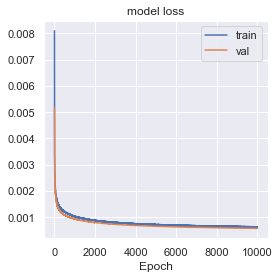

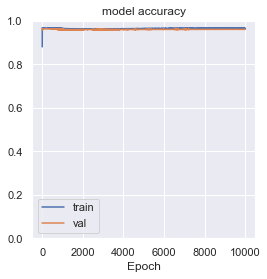

In [69]:
# Visualizing Training and Validation Loss -------------------------------------------------------------------------

import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

save = True

plt.figure()
plt.plot(history.history['loss'])
if validation_split!=0:
    plt.plot(history.history['val_loss'])
    plt.legend(['train', 'val'])

plt.xlabel('Epoch')
plt.title('model loss')
if save:
    plt.savefig('model/'+stamp+'/loss.png')

plt.figure()
plt.plot(history.history['acc'])

if validation_split!=0:
    plt.plot(history.history['val_acc'])
    plt.legend(['train', 'val'])
    
plt.xlabel('Epoch')
plt.ylim([0,1])
plt.title('model accuracy')
if save:
    plt.savefig('model/'+stamp+'/acc.png')

In [52]:
## Reload a trained model ---------------------------------------------------------------------------

import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import ast

stamp = '10_12_17_27'
model = load_model('model/'+stamp+'/Model.h5')
dataframe = pd.read_csv('shc_0817_sliced.csv')
print(dataframe)
x = dataframe['init']
y = dataframe['proj']

xs=[]
for xi in x:
    xentry=ast.literal_eval(xi)
    xs.append(xentry)
        
ys=[]
for yi in y:
    yentry=ast.literal_eval(yi)
    ys.append(yentry)

       Unnamed: 0                                               init  \
0               0  [10, 10, 8, 3, 13, 13, 14, 7, 3, 10, 0, 0.0549...   
1               1  [10, 10, 8, 3, 13, 13, 14, 7, 3, 10, 0.0549642...   
2               2  [10, 10, 8, 3, 13, 13, 14, 7, 3, 10, 0.0651427...   
3               3  [10, 10, 8, 3, 13, 13, 14, 7, 3, 10, 0.0751260...   
4               4  [10, 10, 8, 3, 13, 13, 14, 7, 3, 10, 0.0809845...   
...           ...                                                ...   
34675       34675  [9, 9, 9, 15, 13, 9, 14, 14, 9, 0, 0.404862795...   
34676       34676  [9, 9, 9, 15, 13, 9, 14, 14, 9, 0, 0.418592996...   
34677       34677  [9, 9, 9, 15, 13, 9, 14, 14, 9, 0, 0.433923405...   
34678       34678  [9, 9, 9, 15, 13, 9, 14, 14, 9, 0, 0.447978155...   
34679       34679  [9, 9, 9, 15, 13, 9, 14, 14, 9, 0, 0.458651974...   

                                                    proj  
0      [0.06514270796857, 0.0751260438900591, 0.08098...  
1      [0.0751260

In [71]:
import scipy as sp

x_train_arr = np.asarray(init_state)    
y_train_arr = np.asarray(proj_stres) 
print(x_train_arr.shape,y_train_arr.shape)

#Compute Predictions
yreal_tot = []
ypredict_tot = []
for sample_number in range(len(x_train_arr[:,0])):
    yreal = y_train_arr[sample_number]
    yreal_tot.extend(yreal)
    xtrainshape = np.reshape(x_train_arr[sample_number],(1,len(init_state[0])))
    ypredict = model.predict(xtrainshape)
    ypredict_tot.extend([i for i in ypredict[0]])

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(yreal_tot, ypredict_tot)  
realvpred = (np.asarray(yreal_tot),np.asarray(ypredict_tot))
np.savetxt(stamp+"predictions.csv", realvpred, delimiter=",")

(34680, 13) (34680, 4)


In [80]:
## Visualize Prediction Accuracy --------------------------------------

import seaborn as sns

#Seaborncalc
limit = 1.4
yreal_trunc=[]
ypredict_trunc=[]

for index in range(len(yreal_tot)):
    if yreal_tot[index]<limit:
        if ypredict_tot[index]<limit:
            yreal_trunc.append(yreal_tot[index])
            ypredict_trunc.append(ypredict_tot[index])

slope_trunc, intercept_trunc, r_value_trunc, p_value_trunc, std_err_trunc = sp.stats.linregress(yreal_trunc, ypredict_trunc)  

0.9523356588978986 0.9569082753220604 0.01474065870199287


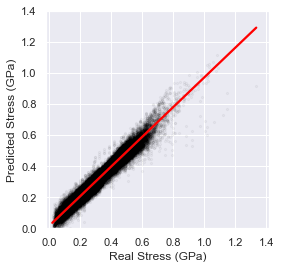

In [108]:
#Seabornplot
sns.set_theme(color_codes=True)
f, ax = plt.subplots()
plt.axis('equal')
plt.axis(xmin=0, xmax=limit)
plt.axis(ymin=0, ymax=limit)
plt.xticks([0,.2,.4,.6,.8,1.0,1.2,1.4])
plt.yticks([0,.2,.4,.6,.8,1.0,1.2,1.4])
sns.set(rc={'figure.figsize':(4,4)})
sns.regplot(x=yreal_trunc, y=ypredict_trunc, ci=99, 
            scatter_kws={'alpha':0.03, 's':5, "color": "black"},
            line_kws={"color": "red"}
           )
plt.xlabel('Real Stress (GPa)', fontsize=12)
plt.ylabel('Predicted Stress (GPa)', fontsize=12)
plt.savefig('model/'+stamp+'/correlation_sns.png') 
r_squared_trunc = r_value_trunc**2
print(r_squared_trunc,slope_trunc,intercept_trunc)

[2, 3, 4, 9, 15, 6, 12, 14, 12, 12, 0, 0.05, 0]
Predicted Stress Curve: [0, 0.05, 0.03924895599484444, 0.03148336, 0.037708793, 0.046737246, 0.060257804, 0.076542854, 0.09564951, 0.11755404, 0.14252761, 0.17080261, 0.20243543, 0.23717111, 0.27447638, 0.3137212, 0.35441345, 0.39635777, 0.43968326, 0.48476416, 0.5320809, 0.58206165, 0.6349369, 0.69061315, 0.7485757, 0.80787194, 0.8671924, 0.9250475, 0.9800122, 1.0309528]
MD Stress Curve: [0, 0.0398144434794297, 0.0557274653512465, 0.085902431705025, 0.0561313502964201, 0.0679002655695092, 0.0740465394243661, 0.0845848798698428, 0.111287446602262, 0.130480878147973, 0.160836955969494, 0.174532745815726, 0.224394007990284, 0.273529539247658, 0.317498458733555, 0.351826062982523, 0.392220786580364, 0.436522314582746, 0.450555067493564, 0.509089743323911, 0.547819255467514, 0.613714561585021, 0.674969214356874, 0.747757269657534, 0.806402825883297, 0.863729906100033, 0.936939599293767, 1.01672572668211, 1.08671916253501, 1.15685174346237]


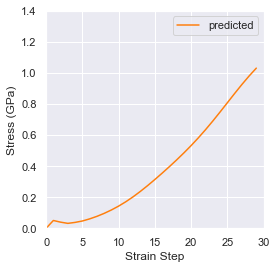

In [57]:
## Predict Stress Strain Curve ----------------------

genes_positive = pd.DataFrame()
genes_positive['genes']=genes_stresses['genes']
genes_positive['stresses']=genes_stresses['pos_stresses']

def Predict_SS_Curve(Starting_Structure, prediction_length):
    """
    Input:
        Starting_Structure: 13-D list encoding 10 structure dimensions, and 3 property dimensions (stress i,stress i+1,strain i) initialized to (0,0.05,0)  
        prediction_length: number of stress steps to predict, standard 18
    Returns:
        Predicted_Stress (List): A list of predicted values for the whole Stress Strain curve 
    """
    Predicted_Stress = [Starting_Structure[-3], Starting_Structure[-2]]
    Prev_Pred = Starting_Structure[-2]
    for i in range(prediction_length):
        xshaped = np.reshape(Starting_Structure,(1,len(Starting_Structure)))
        ypredict = model.predict(xshaped)
        Predicted_Stress.append((np.average((ypredict[0][0],Prev_Pred))))
        Prev_Pred = ypredict[0][1]
        Starting_Structure[-3] = Predicted_Stress[-2]
        Starting_Structure[-2] = Predicted_Stress[-1]
        Starting_Structure[-1] += 1
    return Predicted_Stress

#Load in an initial structure
sample_no = 30 #211 #1400 #742
sample_length = int(len(genes_positive.loc[:,'stresses'][0])-6)
Starting_Structure = [i for i in augmented_data.loc[sample_length*sample_no][0]]
Starting_Structure[-2] = Starting_Structure[-3]+0.05
print(Starting_Structure)

#Predict Stress
prediction_length = int(len(genes_positive.loc[:,'stresses'][0])-2)
Predicted_Stress = Predict_SS_Curve(Starting_Structure, prediction_length)

#Visualize Stress
f, ax = plt.subplots()
ax.set_box_aspect(1)
print("Predicted Stress Curve: " + str(Predicted_Stress))
print("MD Stress Curve: " + str(genes_positive.loc[:,'stresses'][sample_no]))
plt.axis(xmin=0, xmax=30)
plt.axis(ymin=0, ymax=1.4)
plt.xlabel('Strain Step', fontsize=12)
plt.ylabel('Stress (GPa)', fontsize=12)
# plt.plot(genes_positive.loc[:,'stresses'][sample_no])
plt.plot(Predicted_Stress, c='tab:orange')
# plt.legend(['real', 'predicted'])
plt.legend(['predicted'])

In [ ]:
## Initialize Genetic Algorithm ----------------------

from pathlib import Path
from time import strftime

#Generate Initial Population
Population_Size = 10
prediction_length = int(len(genes_positive.loc[:,'stresses'][0])-2)

stamp = strftime('%m_%d_%H_%M')
Sample_Image_Folder = Path('SHC_GA_'+stamp)
if not Sample_Image_Folder.exists():
    Sample_Image_Folder.mkdir()

def Random_Generate_Honeycomb():
    scell_max = 10
    num_list = []  
    scell = random.randint(2,scell_max)
    for count in range(scell):
        num_list.append(random.uniform(2,15)) # cell wall thickness list from center out
    for count in range(scell_max-scell):
        num_list.append(float(0)) # pad structure vectors with 0s for consistent length
    return num_list   

def linear_interpolate(code1, code2, alpha):
    return code1 * alpha + code2 * (1 - alpha)

def Predict_SS_Curve(Starting_Structure, prediction_length):
    """
    Input:
        Starting_Structure: 13-D list encoding 10 structure dimensions, and 3 property dimensions (stress i, stress i+1, strain i)  
        prediction_length: number of stress steps to predict, standard 18
    Returns:
        Predicted_Stress (List): A list of predicted values for the whole Stress Strain curve 
    """
    Predicted_Stress = [Starting_Structure[-3], Starting_Structure[-2]]#[Starting_Structure[-4], Starting_Structure[-3]]
    print('Predicting From Starting Structure: '+str(Starting_Structure[0:10]))
    Prev_Pred = Starting_Structure[-2]#Starting_Structure[-3]
    for i in range(prediction_length):
        xshaped = np.reshape(Starting_Structure,(1,len(Starting_Structure)))
        ypredict = model.predict(xshaped)
        Predicted_Stress.append((np.average((ypredict[0][0],Prev_Pred))))
        Prev_Pred = ypredict[0][1]
        Starting_Structure[-3] = Predicted_Stress[-2]
        Starting_Structure[-2] = Predicted_Stress[-1]
        Starting_Structure[-1] += 1
    print('Stress: '+str(Predicted_Stress)+'\n')
    return Predicted_Stress

Init_ss = [0, 0.05, 0]
Population=[] #A list of arrays
for i in range(Population_Size):
    Sample_Code = Random_Generate_Honeycomb() 
    Sample_Code = np.asarray(Sample_Code).reshape((1,10)) 
    Population.append(Sample_Code)
print(Population)

In [ ]:
#Define Genetic Algorithm Targets

target_stiffness = 0.02 #0.03 #0.04 #0.05
target_us = 0.4 #0.6 #0.8 #1.0
    
#Property Searches, fitness is proximity to desired property
def Stiffness_Search(property_population, target_stiffness):
    fitness = []
    for i in property_population:
        index = 5 
        temp_fitness = -((i[index]-i[0])-target_stiffness*index)**2 
        fitness.append(temp_fitness)
    return fitness   

def Stress_Search(property_population, target_us):
    fitness = []
    for i in property_population:
        temp_fitness = -(np.max(np.asarray(i))-target_us)**2        
        fitness.append(temp_fitness)
    return fitness   

In [ ]:
%%time
## Run Genetic Algorithm ----------------------

#Choose how many generations to run
generations=1000 

#Initialize variables
bestfit=[]
worstfit=[]
avgfit=[]
avghardness=[]
devhardness=[]
Bes_Index=0
convergence=10

for gen in range(generations):
    ###Selection (input Population_Size, Population; output Parent1, Parent2)
    #Random selection
    sel=random.sample(range(0, Population_Size), 2) 
    Parent1=Population[sel[0]]
    Parent2=Population[sel[1]]
#     #Fittest selection 
#     Parent2=Population[Bes_Index]       
    
    ###Crossover (input Parent1, Parent2; output Child1, Child2)
    Child1=np.absolute(linear_interpolate(Parent1, Parent2, random.gauss(0.3, 0.2)))
    Child2=np.absolute(linear_interpolate(Parent1, Parent2, random.gauss(0.7, 0.2)))
    assert np.min(np.asarray(Child1)) >= 0
    assert np.min(np.asarray(Child2)) >= 0    
    print('Crossover finished... with Selection Indices: '+str(sel[0])+', '+str(sel[1]))
    
    ###Mutation (input Child1; output MChild)
    MChild=Child1
    PointRate = 1/convergence #percentage chance of mutation
    PointMag = random.gauss(2, 1)/convergence #stddev of mutation
    point_mutation_count = 0
    for i in range(np.count_nonzero(Child1)-1):
        if random.random()<PointRate:
            replaced=Child1[0,i]
            mutation=np.absolute(random.gauss(replaced, PointMag))
            MChild[0,i]=mutation
            point_mutation_count +=1
    assert np.min(np.asarray(MChild)) >= 0
    print('Mutation finished... with '+str(point_mutation_count)+' Point Mutations' ) 
    
    ###Specialization (input Child1; output MChild2)
    MChild2=Parent1
    s_factor = np.absolute(random.gauss(1.5, 1))
    midp = (np.max(np.asarray(Parent1))+np.min(np.asarray(Parent1)))/2 
    for i in range(np.count_nonzero(Parent1)-1):
        if MChild2[0,i]<midp:
            MChild2[0,i]=MChild2[0,i]/s_factor
        if MChild2[0,i]>midp:
            MChild2[0,i]=MChild2[0,i]*s_factor
    assert np.min(np.asarray(MChild2)) >= 0
    print('Specialization finished... with S Factor: '+str(s_factor))  
    
    ###Migration (input N/A; output RChild)
    RChild = Random_Generate_Honeycomb()
    RChild = np.asarray(RChild).reshape((1,10))
    assert np.min(np.asarray(RChild)) >= 0
    print('Migration finished...\n')  
    
    ###Competition (input Population, Child1, Child2, MChild, output new Population)
    Addition_Count = 0
    for j in (Child1,Child2,MChild,MChild2,RChild):
        Population.append(j)
        Addition_Count+=1
    
    property_population = []
    for i in Population:       
        temp_structure = i[0,:]    
        temp_structure = np.append(temp_structure,Init_ss).reshape((13)) 
        temp_property = Predict_SS_Curve(temp_structure, prediction_length)
        property_population.append(temp_property)
       
    Fitness = Stress_Search(property_population, target_us)
    #Fitness = Stiffness_Search(property_population, target_stiffness)
    print('Fitness calculations finished:') 
    print(str(Fitness)+'\n')

    Rando_Death=2
    for k in range(Rando_Death):
        Safe_Index=np.argmax(Fitness)
        Att_Index=random.choice([i for i in range(len(Fitness)) if i not in [Safe_Index]])
        print("Structure "+str(Att_Index)+" dies randomly with "+str(Fitness[Att_Index])+" fitness")
        Population.pop(Att_Index)
        Fitness.pop(Att_Index)
        property_population.pop(Att_Index)
    Attrition=3
    for k in range(Attrition):
        Att_Index=np.argmin(Fitness)
        print("Structure "+str(Att_Index)+" dies with only "+str(Fitness[Att_Index])+" fitness")
        Population.pop(Att_Index)
        Fitness.pop(Att_Index)              
        property_population.pop(Att_Index)
    print('\nCompetition finished with remaining fitnesses:')     
    print(Fitness)
    
    Bes_Index=np.argmax(Fitness)
    bestfit.append(Fitness[Bes_Index])
    worstfit.append(min(Fitness))
    avgfit.append(sum(Fitness) / len(Fitness))
    
    print("\nGeneration "+str(gen)+" completed. \nBest fitness: "+str(max(Fitness))+" at index "+str(Bes_Index))
    print("With structure: "+str(Population[Bes_Index])+"\n")
    print("================================================================================================")
    
    convergence = abs(max(Fitness)-min(Fitness))
    if convergence < 0.01 and gen > generations/4:
        print("Structure Saturation")
        break

#Print results to CSVs
totalfit = np.transpose(np.array([bestfit, worstfit, avgfit]))
np.savetxt(str(Sample_Image_Folder)+'/Target'+str(target_us)+'_Fitness_Traces.csv', totalfit, delimiter=',')
np.savetxt(str(Sample_Image_Folder)+'/Target'+str(target_us)+'_Final_Fitness.csv', np.transpose(np.asarray(Fitness)), delimiter=',') 
np.savetxt(str(Sample_Image_Folder)+'/Target'+str(target_us)+'_Final_Population.csv', np.asarray(Population).reshape(np.asarray(Population).shape[0],np.asarray(Population).shape[2]), delimiter=',') 
np.savetxt(str(Sample_Image_Folder)+'/Target'+str(target_us)+'_Final_Property.csv', np.asarray(property_population).reshape(np.asarray(property_population).shape[0],np.asarray(property_population).shape[2]), delimiter=',') 
